#### Dans notre jeu de données chaque individu présente les variables suivantes:

- <span style="color: purple;">Age</span>: Age of the gym member. 
- <span style="color: purple;">Gender</span>: Gender of the gym member (Male or Female).
- <span style="color: purple;">Weight (kg)</span>: Member’s weight in kilograms.
- <span style="color: purple;">Height (m)</span>: Member’s height in meters.
- <span style="color: purple;">Max_BPM</span>: Maximum heart rate (beats per minute) during workout sessions.
- <span style="color: purple;">Avg_BPM</span>: Average heart rate during workout sessions.
- <span style="color: purple;">Resting_BPM</span>: Heart rate at rest before workout.
- <span style="color: purple;">Session_Duration (hours)</span>: Duration of each workout session in hours.
- <span style="color: purple;">Calories_Burned</span>: Total calories burned during each session.
- <span style="color: purple;">Workout_Type</span>: Type of workout performed (e.g., Cardio, Strength, Yoga, HIIT).
- <span style="color: purple;">Fat_Percentage</span>: Body fat percentage of the member.
- <span style="color: purple;">Water_Intake (liters)</span>: Daily water intake during workouts.
- <span style="color: purple;">Workout_Frequency (days/week)</span>: Number of workout sessions per week.
- <span style="color: purple;">Experience_Level</span>: Level of experience, from beginner (1) to expert (3).
- <span style="color: purple;">BMI</span>: Body Mass Index, calculated from height and weight.


In [1]:
install.packages("Metrics")

Installation du package dans ‘/home/ebrunel/R/libs’
(car ‘lib’ n'est pas spécifié)



In [2]:
library(ggplot2)
library(tidyverse)
library(gridExtra)
library(GGally)
library(plotly)
library(corrplot)
library(reshape2)
library(MASS)
library(FactoMineR)
library(factoextra)
library(glmnet) 
library(ggfortify)
library(pROC)
library(ROCR)
library(gplots)
library(graphics)
library(scales)
library(dplyr)
library(patchwork)
library(Metrics)
library(rpart)
library(rpart.plot)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attachement du package : ‘gridExtra’


L'objet suivant est masqué depuis ‘package:dplyr’:

    combine


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attachement du package : ‘plotly’


L'objet suivant est masqué depuis ‘package:ggplot2’:

    last_plot


L'objet suivant est masqué depuis ‘package:stats’:

    filter


L'objet suivant est masqué depuis ‘package:graphics’:

    layout


corrplot 0.95 loaded


Attachement du package : ‘reshape2’


L'objet sui

# Préparation de la Base

## Nature des variables

In [3]:

path <- ""
Gym <- read.table(paste(path, "Donnees_projet.csv", sep = ""),
                    sep = ",", header = TRUE)

Gym[,"Gender"]<- as.factor(Gym[,"Gender"])
Gym[,"Workout_Type"]<-as.factor(Gym[,"Workout_Type"])
Gym[,"Workout_Frequency"]<-as.factor(Gym[,"Workout_Frequency..days.week."])
Gym[,"Experience_Level"]<-as.factor(Gym[,"Experience_Level"])
Gym[,"Session_Duration"]<-Gym[,"Session_Duration..hours."]
Gym[,"Water_Intake"]<-Gym[,"Water_Intake..liters."]

Gym<-Gym[, c(1:7, 9:11,14:18)]

head(Gym)
summary(Gym)

Age Gender Weight..kg. Height..m. Max_BPM Avg_BPM Resting_BPM Calories_Burned
1 56  Male   88.3        1.71       180     157     60          1313           
2 46  Female 74.9        1.53       179     151     66           883           
3 32  Female 68.1        1.66       167     122     54           677           
4 25  Male   53.2        1.70       190     164     56           532           
5 38  Male   46.1        1.79       188     158     68           556           
6 56  Female 58.0        1.68       168     156     74          1116           
  Workout_Type Fat_Percentage Experience_Level BMI   Workout_Frequency
1 Yoga         12.6           3                30.20 4                
2 HIIT         33.9           2                32.00 4                
3 Cardio       33.4           2                24.71 4                
4 Strength     28.8           1                18.41 3                
5 Strength     29.2           1                14.39 3                
6 HIIT         15.5           3                20.55 5                
  Session_Duration Water_Intake
1 1.69             3.5         
2 1.30             2.1         
3 1.11             2.3         
4 0.59             2.1         
5 0.64             2.8         
6 1.59             2.7

      Age           Gender     Weight..kg.       Height..m.       Max_BPM     
 Min.   :18.00   Female:462   Min.   : 40.00   Min.   :1.500   Min.   :160.0  
 1st Qu.:28.00   Male  :511   1st Qu.: 58.10   1st Qu.:1.620   1st Qu.:170.0  
 Median :40.00                Median : 70.00   Median :1.710   Median :180.0  
 Mean   :38.68                Mean   : 73.85   Mean   :1.723   Mean   :179.9  
 3rd Qu.:49.00                3rd Qu.: 86.00   3rd Qu.:1.800   3rd Qu.:190.0  
 Max.   :59.00                Max.   :129.90   Max.   :2.000   Max.   :199.0  
    Avg_BPM       Resting_BPM    Calories_Burned    Workout_Type
 Min.   :120.0   Min.   :50.00   Min.   : 303.0   Cardio  :255  
 1st Qu.:131.0   1st Qu.:56.00   1st Qu.: 720.0   HIIT    :221  
 Median :143.0   Median :62.00   Median : 893.0   Strength:258  
 Mean   :143.8   Mean   :62.22   Mean   : 905.4   Yoga    :239  
 3rd Qu.:156.0   3rd Qu.:68.00   3rd Qu.:1076.0                 
 Max.   :169.0   Max.   :74.00   Max.   :1783.0          

Dans ce jeu de données on observe 11 variables quantitatives et 4 variables qualitatives. Pour traiter les données correctement nous avons passé les données qualitatives en facteur et nous avons renommé les colonnes dont le nom était trop long ou pas assez intuitif. 

## Analyse unidimensionnelle des variables

Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


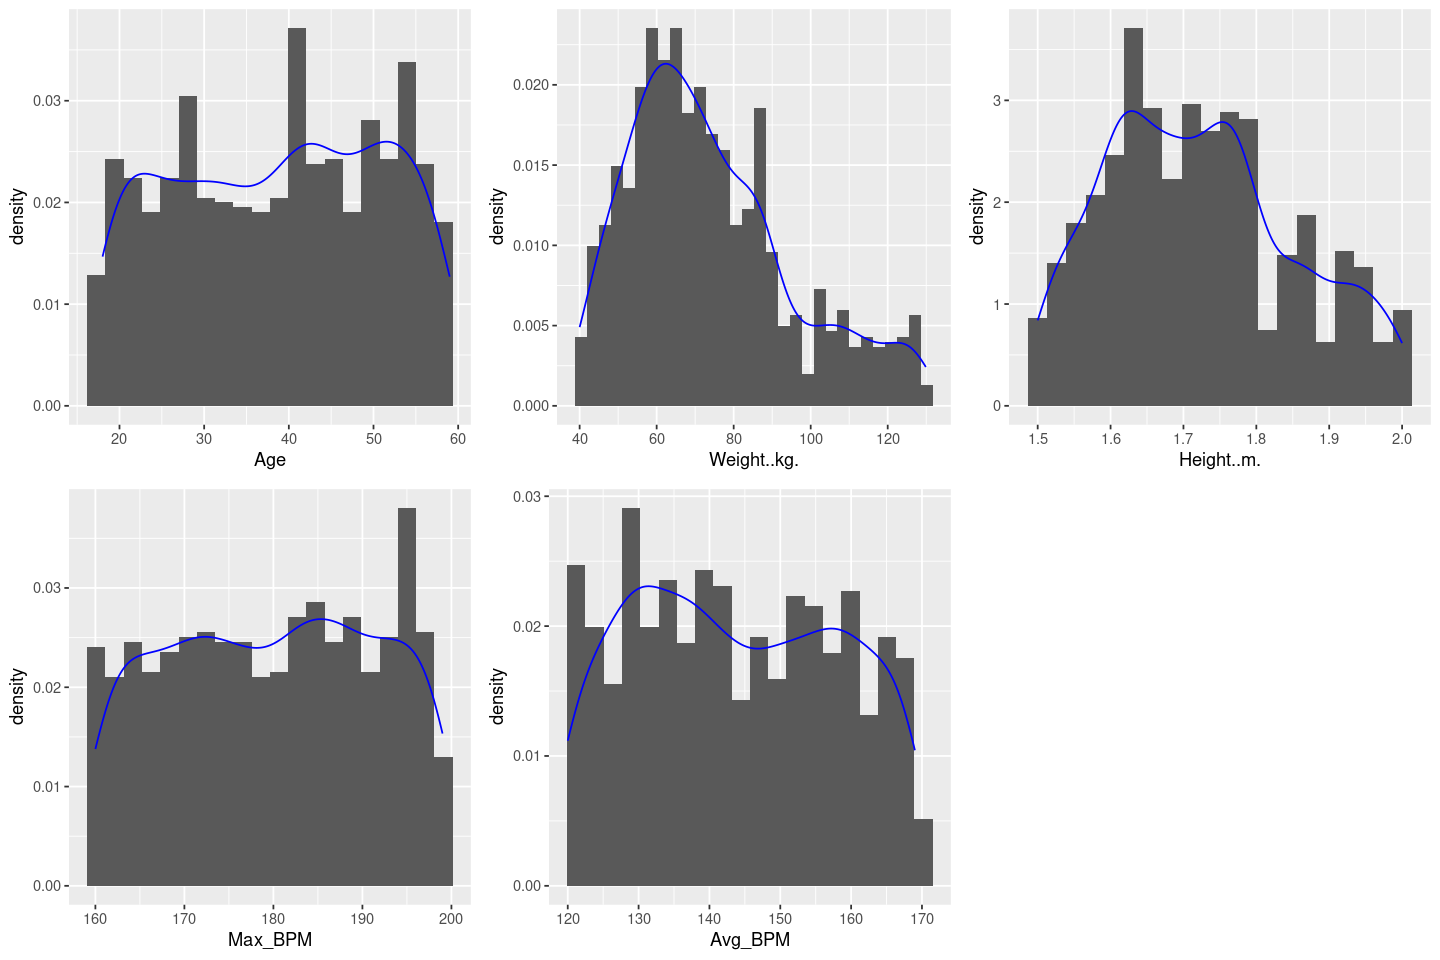

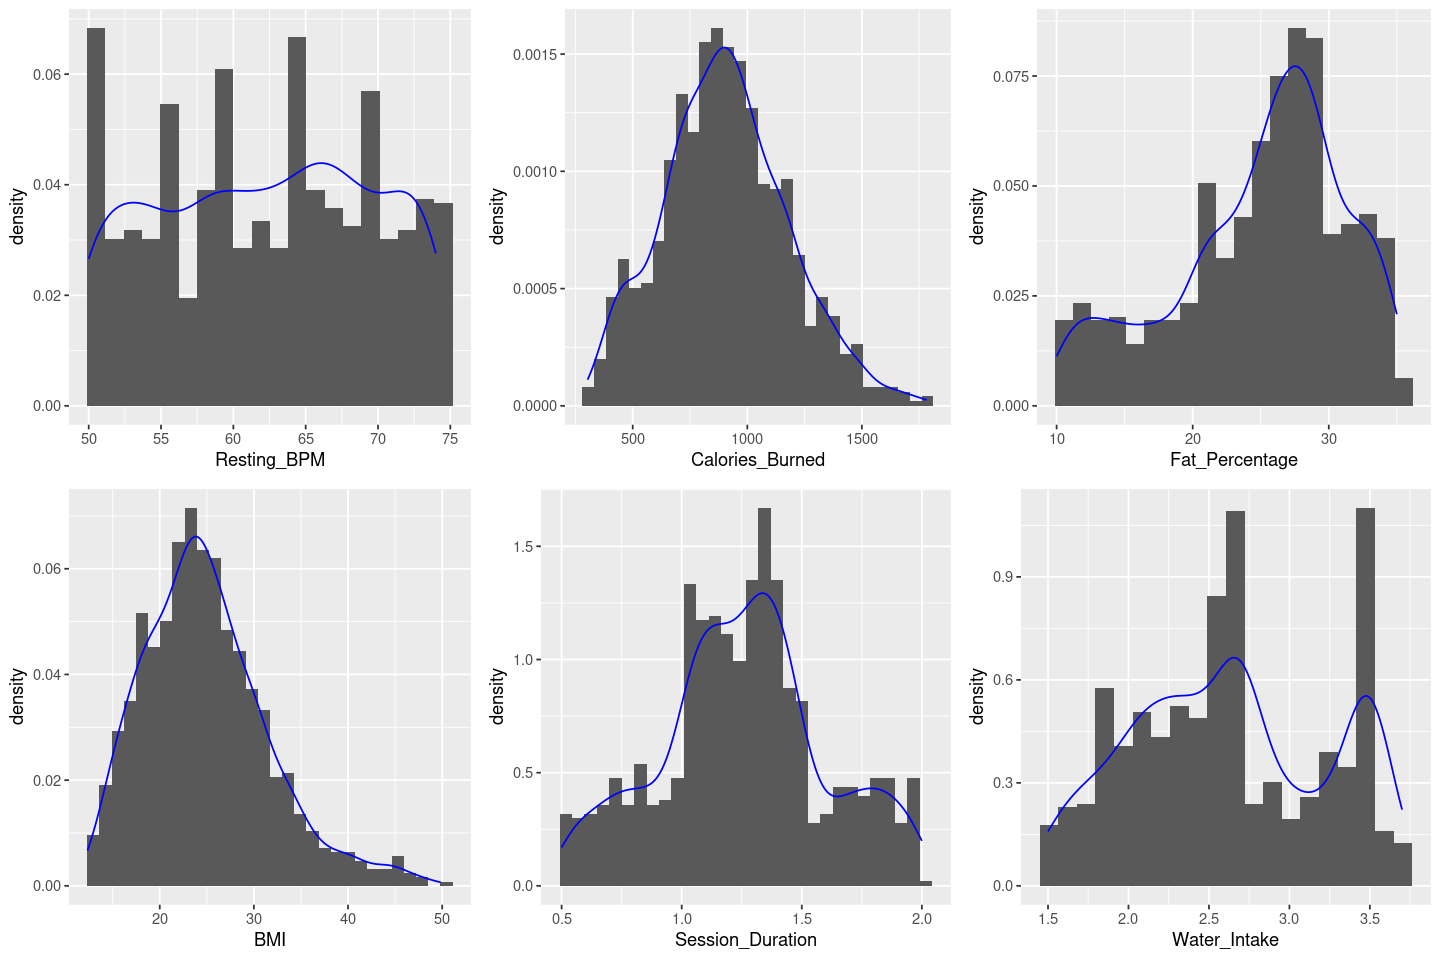

In [4]:
g1<-ggplot(Gym,aes(x=Age))+geom_histogram(aes(y=..density..),bins=20)+geom_density(alpha=.2, col="blue")
g2<-ggplot(Gym,aes(x=Weight..kg.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue")
g3<-ggplot(Gym,aes(x=Height..m.))+geom_histogram(aes(y=..density..),bins=20)+geom_density(alpha=.2, col="blue") 
g4<-ggplot(Gym,aes(x=Max_BPM))+geom_histogram(aes(y=..density..),bins=20)+geom_density(alpha=.2, col="blue") 
g5<-ggplot(Gym,aes(x=Avg_BPM))+geom_histogram(aes(y=..density..),bins=20)+geom_density(alpha=.2, col="blue") 
g6<-ggplot(Gym,aes(x=Resting_BPM))+geom_histogram(aes(y=..density..),bins=20)+geom_density(alpha=.2, col="blue") 
g7<-ggplot(Gym,aes(x=Calories_Burned))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g8<-ggplot(Gym,aes(x=Fat_Percentage))+geom_histogram(aes(y=..density..),bins=20)+geom_density(alpha=.2, col="blue")
g9<-ggplot(Gym,aes(x=BMI))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue")
g10<-ggplot(Gym,aes(x=Session_Duration))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue")
g11<-ggplot(Gym,aes(x=Water_Intake))+geom_histogram(aes(y=..density..),bins=20)+geom_density(alpha=.2, col="blue")

options(repr.plot.width = 12, repr.plot.height = 8)
grid.arrange(g1,g2,g3,g4,g5,ncol=3)
grid.arrange(g6,g7,g8,g9,g10,g11,ncol=3)
rm(g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11)

Ici, nous analysons la distribution des variables numériques du jeu de données Gym. Pour cela, nous avons généré des histogrammes avec superposition de courbes de densité . Ces visualisations permettent d’examiner la forme de chaque distribution (normalité, asymétrie, présence de modes, etc.) ainsi que d’identifier d’éventuelles anomalies ou valeurs extrêmes. Nous avons testé plusieurs types de transformations sur différentes variables 



liste des transformations possibles pour le pré-processing des données: \
Transformation logarithmique (si les données sont fortement asymétriques).

Transformation racine carrée (si les données ne sont pas aussi étendues).

Transformation Box-Cox (pour rechercher automatiquement la meilleure transformation).

Transformation de puissance inverse (si tu veux réduire l'impact des grandes valeurs).

Transformation quantile

Je vois pas de transformation très utile ici.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


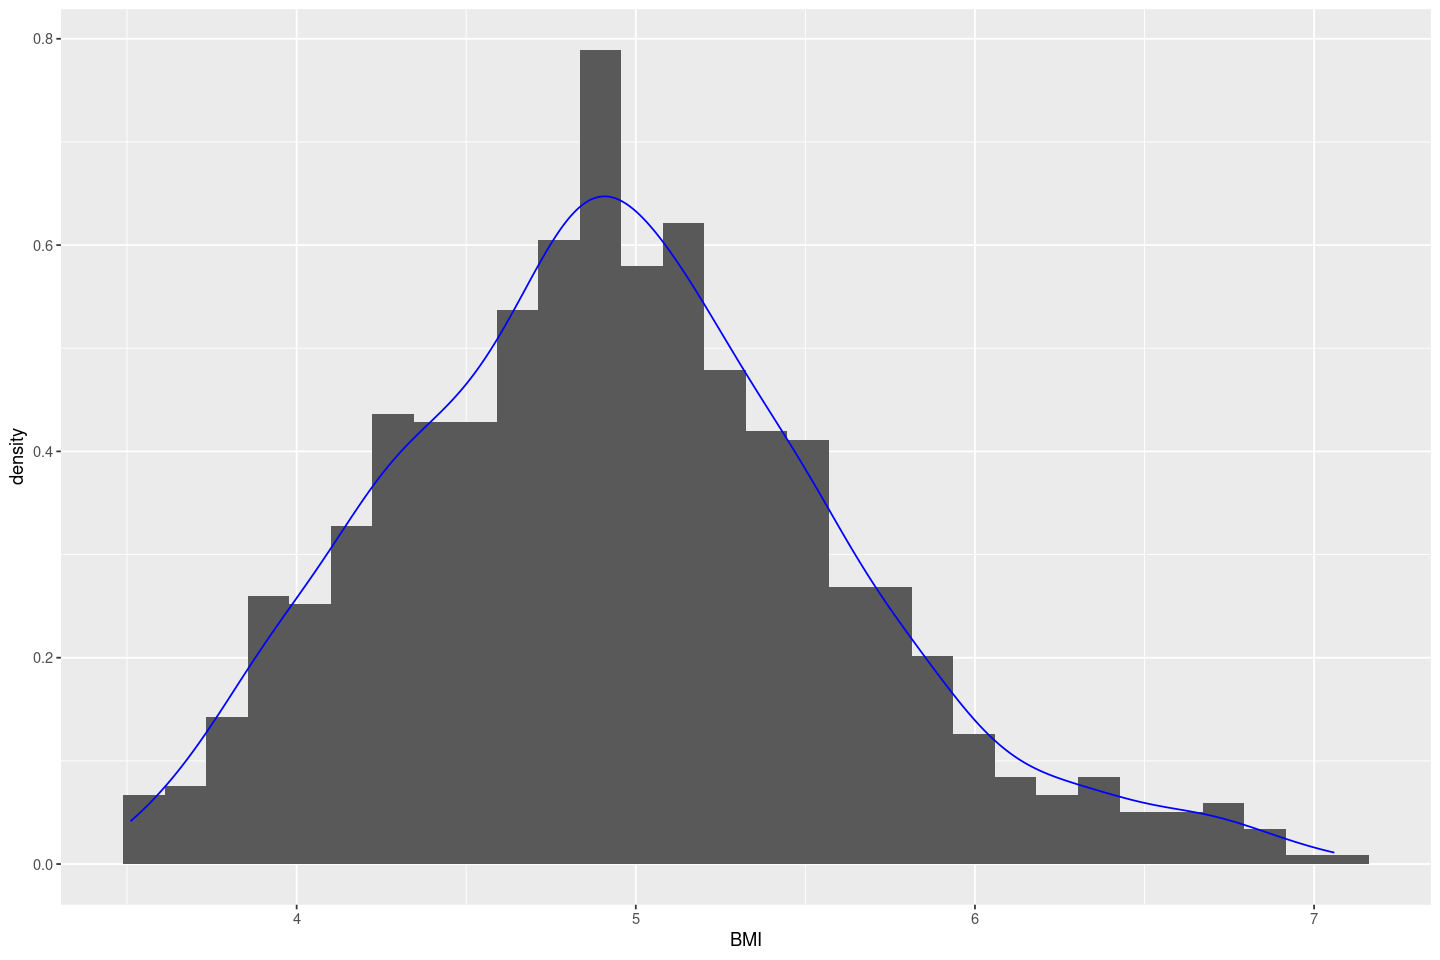

In [5]:
Gym[,"BMI"]<-sqrt(Gym[,"BMI"])

g9b<-ggplot(Gym,aes(x=BMI))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue")

grid.arrange(g9b,ncol=1)

En essayant des transformations des variables quantitatives on se rend compte qu'elles ne sont pas forcément pertinentes. Il faudrait se renseigner sur d'autres transformations pour des variables plus complexes et distribuées moins uniformément 

Pour mieux comprendre la composition de ce jeu de données nous allons représenter la distribution de toutes les modalités des variables qualitatives afin de mieux cerner de quels types d'individus est composée la base de données. 

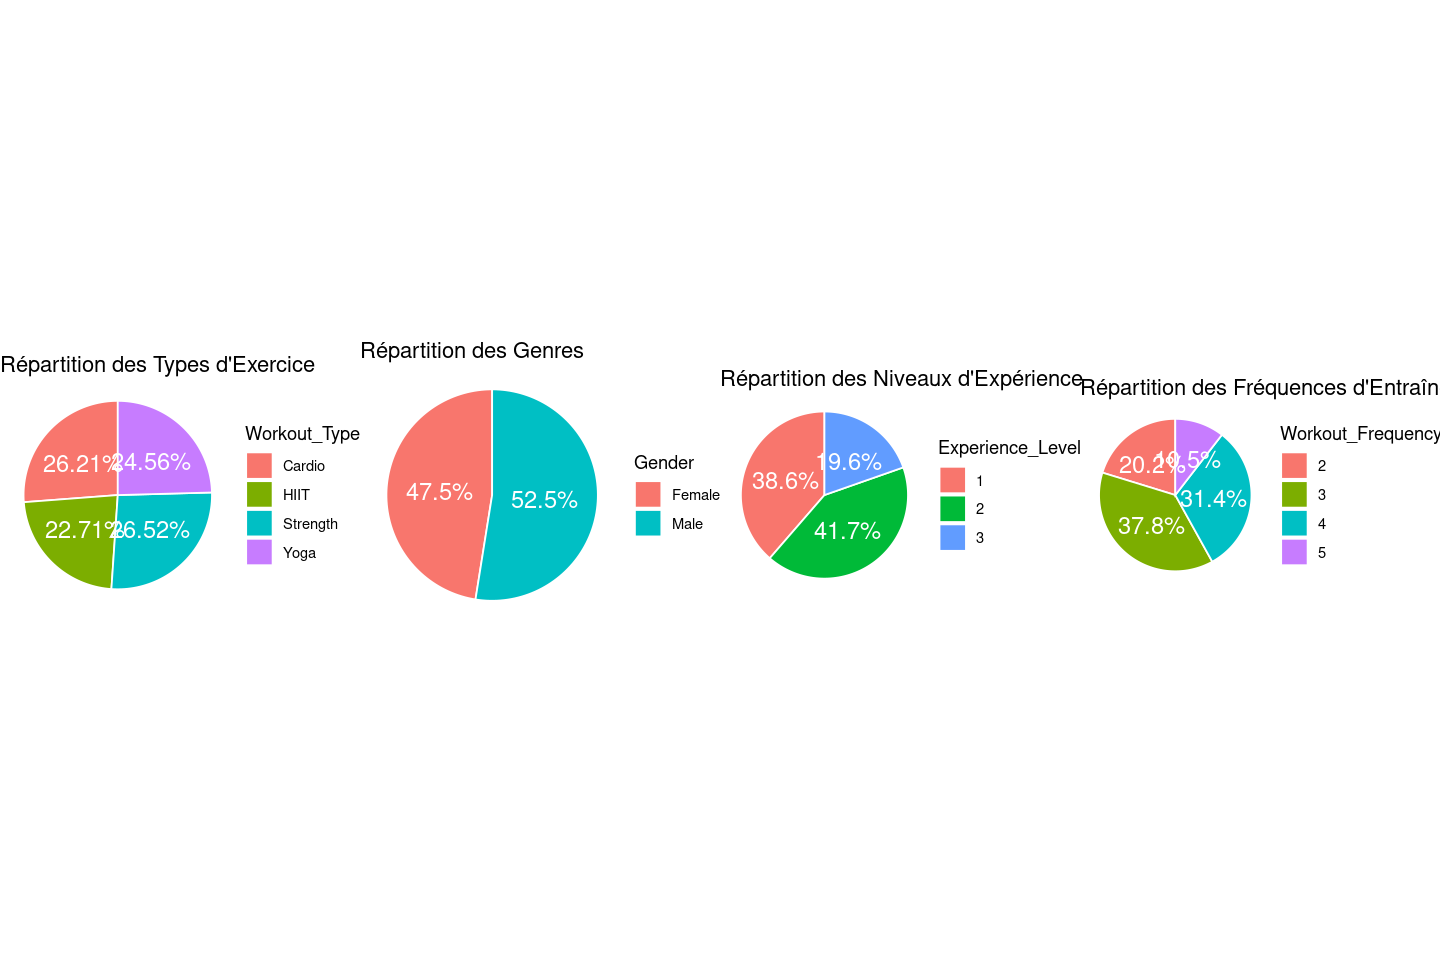

In [6]:
g1 <- ggplot(Gym, aes(x = "", fill = Workout_Type)) + geom_bar( width = 1, color="white") + coord_polar(theta = "y") +
  labs(title = "Répartition des Types d'Exercice") + geom_text(stat= "count", aes(label= percent(..count../sum(..count..))), position = position_stack(vjust = 0.5), color="white", size =5) + 
  theme_void()

g2 <- ggplot(Gym, aes(x = "", fill = Gender)) + geom_bar( width = 1, color="white") + coord_polar(theta = "y") +
  labs(title = "Répartition des Genres") + geom_text(stat= "count", aes(label= percent(..count../sum(..count..))), position = position_stack(vjust = 0.5), color="white", size =5) + 
  theme_void()

g3 <- ggplot(Gym, aes(x = "", fill = Experience_Level)) + geom_bar( width = 1, color="white") + coord_polar(theta = "y") +
  labs(title = "Répartition des Niveaux d'Expérience") + geom_text(stat= "count", aes(label= percent(..count../sum(..count..))), position = position_stack(vjust = 0.5), color="white", size =5) + 
  theme_void()

g4 <- ggplot(Gym, aes(x = "", fill = Workout_Frequency)) + geom_bar( width = 1, color="white") + coord_polar(theta = "y") +
  labs(title = "Répartition des Fréquences d'Entraînement") + geom_text(stat= "count", aes(label= percent(..count../sum(..count..))), position = position_stack(vjust = 0.5), color="white", size =5) + 
  theme_void()

grid.arrange(g1,g2,g3,g4,ncol=4)

On remarque donc que les types d'entraînement et le genre sont des variables plutôt équilibrées, chaque moalités est représentées de façon assez équivalente. Pour les autres variables qualitatives on remarque que les individus plus expérimentés et dont la durée d'entrapinement est plus longue sont bien moins nombreux que les autres. 

## Analyse bidimensionnelle des variables
#### Corrélation

      Age           Gender     Weight..kg.       Height..m.       Max_BPM     
 Min.   :18.00   Female:462   Min.   : 40.00   Min.   :1.500   Min.   :160.0  
 1st Qu.:28.00   Male  :511   1st Qu.: 58.10   1st Qu.:1.620   1st Qu.:170.0  
 Median :40.00                Median : 70.00   Median :1.710   Median :180.0  
 Mean   :38.68                Mean   : 73.85   Mean   :1.723   Mean   :179.9  
 3rd Qu.:49.00                3rd Qu.: 86.00   3rd Qu.:1.800   3rd Qu.:190.0  
 Max.   :59.00                Max.   :129.90   Max.   :2.000   Max.   :199.0  
    Avg_BPM       Resting_BPM    Calories_Burned    Workout_Type
 Min.   :120.0   Min.   :50.00   Min.   : 303.0   Cardio  :255  
 1st Qu.:131.0   1st Qu.:56.00   1st Qu.: 720.0   HIIT    :221  
 Median :143.0   Median :62.00   Median : 893.0   Strength:258  
 Mean   :143.8   Mean   :62.22   Mean   : 905.4   Yoga    :239  
 3rd Qu.:156.0   3rd Qu.:68.00   3rd Qu.:1076.0                 
 Max.   :169.0   Max.   :74.00   Max.   :1783.0          

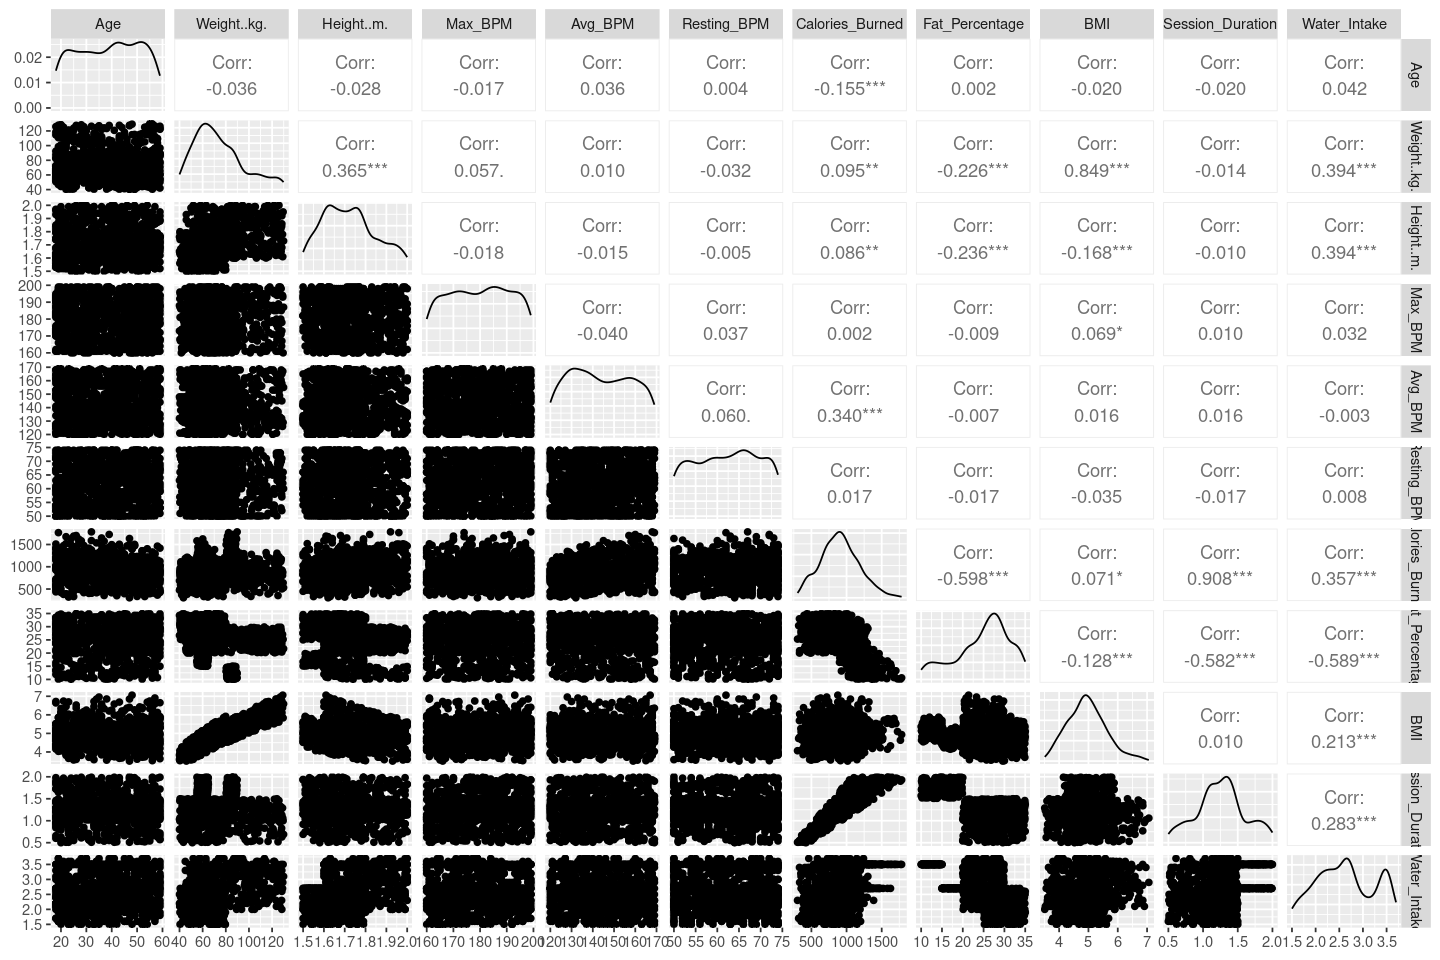

In [7]:
summary(Gym)
ggpairs(Gym[, c(1,3:8,10,12,14:15)])

On remarque facilement plusieurs corrélations linéaires très fortes, notamment entre le poids et l'IMC ( avec une corrélation de 0.852) et entre la durée de la session et les calories brulées (corrélation = 0.912) 
Ces liens s'établissent de façon évidentes par leur nature. 
D'un autre côté, on observe des comportements atypiques qui semblent établir des relations non linéaires entre les variables Durée de la séance et le pourcentage de masse graisseuse. ces deux variables semblent établir des seuils entre elles. 
Pour des variables comme Consommation d'eau on retrouve les pics observés dans les histogrammes précédents. 

A faire: Trouver la commande qui détermine l'indice des individus chelous dans fat percentage/ Water intake
Voir globalement si on peut analyser plus les pics de water intake?

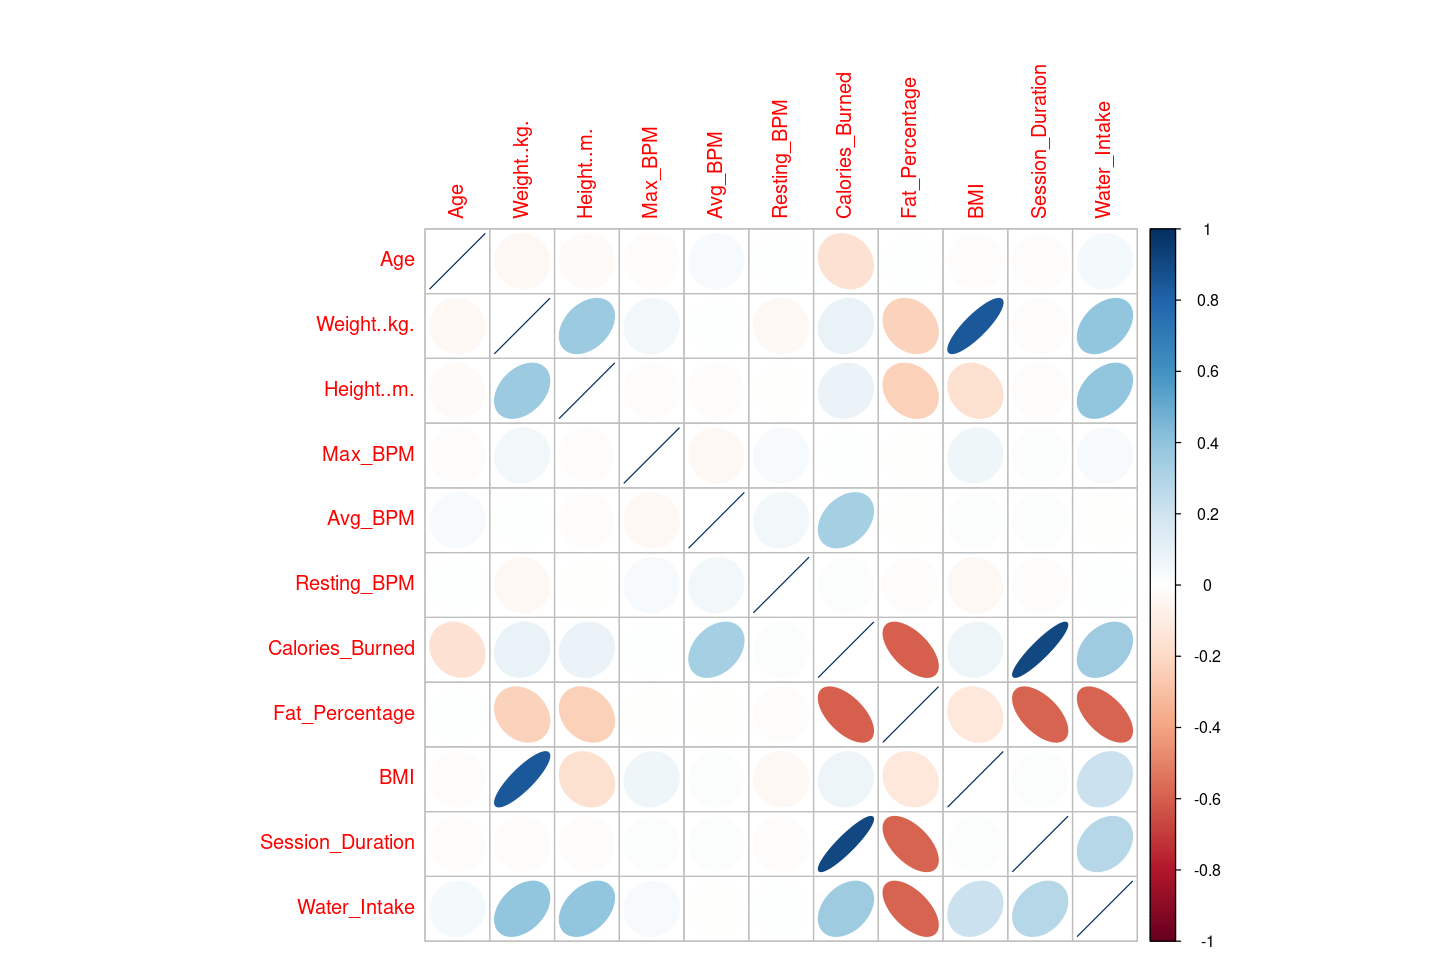

In [8]:
library(corrplot)
corrplot(cor(Gym[, c(1,3:8,10,12,14:15)]),method="ellipse")

#### Quali/Quanti

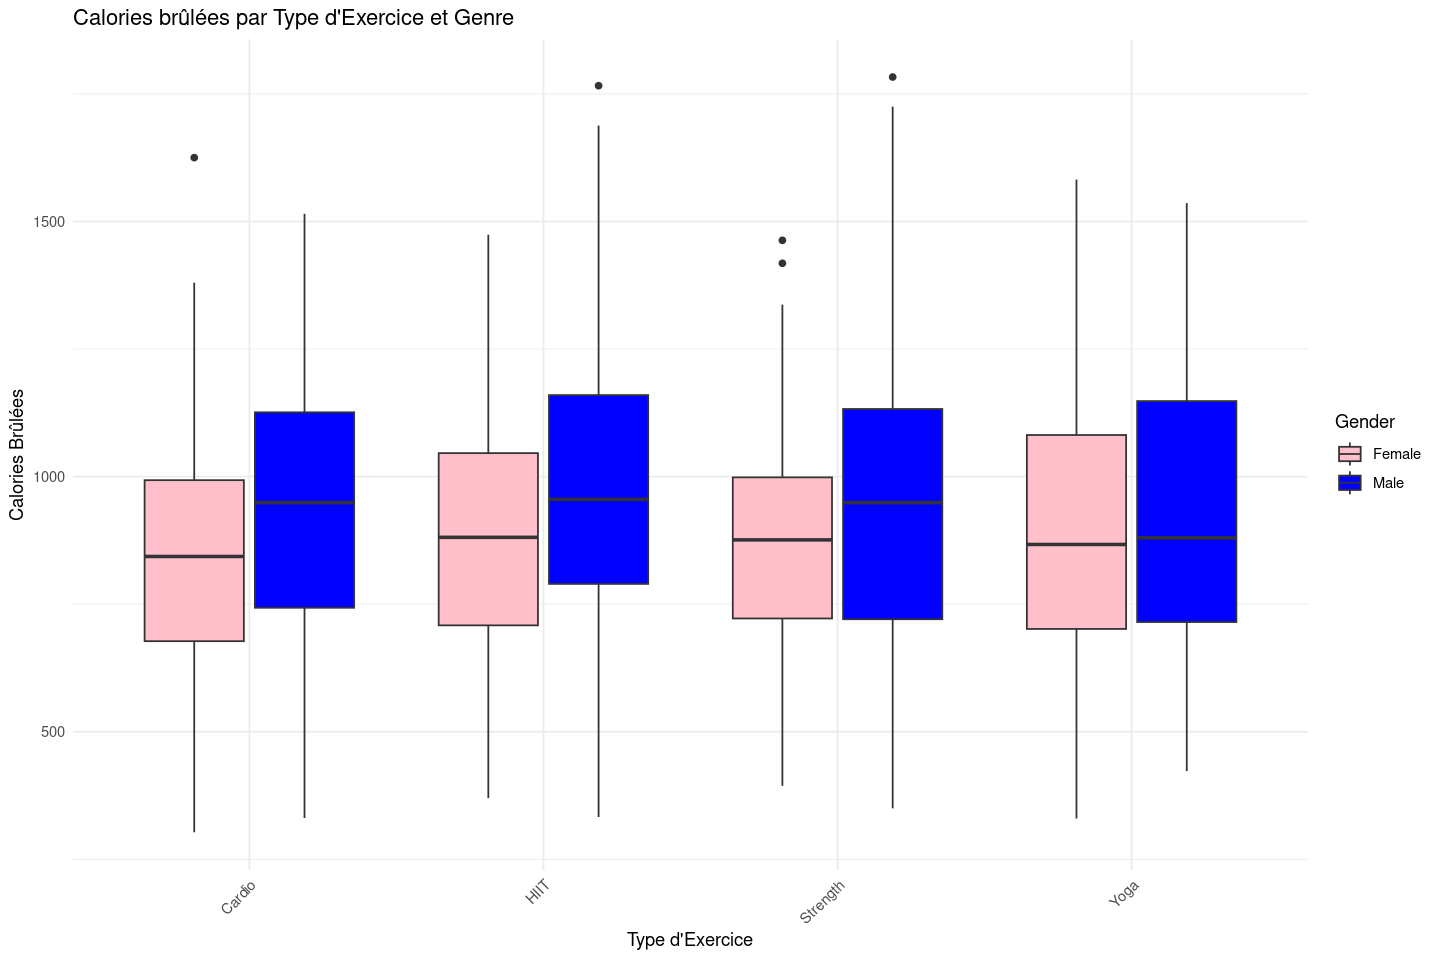

In [9]:
ggplot(Gym, aes(x = Workout_Type, y = Calories_Burned, fill = Gender)) +
  geom_boxplot() +
  labs(title = "Calories brûlées par Type d'Exercice et Genre",
       x = "Type d'Exercice",
       y = "Calories Brûlées") +
  theme_minimal() +
  scale_fill_manual(values = c("Male" = "blue", "Female" = "pink")) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

Pour un même type d'entraînement, on remarque que les hommes dépensent en général plus de calories que les femmes. 

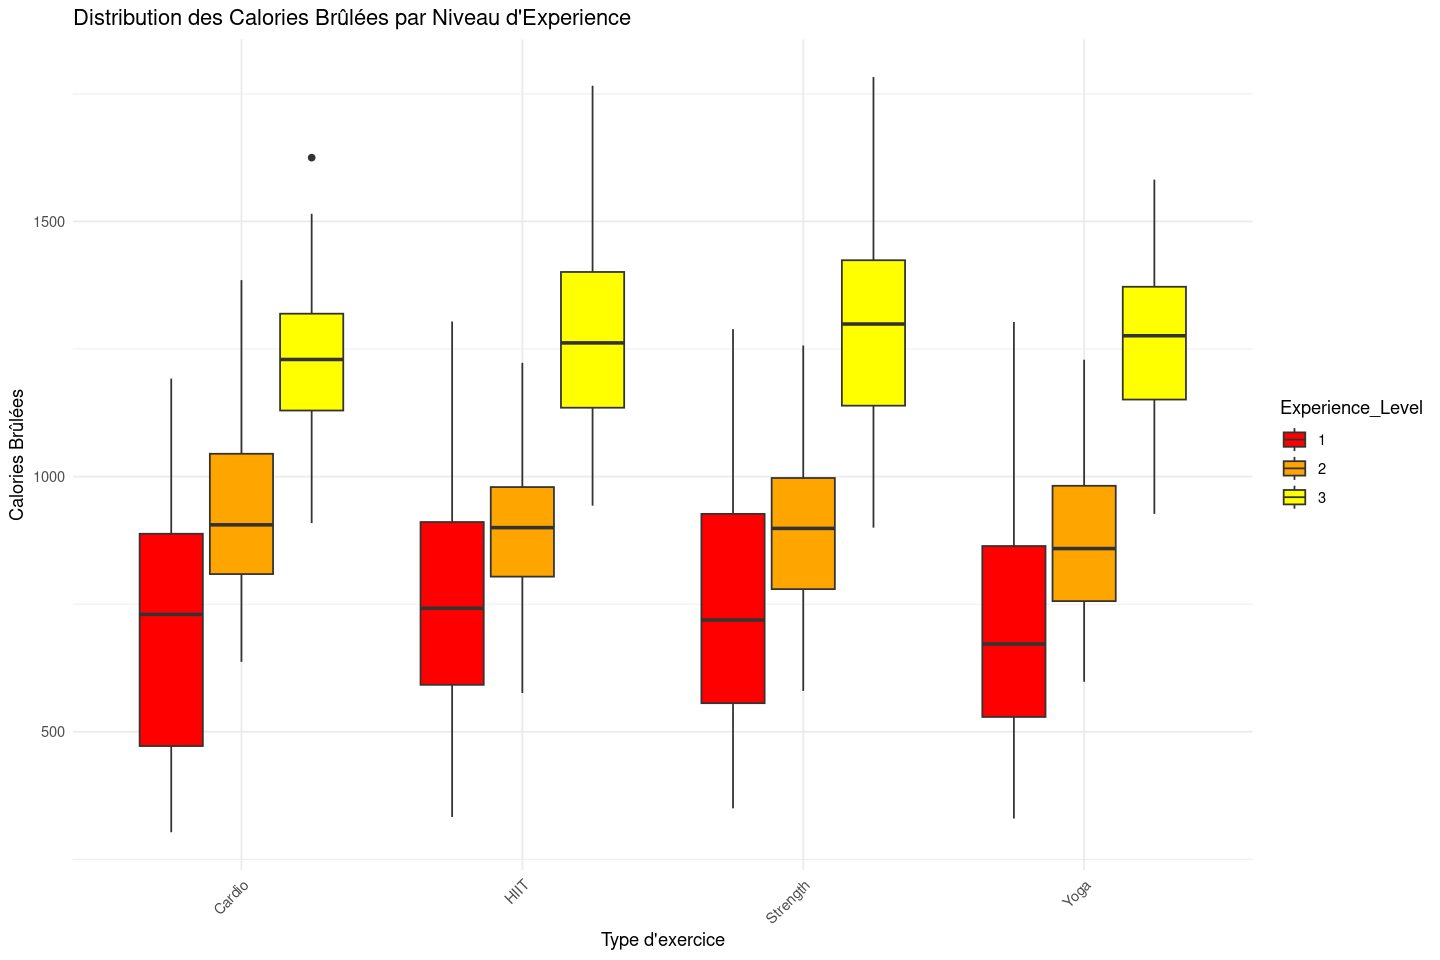

In [10]:
ggplot(Gym, aes(x = Workout_Type, y = Calories_Burned, fill = Experience_Level)) +
  geom_boxplot() +
  labs(title = "Distribution des Calories Brûlées par Niveau d'Experience",
       x = "Type d'exercice",
       y = "Calories Brûlées") +
  theme_minimal() +
  scale_fill_manual(values = c("1" = "red", "2" = "orange", "3"="yellow"))+
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

Nous voyons de façon évidente qu'à un niveau d'experience plus élevée est souvent associées un plus grand nombre de calories brulées, cela est sûrement dû à l'intensité et à la durée d'exercice qui devrait augmenter avec l'expérience nous allons à présent le vérifier. 

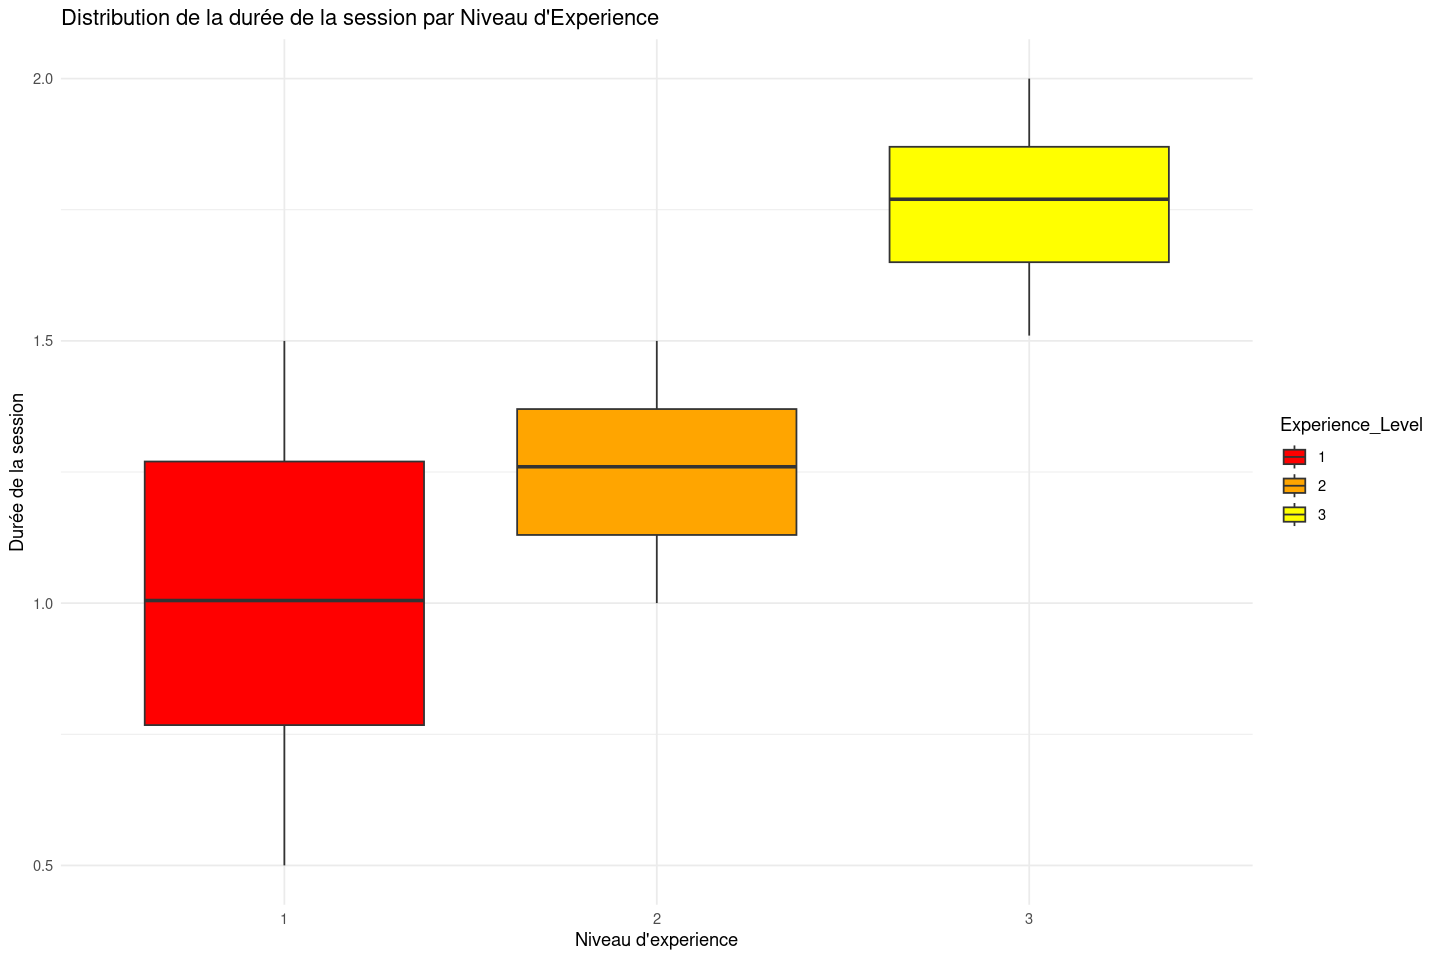

In [11]:
ggplot(Gym, aes(x = Experience_Level, y = Session_Duration, fill = Experience_Level)) +
  geom_boxplot() +
  labs(title = "Distribution de la durée de la session par Niveau d'Experience",
       x = "Niveau d'experience",
       y = "Durée de la session") +
  theme_minimal() +
  scale_fill_manual(values = c("1" = "red", "2" = "orange", "3"="yellow"))

On comprend de façon logique que les individus avec le plus d'expérience font des séances plus longues, c'est une première explication de pourquoi les plus expérimentés dépenssent plus de calories.

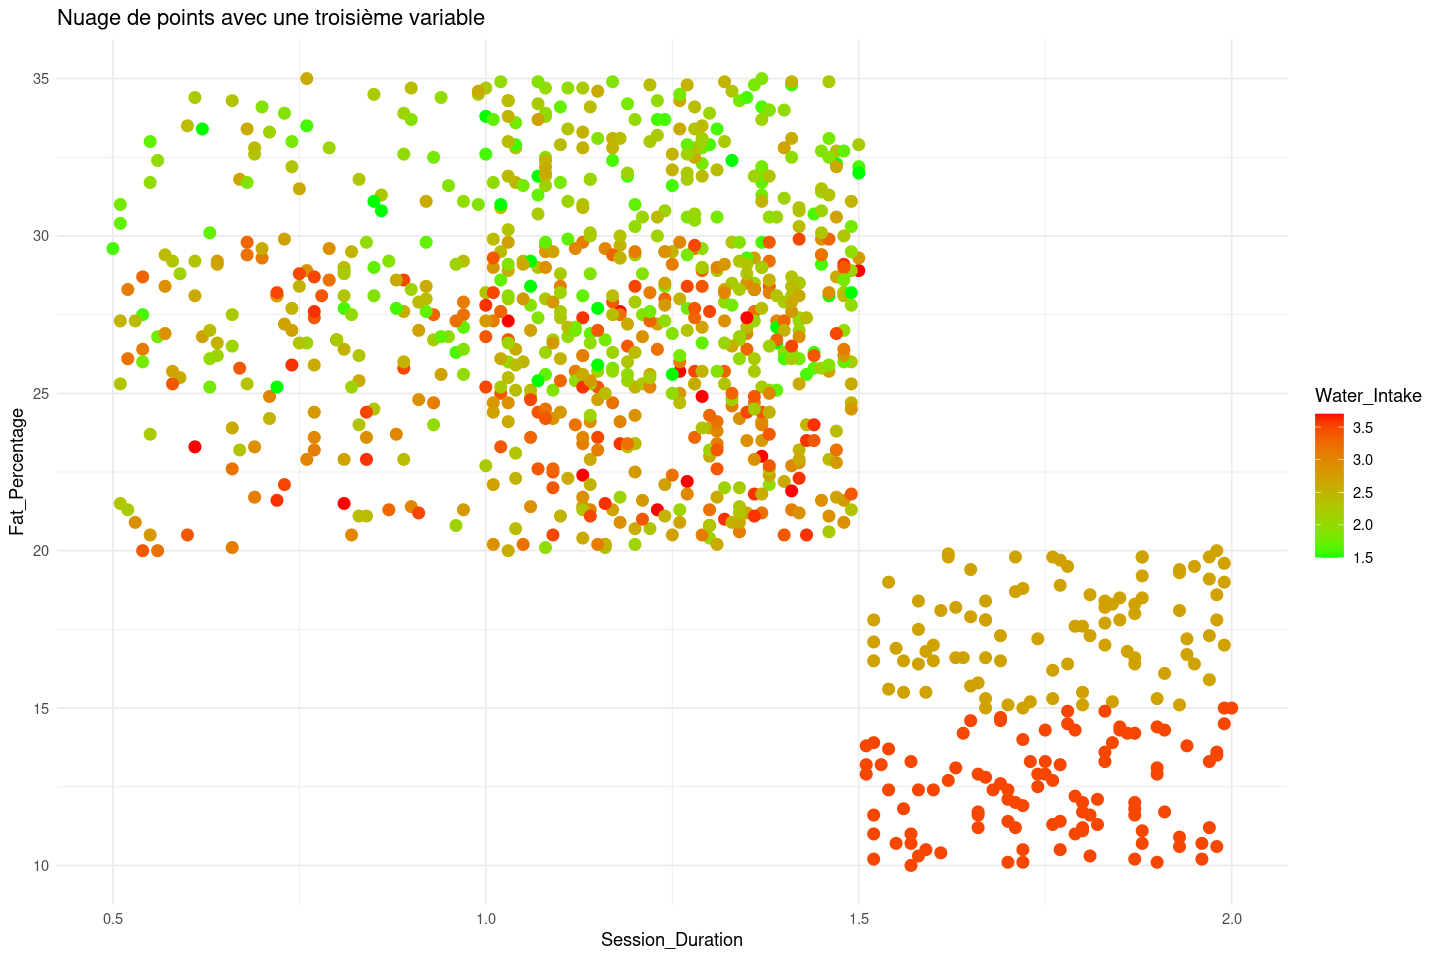

In [12]:
ggplot(Gym, aes(x=Session_Duration, y=Fat_Percentage, color=Water_Intake)) +
  geom_point(size=3) +  # Points colorés selon z
  scale_color_gradient(low="green", high="red") +  # Gradient de couleur
  labs(title="Nuage de points avec une troisième variable",
       x="Session_Duration", y="Fat_Percentage", color="Water_Intake") +
  theme_minimal()

Nous trouvons la présence d'un seuil assez étonnante mais cela peut-être lié à la manière dont les mesures ont été calculées. On a affiché les trois ensemble car elle présentent des corrélation négatives. Au vu de la répartion en seuil c'est encore une fois sûrement dû à la manières dont les données ont été collectées.

#### Quali/Quali

Warning message:
“... is ignored in group_split(<grouped_df>), please use group_by(..., .add =
TRUE) %>% group_split()”


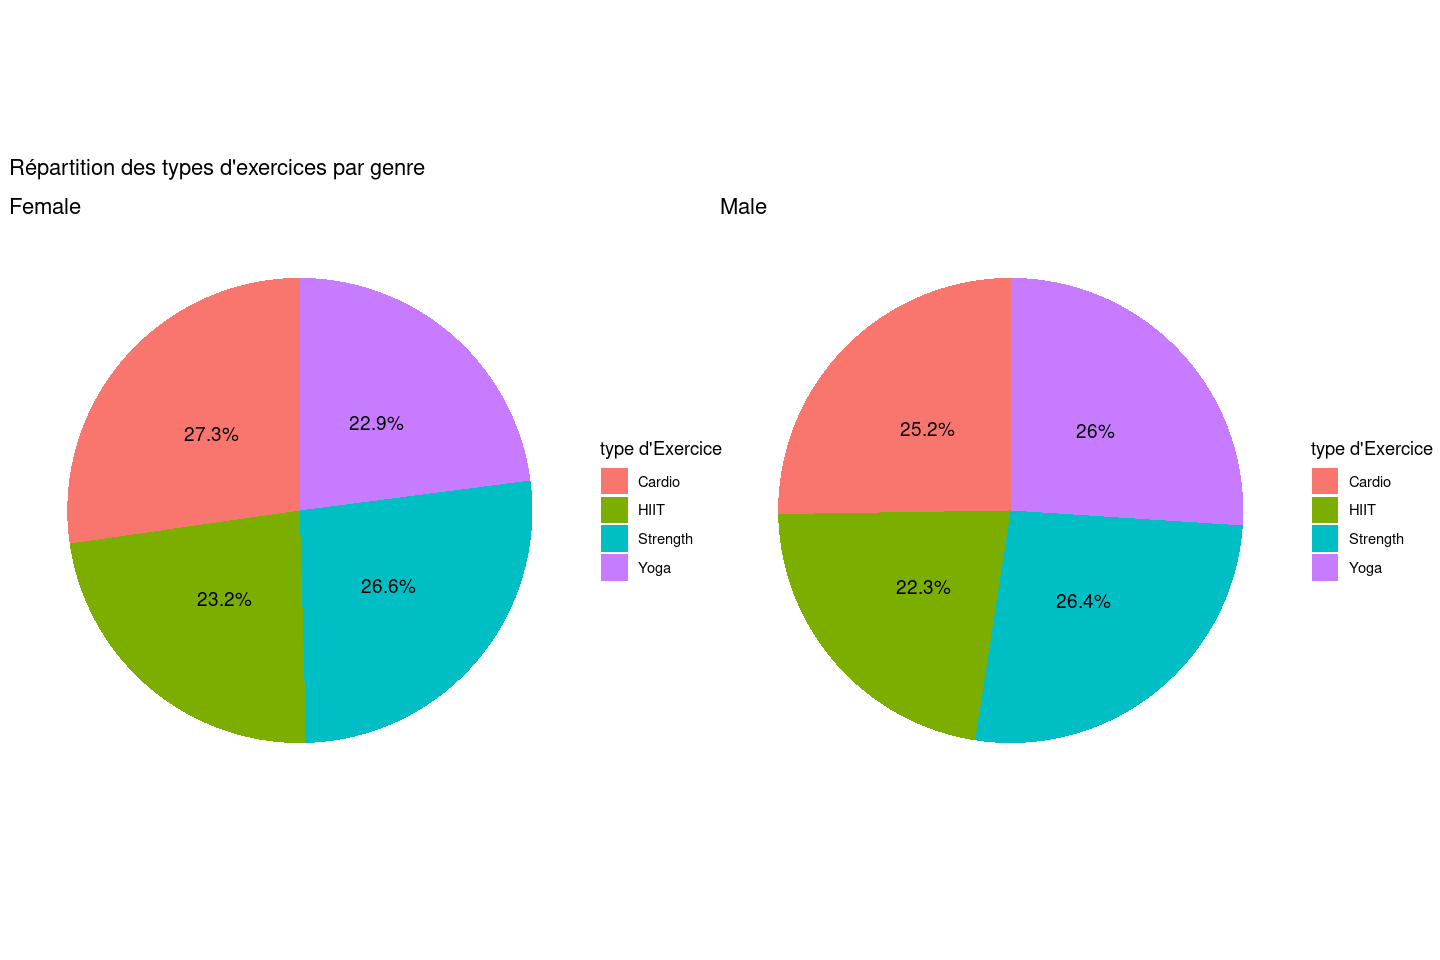

In [13]:
df_pie <- Gym %>%
  count(Gender, Workout_Type) %>%  # Compte les occurrences
  group_by(Gender, .add = TRUE) %>%
  mutate(Prop = n / sum(n), Label = paste0(round(Prop * 100, 1), "%"))

plot_pie <- function(Gym) {
  ggplot(Gym, aes(x = "", y = Prop, fill = Workout_Type)) +
    geom_bar(stat = "identity", width = 1) +
    coord_polar(theta = "y") +
    labs(title = unique(Gym$Gender), fill = "type d'Exercice") +
    theme_void() +
    theme(legend.position = "right") +
    geom_text(aes(label = Label), position = position_stack(vjust = 0.5), size = 4)
}

plots <- df_pie %>%
  group_split(Gender) %>%
  lapply(plot_pie)

wrap_plots(plots) + plot_annotation(title = "Répartition des types d'exercices par genre")

Warning message:
“... is ignored in group_split(<grouped_df>), please use group_by(..., .add =
TRUE) %>% group_split()”


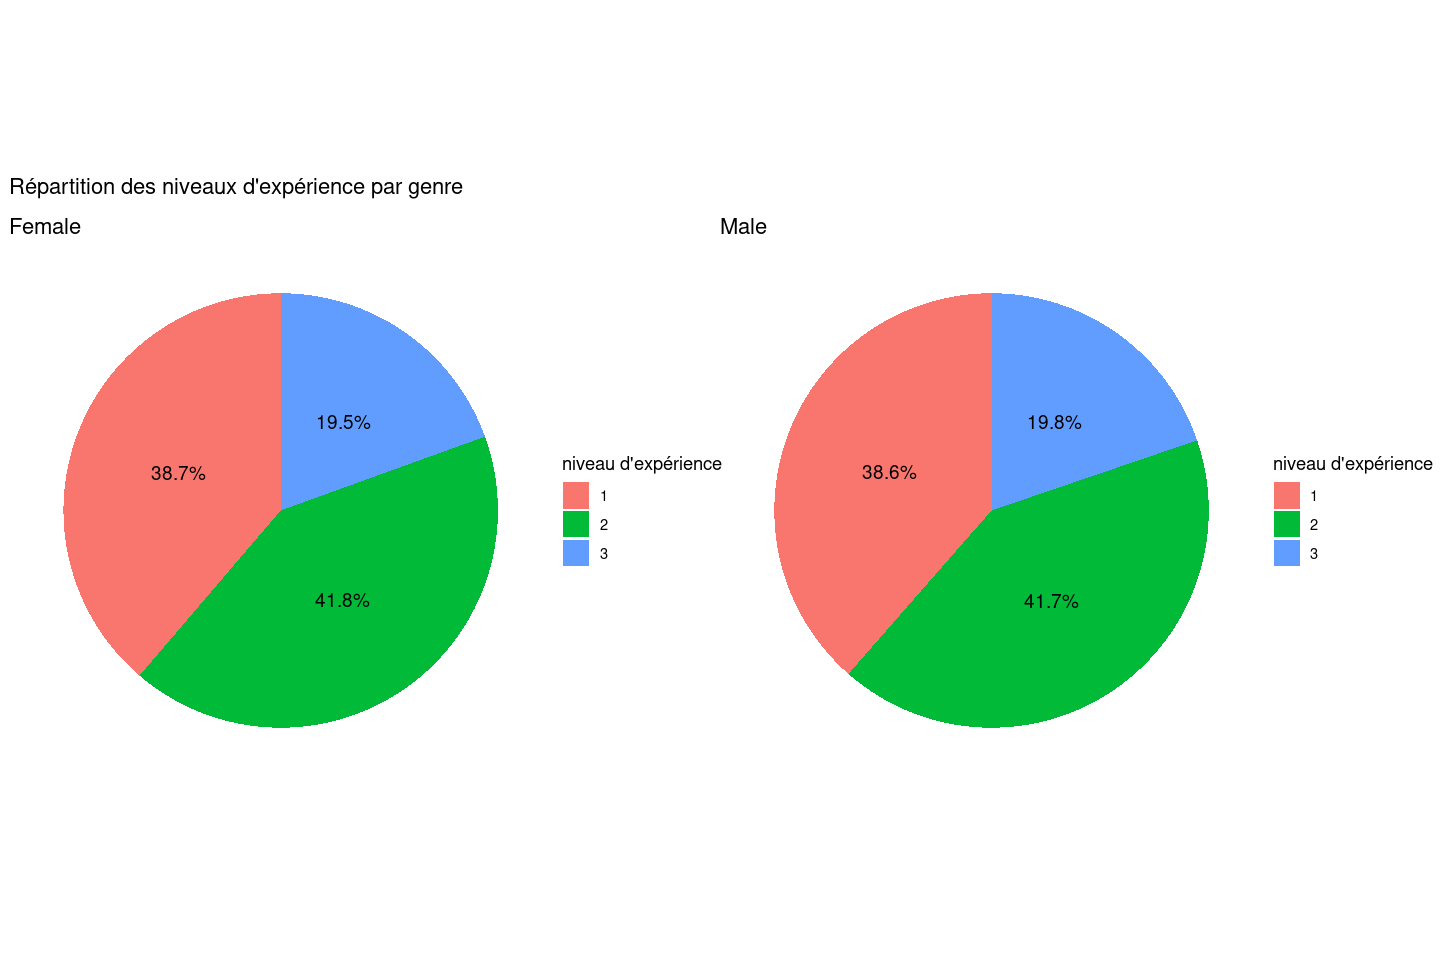

In [14]:
df_pie <- Gym %>%
  count(Gender, Experience_Level) %>%  # Compte les occurrences
  group_by(Gender, .add = TRUE) %>%
  mutate(Prop = n / sum(n), Label = paste0(round(Prop * 100, 1), "%"))

plot_pie <- function(Gym) {
  ggplot(Gym, aes(x = "", y = Prop, fill = Experience_Level)) +
    geom_bar(stat = "identity", width = 1) +
    coord_polar(theta = "y") +
    labs(title = unique(Gym$Gender), fill = "niveau d'expérience") +
    theme_void() +
    theme(legend.position = "right") +
    geom_text(aes(label = Label), position = position_stack(vjust = 0.5), size = 4)
}

plots <- df_pie %>%
  group_split(Gender) %>%
  lapply(plot_pie)

wrap_plots(plots) + plot_annotation(title = "Répartition des niveaux d'expérience par genre")

on voit que la répartition des niveaux d'expériences est similaire entre les hommes et les femmes. On ne peut donc pas expliquer la différence de calories brulées par une différence de niveau.

## Analyse en Composante Principale 

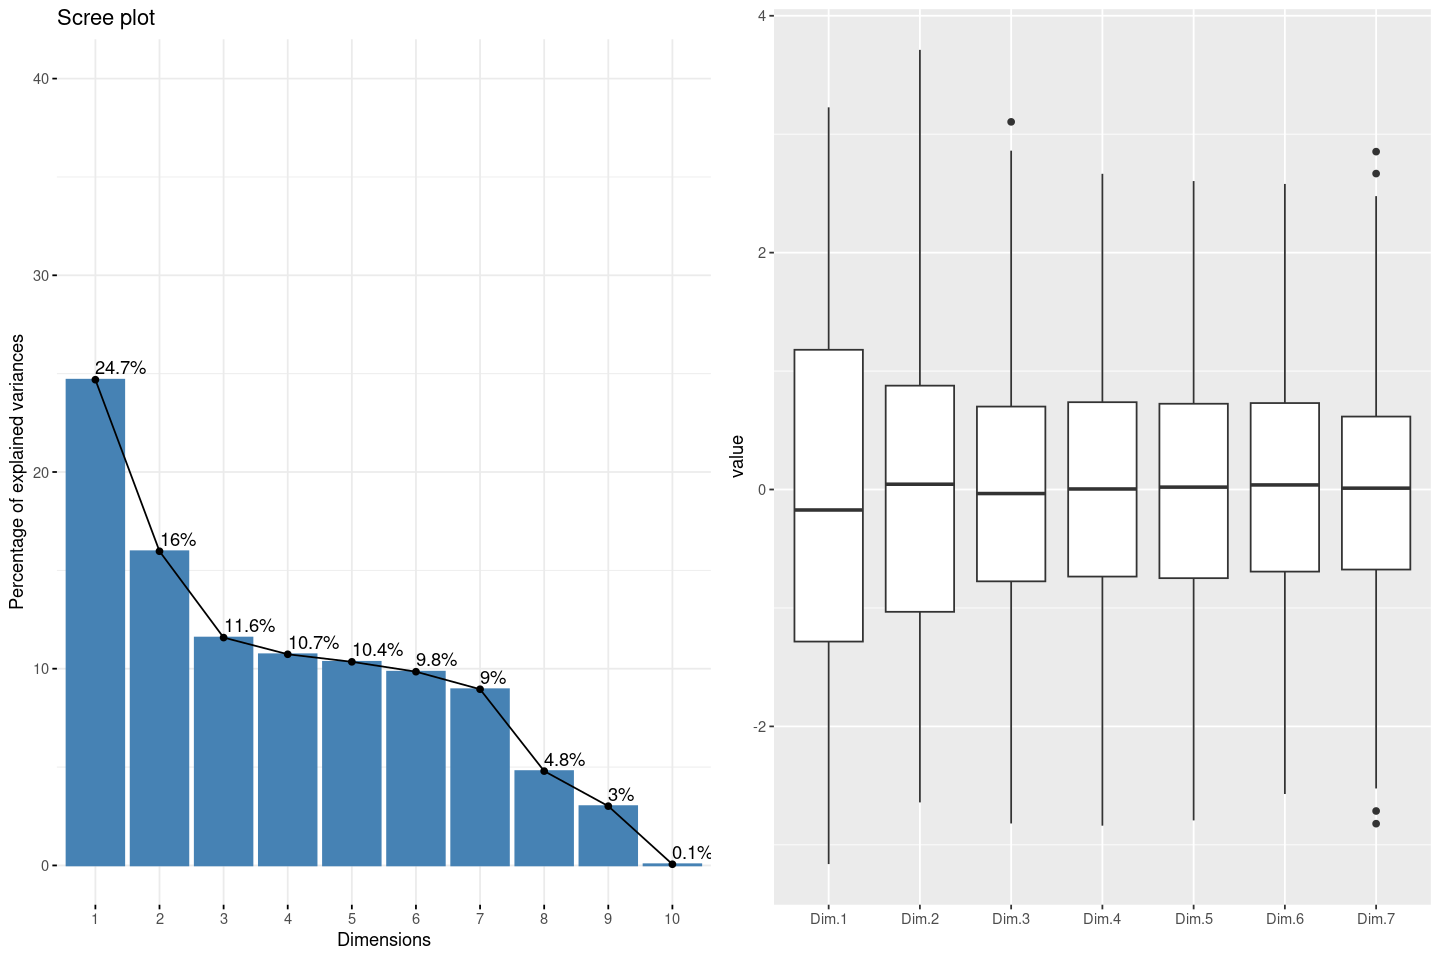

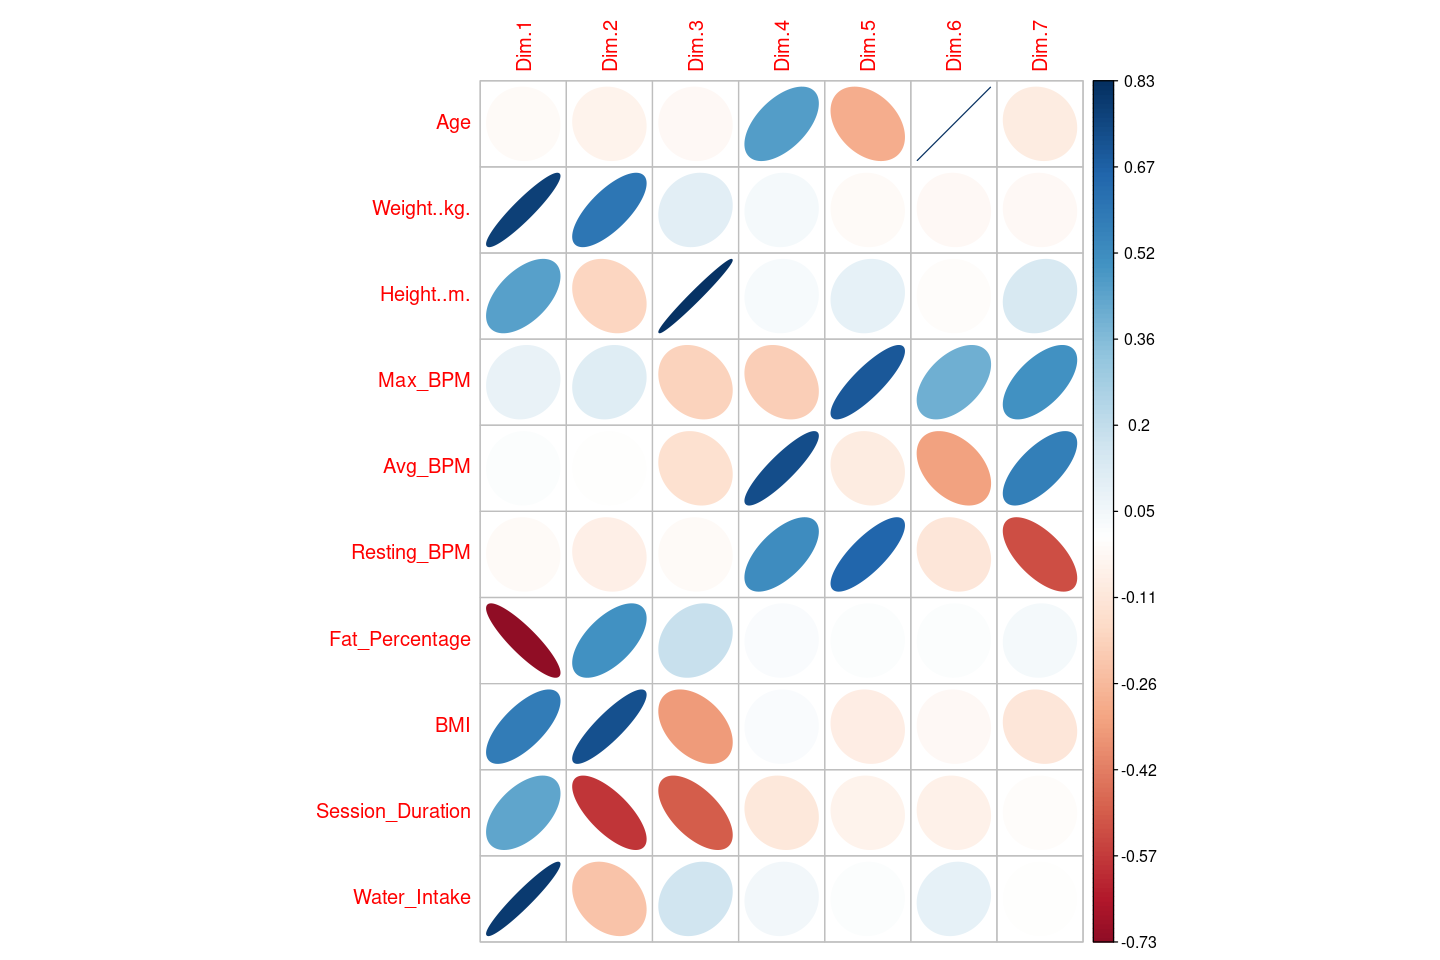

In [15]:
acp <- PCA(Gym[, c(1,3:8,10,12,14:15)], scale.unit = TRUE,
           graph = FALSE, quanti.sup = 7, ncp = 7)

g1<-fviz_eig(acp, addlabels = TRUE, ylim = c(0, 40))
library(reshape2)
g2<-ggplot(melt(acp$ind$coord),aes(x=Var2,y=value))+
  geom_boxplot()+
  xlab("")
grid.arrange(g1,g2,ncol=2)

corrplot(acp$var$cor, is.corr=FALSE,method="ellipse")

Par ces graphiques on veut évaluer la pertinence d'une Analyse en composantes principales. On voit ici que pour avoir une variance cumulée supérieure à 80% il nous faudrait 6 dimensions. Ne pouvant pas faire de représentation en 6 dimensions il va être compliqué de faire une ACP très pertinente. Pour commencer une analyse nous avons décider de présenter des graphiques sur les 3 premières dimensions mais il faut prendre en compte que les représentations ne représenteront que peu d'information. 

In [16]:
acp <- PCA(Gym[, c(1,3:8,10,12,14:15)], scale.unit = TRUE,
           graph = FALSE, quanti.sup = 7, ncp = 6)

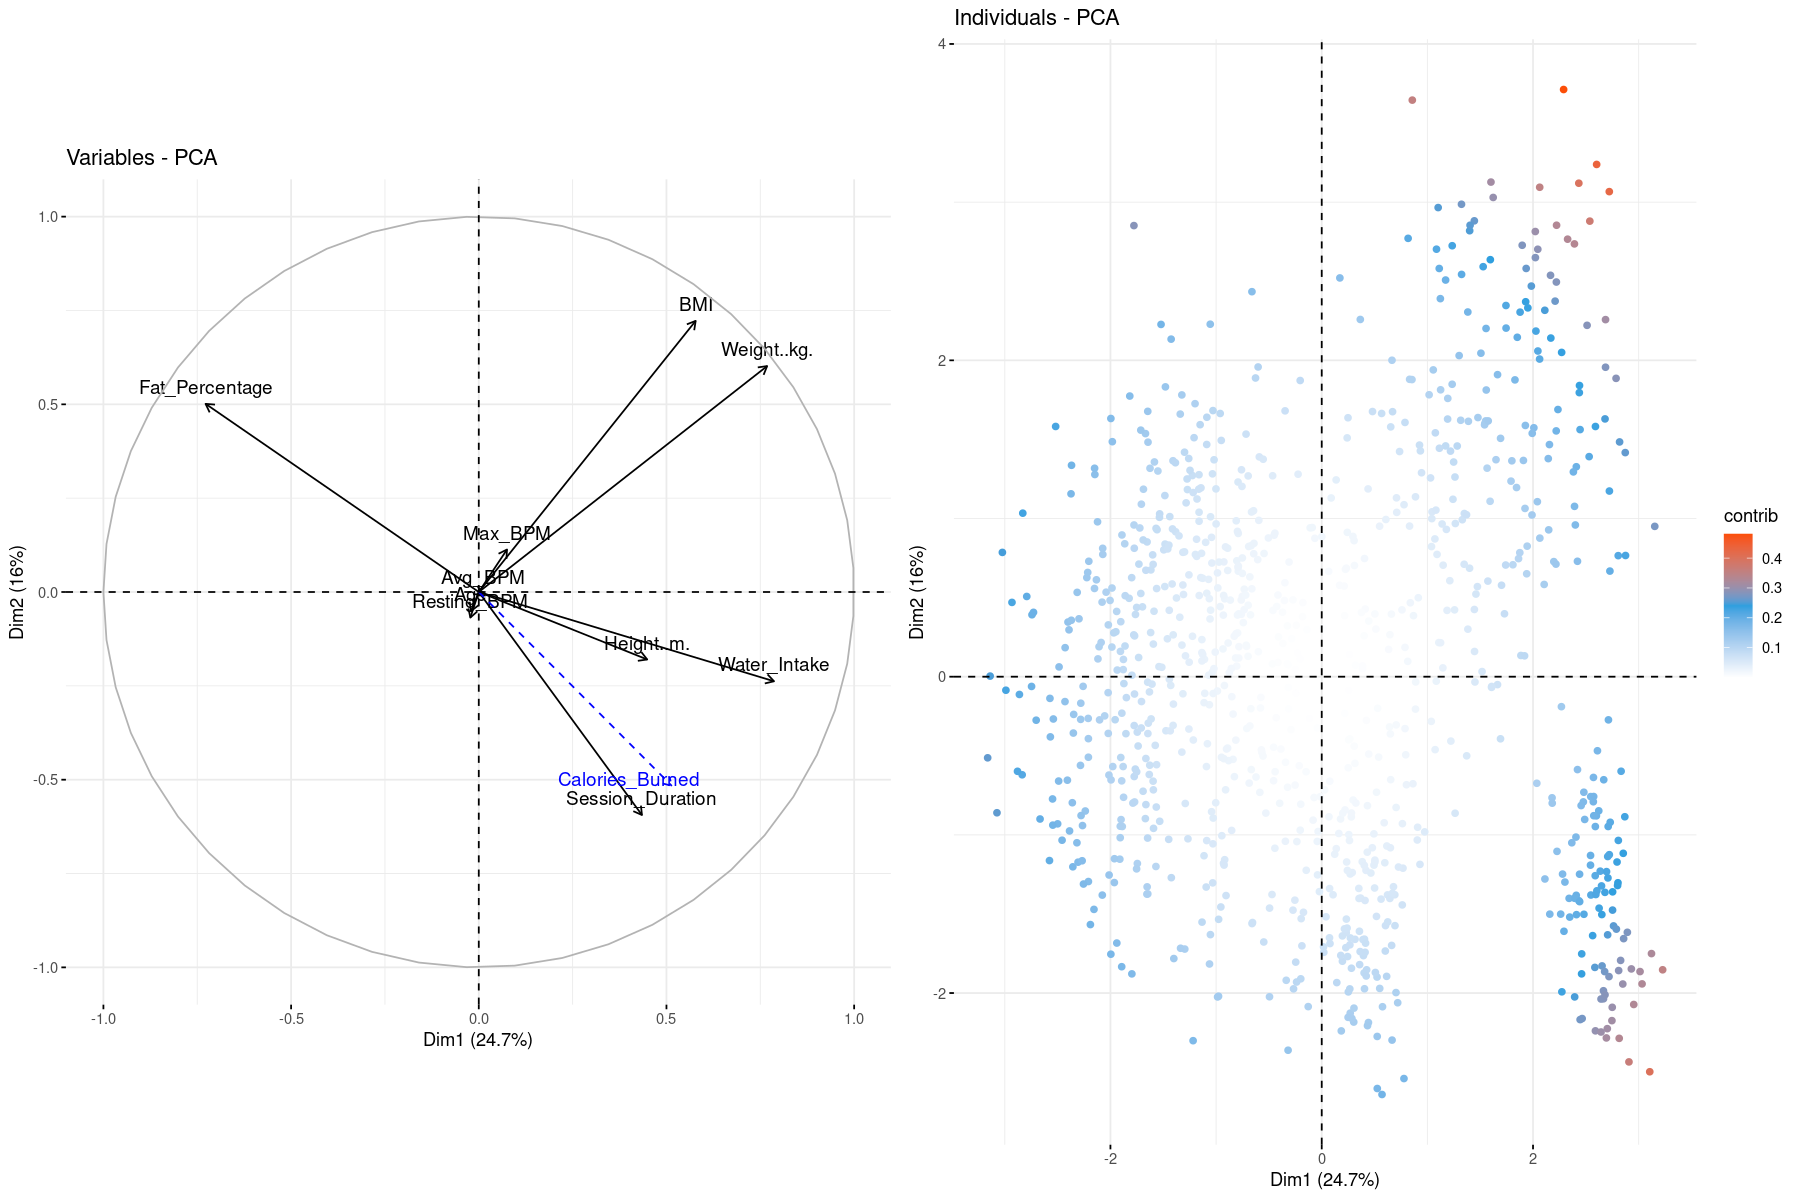

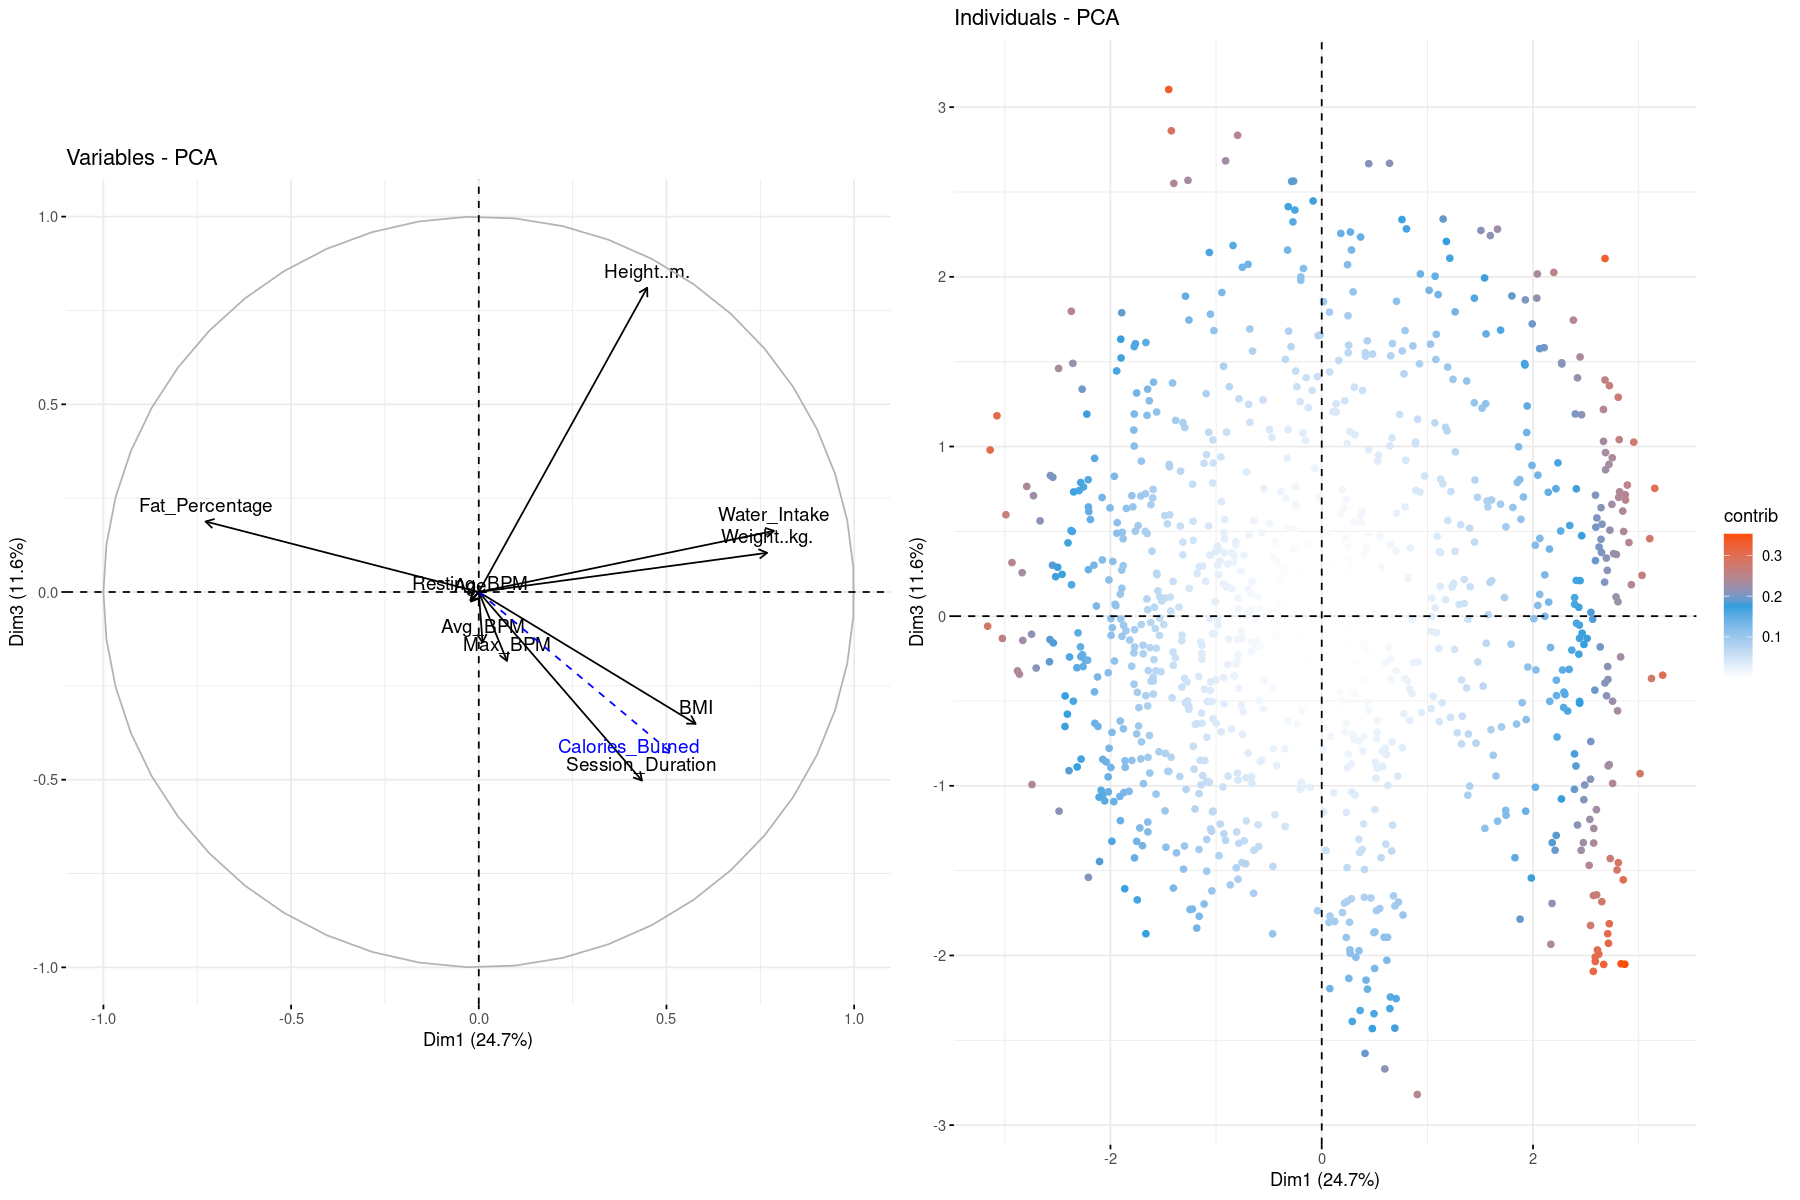

In [17]:
options(repr.plot.width=15, repr.plot.height=10)
p1 <- fviz_pca_var(acp)
p2 <- fviz_pca_ind(acp,col.ind="contrib",label="none",gradient.cols = c("white", "#2E9FDF", "#FC4E07" ))
grid.arrange(p1,p2, ncol=2)
p3 <-fviz_pca_var(acp,axes=c(1,3))
p4<- fviz_pca_ind(acp,col.ind="contrib",label="none",gradient.cols = c("white", "#2E9FDF", "#FC4E07" ),axes=c(1,3))
grid.arrange(p3,p4,ncol=2)

Grâce aux graphiques ci-dessus nous pouvons expliquer quelles dimensions sont portées par quelles variables et ainsi essayer de les expliquer. Ainsi on remarque assez facilement que la dimension 1, portée par des variables comme le poids, la consommation d'eau, l'IMC et le pourcentage de masse graisseuse, représente le corps de l'individu, son profil pûrement physique. 
De plus, la dimension 2, portée par les variables poids, IMC, calories brulées et durée de la séance, représente plus le profil de l'individu en tant que sportif. La dimension 3 quant à elle est plus difficile à interpréter. 

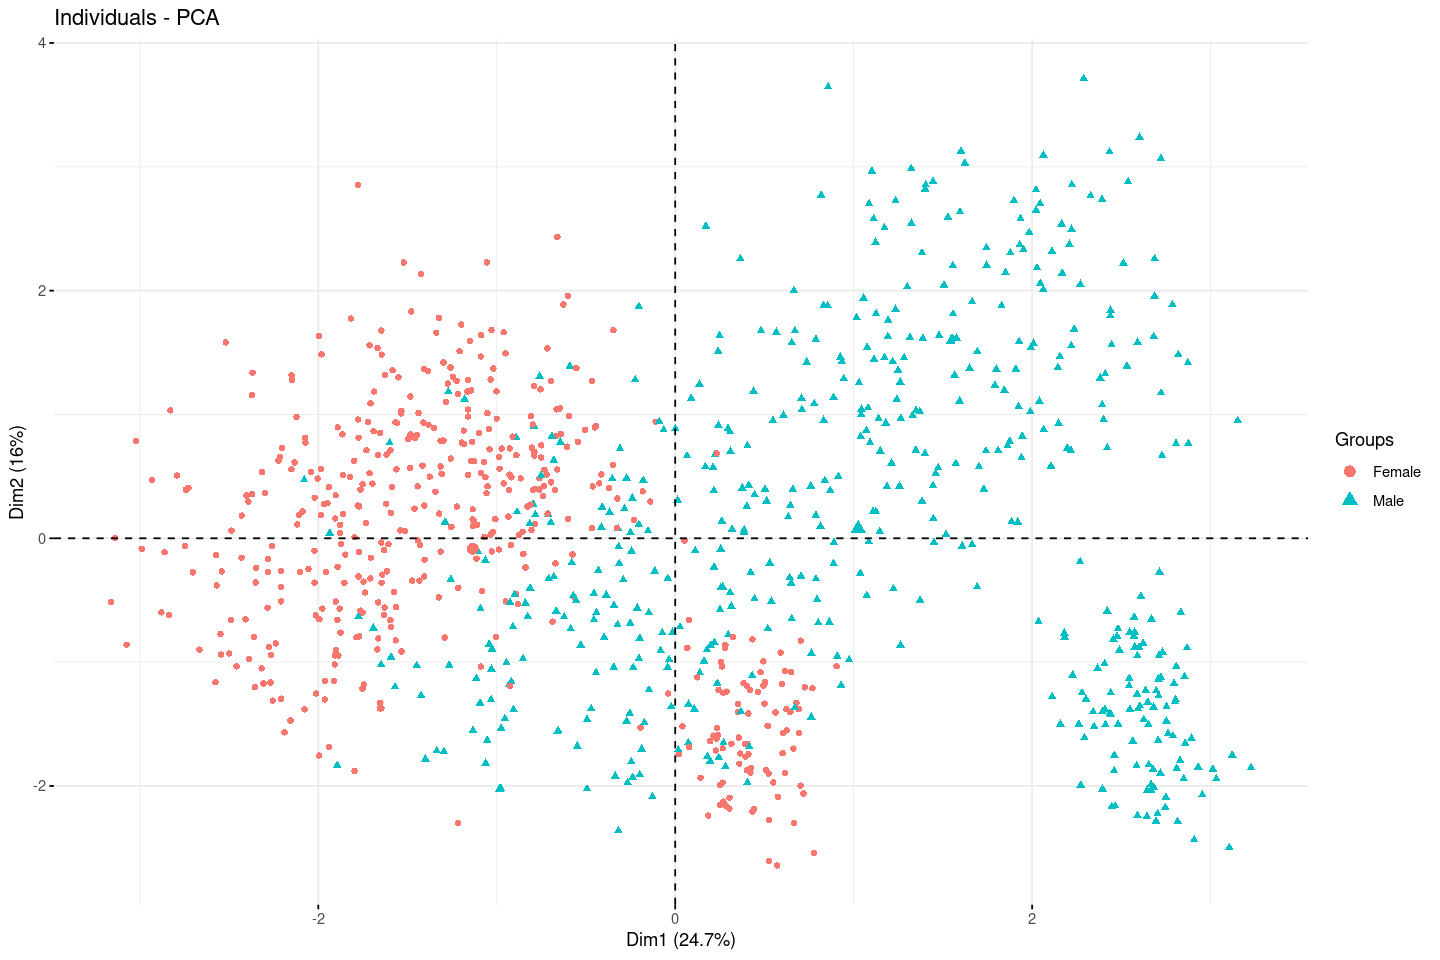

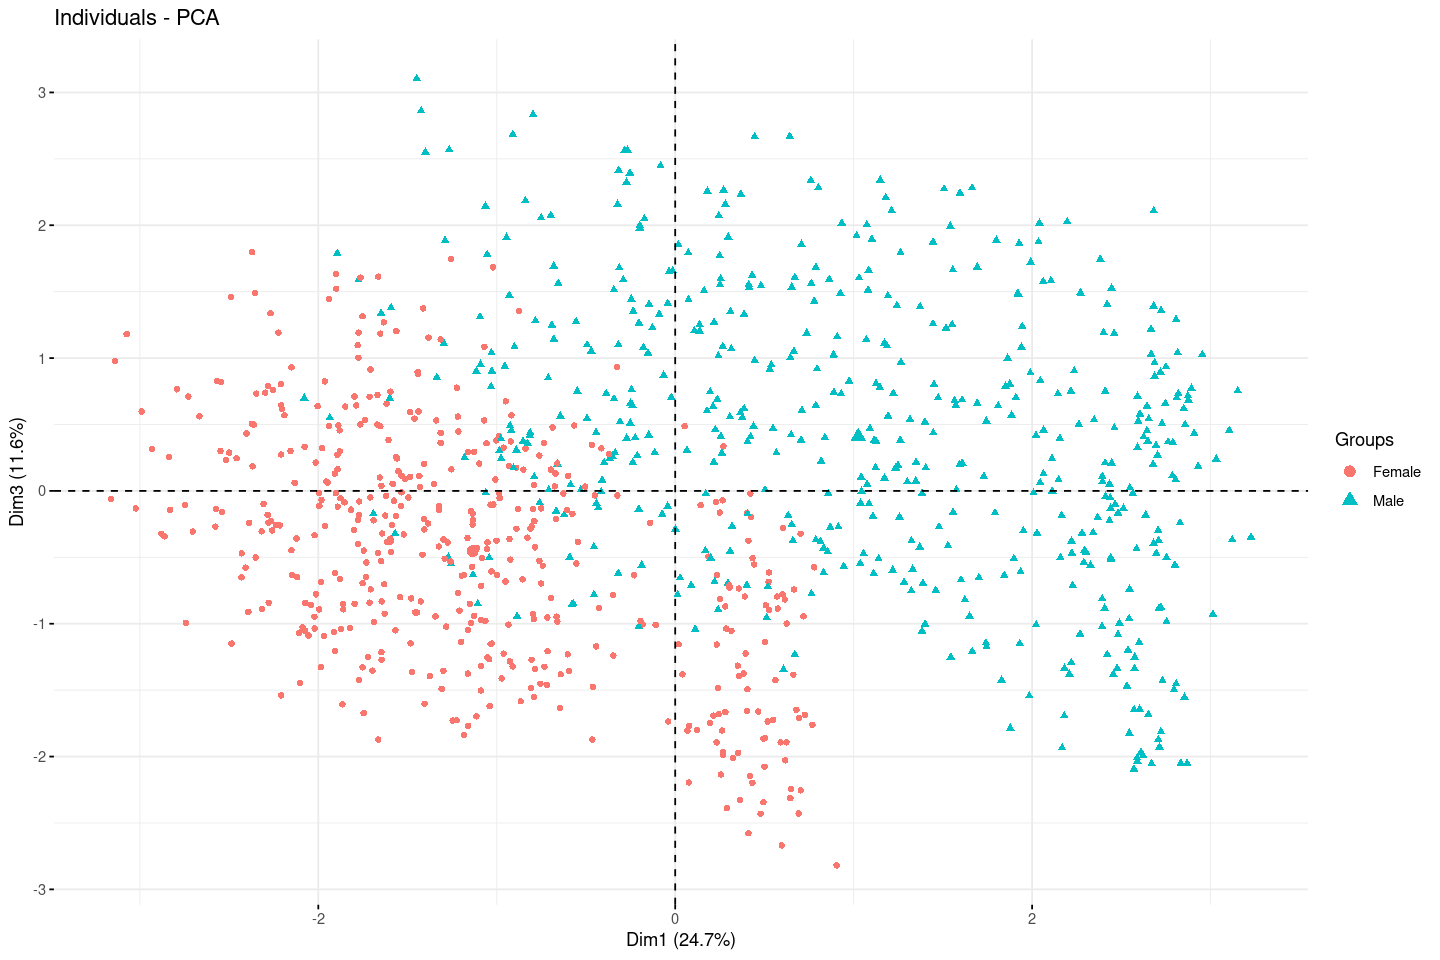

In [18]:
options(repr.plot.width=12, repr.plot.height=8)

fviz_pca_ind(acp, label="none", habillage=Gym$Gender)
fviz_pca_ind(acp, label="none", habillage=Gym$Gender, axes=c(1,3))

Dans ces projections en ACP des individus sur les dimensions 1 et 2 puis 1 et 3 certains groupes se distinguent. En effet, sur le premier graphique on distingu clairement 2 groupes se distingant du reste, ce sont un groupe de femme et un groupe d'homme que nous pourrions considérer comme les plus sportif, ce sont sûrement des individus qui brûlent le plus de calories parmi les femmes et les hommes. 

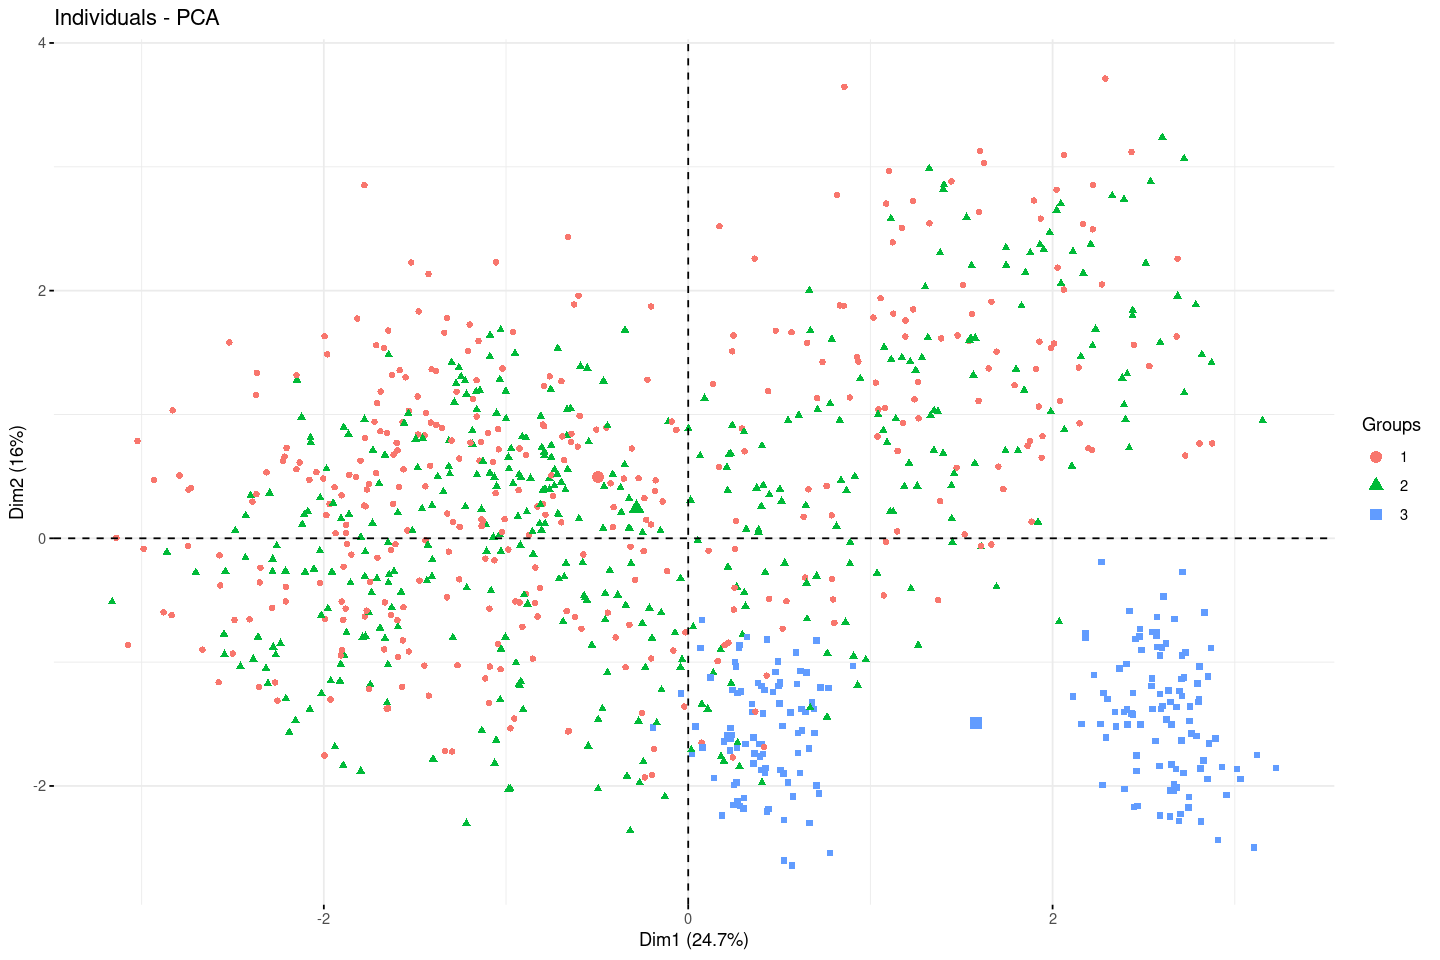

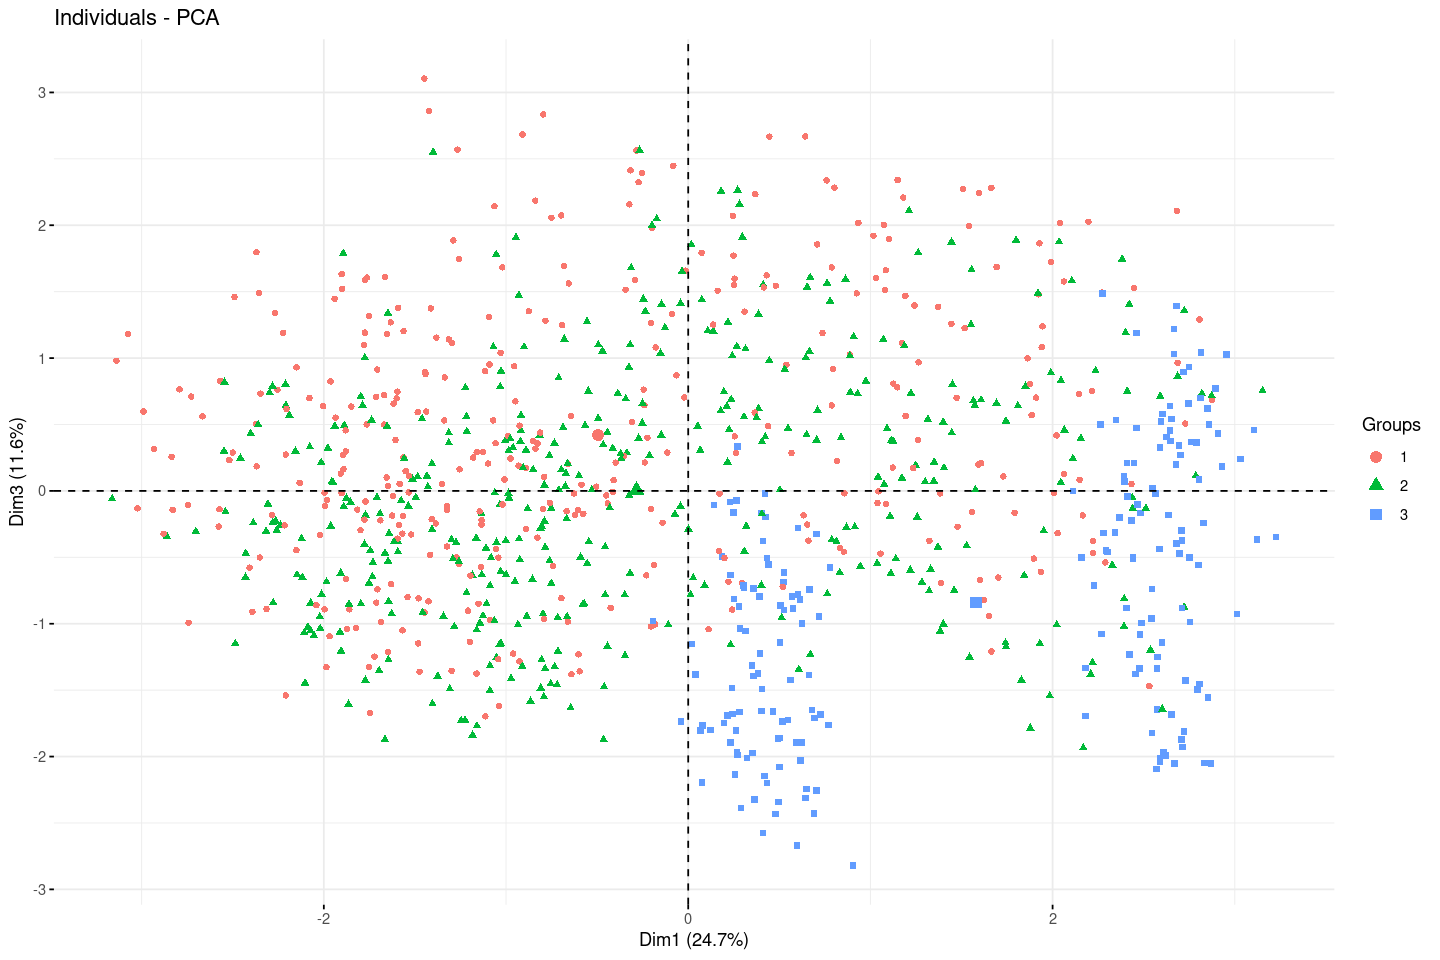

In [19]:
fviz_pca_ind(acp, label="none", habillage=Gym$Experience_Level)
fviz_pca_ind(acp, label="none", habillage=Gym$Experience_Level, axes=c(1,3))

Par ces représentations, nous avons confirmé notre intuition précédente, puisque les deux groupes qui se distinguaient
correspondent à deux groupes d'individus expérimentés

# Prévision des calories brulées

Dans cette partie, nous avons pour objectif de prédire la quantité de calories brûlées par rapport aux autres variables à notre disposition. Pour cela, nous allons tester plusieurs modèles et comparer leur éfficacité.

## Séparation de la base en train/test

Avant de pouvoir réaliser nos différents modèles de prédiction, il est d'abord nécessaire de séparer nos données en deux parties. La première partie correspond à 80% de la base initiale. Elle permet d'entraîner un modèle sur les données qui lui sont fournies. La seconde partie est celle de test. Elle permettra d'appliquer le modèle entraîné et de comparer les différentes méthodes entre elles.  

In [20]:
set.seed(150) # initialisation du générateur
# Extraction des échantillons
test.ratio <- .2   # part de l'échantillon test
npop <- nrow(Gym) # nombre de lignes dans les données
nvar <- ncol(Gym) # nombre de colonnes
# taille de l'échantillon test
ntest <- ceiling(npop * test.ratio) 
# indices de l'échantillon test
testi <- sample(1:npop, ntest)
# indices de l'échantillon d'apprentissage
appri <- setdiff(1:npop, testi) 

In [21]:
# construction de l'échantillon d'apprentissage
datappr0 <- Gym[appri,] 
# construction de l'échantillon test
datestr0 <- Gym[testi,]

summary(datappr0)
summary(datestr0)

      Age           Gender     Weight..kg.       Height..m.       Max_BPM     
 Min.   :18.00   Female:374   Min.   : 40.00   Min.   :1.500   Min.   :160.0  
 1st Qu.:28.00   Male  :404   1st Qu.: 58.02   1st Qu.:1.620   1st Qu.:170.0  
 Median :39.00                Median : 69.70   Median :1.710   Median :180.0  
 Mean   :38.57                Mean   : 73.66   Mean   :1.723   Mean   :179.8  
 3rd Qu.:49.00                3rd Qu.: 85.60   3rd Qu.:1.800   3rd Qu.:190.0  
 Max.   :59.00                Max.   :129.90   Max.   :2.000   Max.   :199.0  
    Avg_BPM     Resting_BPM    Calories_Burned    Workout_Type Fat_Percentage 
 Min.   :120   Min.   :50.00   Min.   : 303.0   Cardio  :201   Min.   :10.00  
 1st Qu.:132   1st Qu.:56.00   1st Qu.: 723.5   HIIT    :175   1st Qu.:21.20  
 Median :144   Median :62.00   Median : 895.0   Strength:203   Median :26.25  
 Mean   :144   Mean   :62.12   Mean   : 909.4   Yoga    :199   Mean   :24.93  
 3rd Qu.:156   3rd Qu.:68.00   3rd Qu.:1089.8       

      Age           Gender     Weight..kg.       Height..m.       Max_BPM     
 Min.   :18.00   Female: 88   Min.   : 41.10   Min.   :1.500   Min.   :160.0  
 1st Qu.:28.00   Male  :107   1st Qu.: 58.30   1st Qu.:1.620   1st Qu.:170.0  
 Median :40.00                Median : 70.60   Median :1.700   Median :181.0  
 Mean   :39.15                Mean   : 74.62   Mean   :1.722   Mean   :180.3  
 3rd Qu.:51.00                3rd Qu.: 86.95   3rd Qu.:1.795   3rd Qu.:190.0  
 Max.   :59.00                Max.   :128.40   Max.   :2.000   Max.   :199.0  
    Avg_BPM       Resting_BPM    Calories_Burned    Workout_Type
 Min.   :120.0   Min.   :50.00   Min.   : 319.0   Cardio  :54   
 1st Qu.:131.0   1st Qu.:56.00   1st Qu.: 711.0   HIIT    :46   
 Median :139.0   Median :64.00   Median : 882.0   Strength:55   
 Mean   :142.8   Mean   :62.63   Mean   : 889.7   Yoga    :40   
 3rd Qu.:156.0   3rd Qu.:68.50   3rd Qu.:1025.0                 
 Max.   :169.0   Max.   :74.00   Max.   :1701.0          

Afin de rentre toutes les données comparables, on normalise l'échantillon de test et l'échantillon d'apprentissage exempté de la variable à prédire. 

In [22]:
# on normalise l'échantillon d'apprentissage
datappr=datappr0
datappr[,-c(2,8,9,11,13)]=scale(datappr0[,-c(2,8,9,11,13)])

# on normalise l'échantillon test 
# à l'aide des caractéristiques de l'échantillon d'apprentissage
datestr=datestr0
datestr[,-c(2,8,9,11,13)]=scale(datestr0[,-c(2,8,9,11,13)],
                            center=sapply(datappr0[,-c(2,8,9,11,13)],mean), # on centre avec les moyennes de l'échantillon d'apprentissage
                            scale=sapply(datappr0[,-c(2,8,9,11,13)],sd)) # on réduit avec les écart-types de l'échantillon d'apprentissage
summary(datappr)
summary(datestr)

      Age              Gender     Weight..kg.        Height..m.     
 Min.   :-1.69638   Female:374   Min.   :-1.5897   Min.   :-1.7610  
 1st Qu.:-0.87152   Male  :404   1st Qu.:-0.7385   1st Qu.:-0.8126  
 Median : 0.03584                Median :-0.1871   Median :-0.1014  
 Mean   : 0.00000                Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.86070                3rd Qu.: 0.5637   3rd Qu.: 0.6099  
 Max.   : 1.68557                Max.   : 2.6558   Max.   : 2.1905  
    Max_BPM            Avg_BPM            Resting_BPM       Calories_Burned 
 Min.   :-1.71221   Min.   :-1.672e+00   Min.   :-1.65238   Min.   : 303.0  
 1st Qu.:-0.84614   1st Qu.:-8.360e-01   1st Qu.:-0.83442   1st Qu.: 723.5  
 Median : 0.01993   Median :-8.954e-05   Median :-0.01647   Median : 895.0  
 Mean   : 0.00000   Mean   : 0.000e+00   Mean   : 0.00000   Mean   : 909.4  
 3rd Qu.: 0.88599   3rd Qu.: 8.358e-01   3rd Qu.: 0.80148   3rd Qu.:1089.8  
 Max.   : 1.66546   Max.   : 1.741e+00   Max.   : 1.619

      Age              Gender     Weight..kg.         Height..m.       
 Min.   :-1.69638   Female: 88   Min.   :-1.53774   Min.   :-1.761001  
 1st Qu.:-0.87152   Male  :107   1st Qu.:-0.72548   1st Qu.:-0.812645  
 Median : 0.11832                Median :-0.14462   Median :-0.180407  
 Mean   : 0.04853                Mean   : 0.04532   Mean   :-0.009784  
 3rd Qu.: 1.02567                3rd Qu.: 0.62750   3rd Qu.: 0.570375  
 Max.   : 1.68557                Max.   : 2.58496   Max.   : 2.190483  
    Max_BPM            Avg_BPM          Resting_BPM       Calories_Burned 
 Min.   :-1.71221   Min.   :-1.67193   Min.   :-1.65238   Min.   : 319.0  
 1st Qu.:-0.84614   1st Qu.:-0.90567   1st Qu.:-0.83442   1st Qu.: 711.0  
 Median : 0.10653   Median :-0.34839   Median : 0.25618   Median : 882.0  
 Mean   : 0.04924   Mean   :-0.08154   Mean   : 0.06952   Mean   : 889.7  
 3rd Qu.: 0.88599   3rd Qu.: 0.83583   3rd Qu.: 0.86965   3rd Qu.:1025.0  
 Max.   : 1.66546   Max.   : 1.74141   Max.   

In [23]:
gplot.res <- function(x, y, titre = "titre"){
    ggplot(data.frame(x=x, y=y),aes(x,y))+
    geom_point(col = "blue")+xlim(200,2000)+ylim(-150,200)+
    ylab("Résidus")+ xlab("Valeurs prédites")+
    ggtitle(titre)+
    geom_hline(yintercept = 0,col="green")
}

## Modèle linéaires

On s'intéresse d'abord aux modèles de type linéaire. Ceux-ci sont vastement utilisés pour leur simplicité et leur interprétabilité.

### Sans pénalisation et sans sélection de variables

La variable à expliquer étant quantitative, on utilise un de régression linéaire de type ANCOVA sans intéractions.

In [24]:
options(repr.plot.width=8, repr.plot.height=6)

# estimation du modèle sans interaction
reg.lm <-aov(Calories_Burned ~ . , data = datappr)
summary(reg.lm)
# Extraction des résidus et des valeurs ajustées de ce modèle
res.lm <- reg.lm$residuals
fit.lm <- reg.lm$fitted.values

                   Df   Sum Sq  Mean Sq   F value   Pr(>F)    
Age                 1  1370418  1370418   846.877  < 2e-16 ***
Gender              1  1258021  1258021   777.419  < 2e-16 ***
Weight..kg.         1    19288    19288    11.919 0.000586 ***
Height..m.          1      898      898     0.555 0.456480    
Max_BPM             1    13399    13399     8.280 0.004120 ** 
Avg_BPM             1  6693583  6693583  4136.433  < 2e-16 ***
Resting_BPM         1        5        5     0.003 0.955216    
Workout_Type        3   502697   167566   103.550  < 2e-16 ***
Fat_Percentage      1 19926671 19926671 12314.081  < 2e-16 ***
Experience_Level    2  9695358  4847679  2995.719  < 2e-16 ***
BMI                 1     3602     3602     2.226 0.136125    
Workout_Frequency   3    29856     9952     6.150 0.000392 ***
Session_Duration    1 17829857 17829857 11018.314  < 2e-16 ***
Water_Intake        1       33       33     0.020 0.886265    
Residuals         758  1226597     1618                

Nous allons calculer le R2 et l'erreur moyenne du modèle afin d'avoir des données comparables que nous recalculerons par la suite pour les autres modèles.

In [25]:
summary_lm <- summary.lm(reg.lm) 

R2 <- 1 - sum(summary_lm$residuals^2) / sum((datappr$Calories_Burned - mean(datappr$Calories_Burned))^2)

n <- nrow(datappr)
p <- length(coef(summary_lm)) - 1  
R2_adj <- 1 - ((1 - R2) * (n - 1)) / (n - p - 1)

# Affichage
cat("R² classique :", round(R2, 4), "\n")
cat("R² ajusté     :", round(R2_adj, 4), "\n")
MSE <- mean(summary_lm$residuals^2)
cat("MSE :", MSE, "\n")

R² classique : 0.9791 
R² ajusté     : 0.9767 
MSE : 1576.603 


Le R2 classique étant fortement élevé, on en déduit que ce modèle a un biais très faible. Cependant,sans pénalisation les modèles linéaires ont tendance à faire de l'overfitting pour un nombre de paramètres important. On se retrouve donc avec des modèles trop complexes. Cela se traduit par un R2 ajusté plus faible bien que très satisfaisant. Par la suite, on utilisera principalement la MSE, étant une valeur sûre pour comparer nos méthodes.

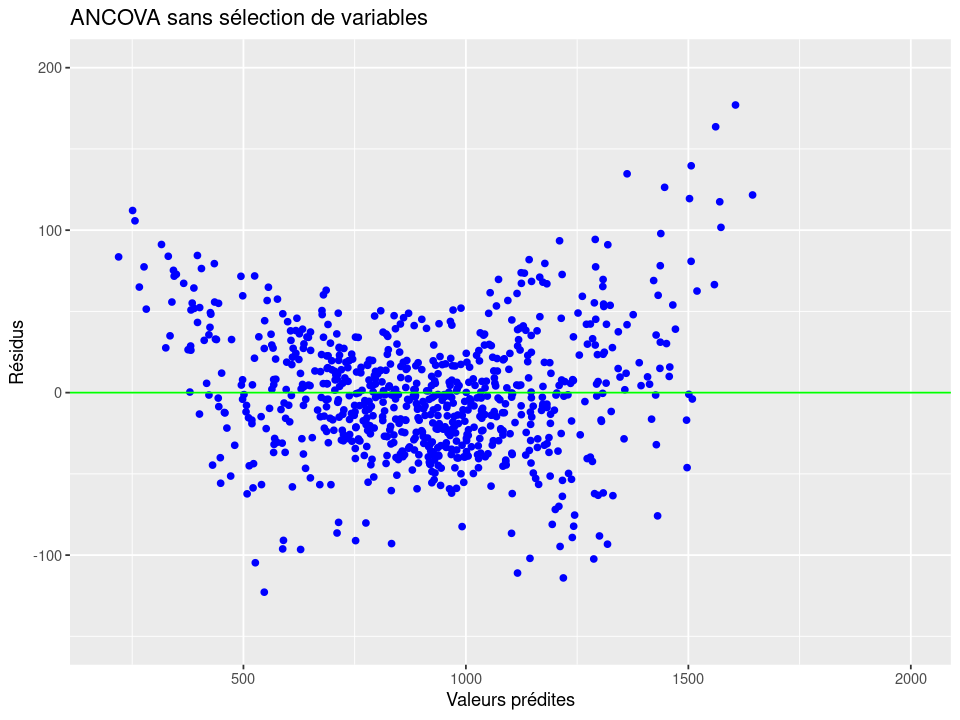

In [26]:
options(repr.plot.width=8, repr.plot.height=6)
# Graphe des résidus. 
gplot.res(fit.lm,res.lm,"ANCOVA sans sélection de variables")

En affichant le graphique des résidus on remarque une forme "en banane" synonyme d'un modèle peu fiable. En effet, si le modèle était bon nous observerions une ligne droit proche de la ligne y=0. Cela confirme que le modèle de régression linéaire sans pénalisation ni sélection de variable n'est pas très efficace pour la prédiction des calories brulées.

### Avec pénalisation

Il est nécessaire de trouver un équilibre entre le biais et la variance. En effet, dans certaines situations, il est préférable de choisir un modèle biaisé, qui permet de réduire de manière importante que de choisir un modèle à R2 élevé. A cet effet, nous allons utiliser différents critères de pénalisation sur les modèles trop complexes. 

#### Sans sélection de variables (Ridge)

In [27]:
lambdas <- seq(0.01, 10, length.out = 100)
x.mat <- model.matrix(Calories_Burned ~ . - 1, data = datappr)

# Entraînement du modèle avec validation croisée
regRidgeCV <- cv.glmnet(x = x.mat, 
                        y = datappr[, 8], 
                        alpha = 0,                  # alpha = 0 => Ridge
                        lambda = lambdas, 
                        nfolds = 5,
                        standardize = TRUE)

# Meilleur paramètre lambda
lambda_opt <- regRidgeCV$lambda.min
cat("Meilleur paramètre = ", lambda_opt, "\n")

Meilleur paramètre =  0.2118182 


Ridge avec lambda.1se - MSE : 1642.8 


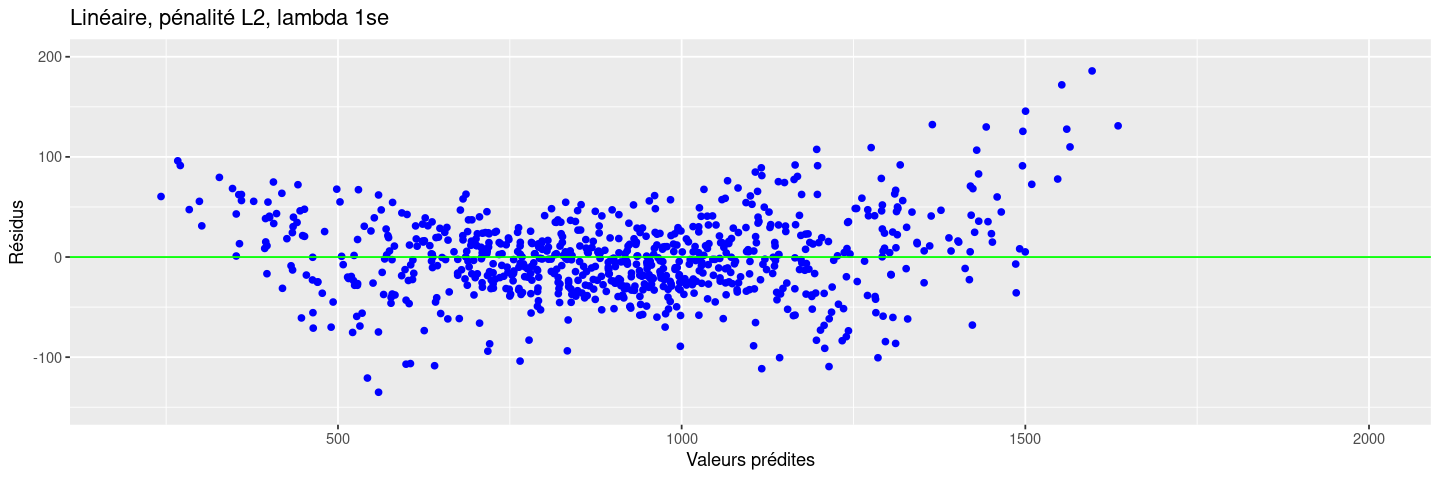

In [28]:
fit.ridge <- predict(regRidgeCV, s = "lambda.1se", newx = x.mat)

# Résidus
res.ridge <- datappr$Calories_Burned - fit.ridge

# Graphe des résidus
options(repr.plot.width = 12, repr.plot.height = 4)
gplot.res(fit.ridge, res.ridge, "Linéaire, pénalité L2, lambda 1se")

mse_ridge <- mean(res.ridge^2)
cat("Ridge avec lambda.1se - MSE :", round(mse_ridge, 2), "\n")




#### Avec sélection de variables (Cp/AIC/BIC et Lasso)

##### **LASSO**

Afin de simplifier le modèle nous allons effectuer une sélection de variables à l'aide de la méthode LASSO.

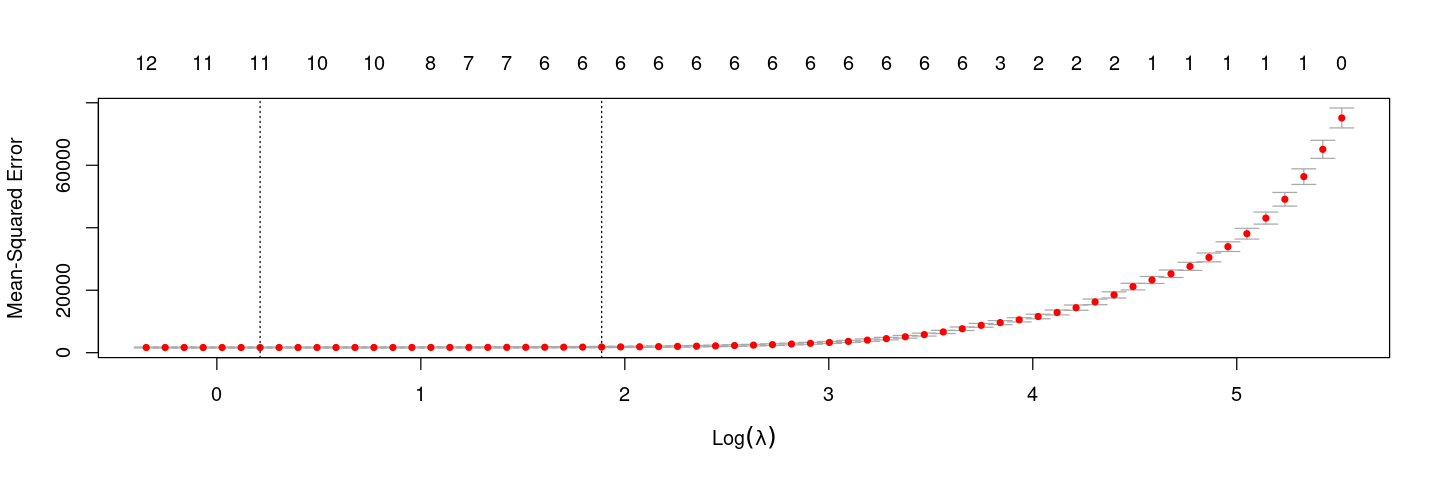

[1] "CV estimate of lambda : 6.596"

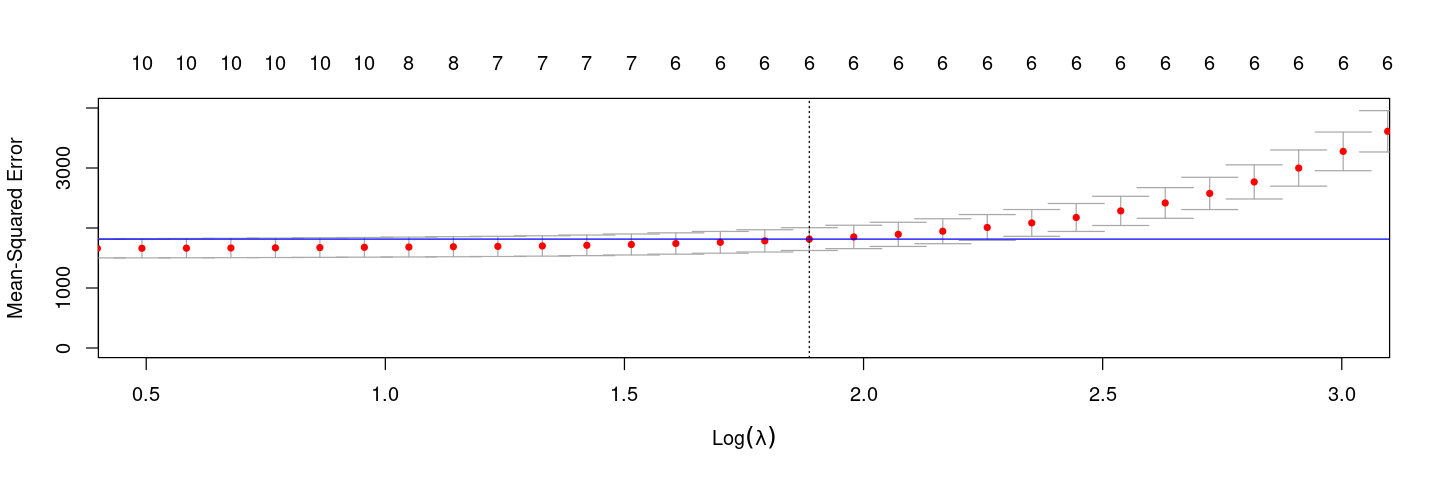

In [29]:

# avec toutes les variables, créer d'abord la matrice d'expériences 
# avec 'model.matrix' (penser à retirer l'intercept du modèle)
x.mat <- model.matrix(Calories_Burned ~ . - 1, data = datappr)

reg.lasso.cv <- cv.glmnet(y = datappr[, 8], x = x.mat)
plot(reg.lasso.cv)
plot(reg.lasso.cv,xlim=c(0.5,3),ylim=c(0,4000))
abline(h=reg.lasso.cv$cvm[c(reg.lasso.cv$index)[2]],col="blue")

paste("CV estimate of lambda :", round(reg.lasso.cv$lambda.1se, 3))

Comme expliqué précemment grâce à ce graphique on peut comparer l'évolution de l'erreur moyenne en fonction de l'évolution du log du paramètre de pénalisation. Ainsi, un lambda plus petit va créer un modle plus complexe mais plus fiable tandis qu'un lambda plus grand va simplifier le modèle mais augmenter l'erreur. Ici, afin de simplifier le modèle au maximum sans trop augmenter l'erreur nous allons choisir un log de lambda environ égal à 1.7, qui nous donne un modèle à 6 variables. Ainsi le log de lambda choisi a une erreur moyenne compris dans l'intervalle d'erreur minimal du modèle.

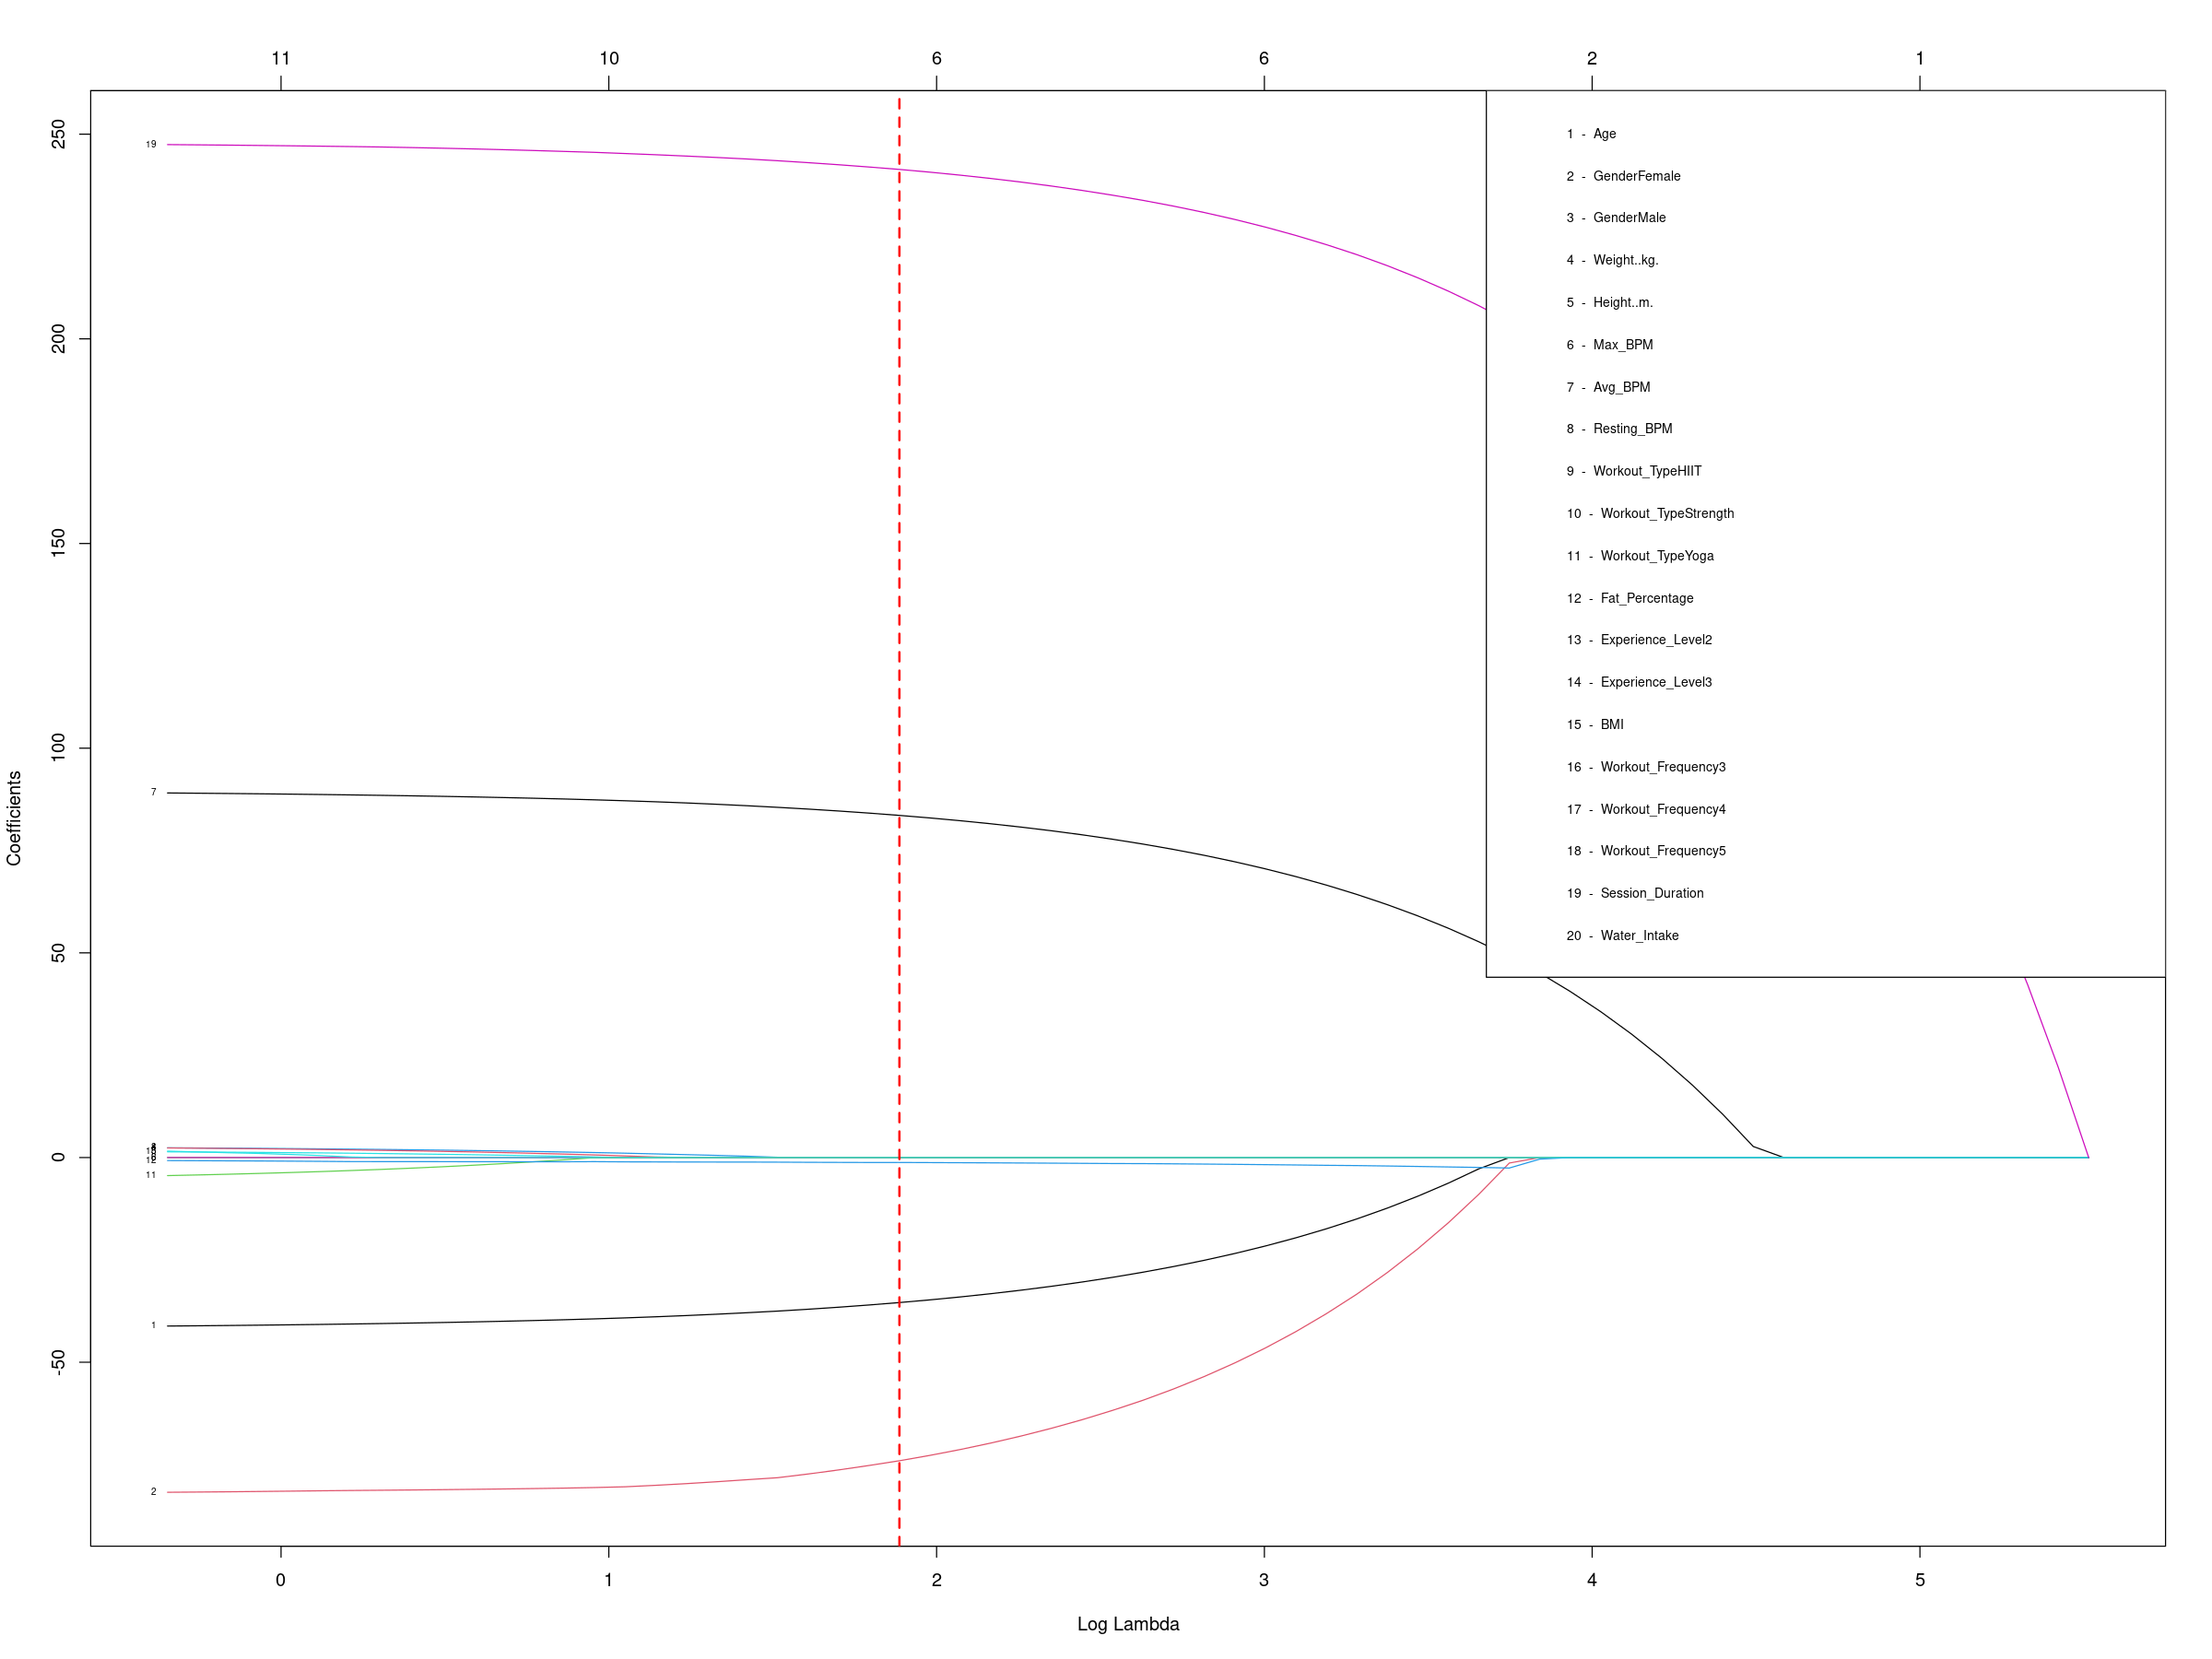

In [30]:

reg.lasso <- glmnet(y = datappr$Calories_Burned, x = x.mat)

options(repr.plot.width = 20, repr.plot.height = 15)

plot(reg.lasso, xvar = "lambda", label = TRUE)


abline(v = log(reg.lasso.cv$lambda.1se), col = "red", lty = 2, lwd = 2)

legend("topright", 
       legend = paste(1:ncol(x.mat), " - ", colnames(x.mat)), cex = 0.7)



Le graphique ci-dessus représente l'évolution des coefficients associés à chaque variable en fonction du log du paramètre de pénalisation $\lambda$. A l'aide de ce graphique, nous pouvons visualiser le svariables conservées par le lasso pour le lambda optimal (ligne rouge verticale).
Le lambda trouvé en R pourra être relativement différent de celui trouvé en python car on observe un "plateau" des coéfficient qui s'étale sur une grande plage de log(lambda). La sélection des variables ne sera donc pas affectée par cette différence. 

In [31]:
# modèle correspondant
coef(reg.lasso.cv, s = "lambda.1se")

21 x 1 sparse Matrix of class "dgCMatrix"
                                s1
(Intercept)           9.449802e+02
Age                  -3.542280e+01
GenderFemale         -7.406577e+01
GenderMale            1.278643e-11
Weight..kg.           .           
Height..m.            .           
Max_BPM               .           
Avg_BPM               8.358138e+01
Resting_BPM           .           
Workout_TypeHIIT      .           
Workout_TypeStrength  .           
Workout_TypeYoga      .           
Fat_Percentage       -1.203725e+00
Experience_Level2     .           
Experience_Level3     .           
BMI                   .           
Workout_Frequency3    .           
Workout_Frequency4    .           
Workout_Frequency5    .           
Session_Duration      2.413843e+02
Water_Intake          .           

D'après ce critère, les variables les plus intéressantes pour prédire les calories brulées sont: la durée de la session, le BPM moyen, le genre (pour éviter les redondances, la modalité principales gardée est le sexe féminin) et l'age. 

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


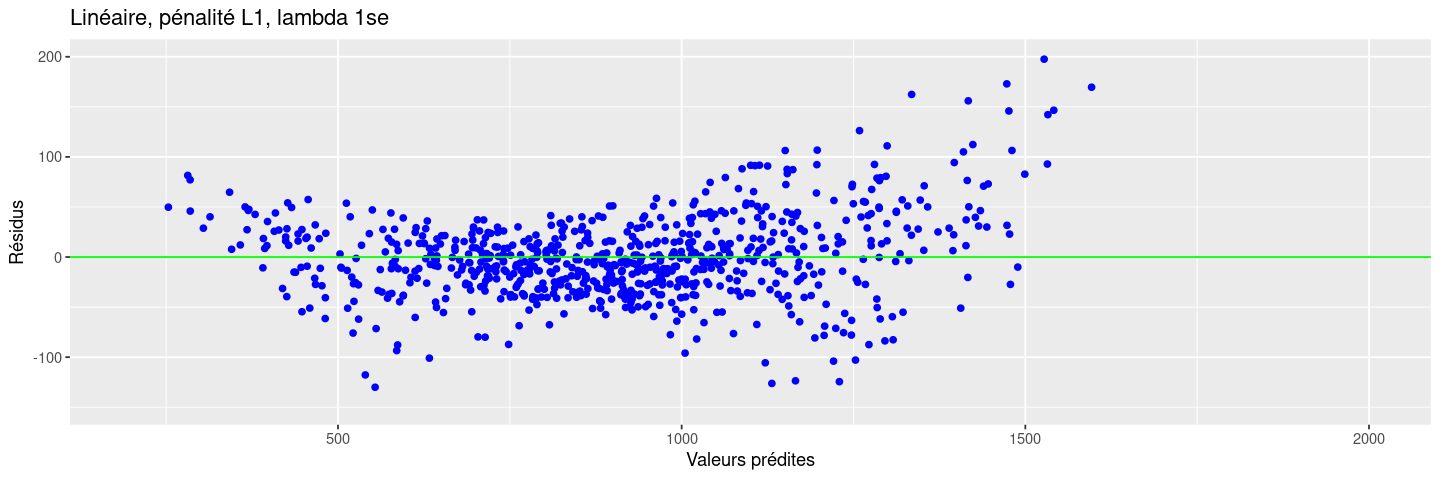

In [32]:
fit.lasso <- predict(reg.lasso.cv, s = "lambda.1se", newx = x.mat)
res.lasso <- datappr$Calories_Burned - fit.lasso 

# Graphe des résidus
options(repr.plot.width = 12, repr.plot.height = 4)
gplot.res(fit.lasso, res.lasso, "Linéaire, pénalité L1, lambda 1se") 

In [33]:
mse_lasso <- mean(res.lasso^2)
cat("LASSO avec lambda.1se - MSE :", round(mse_lasso, 2), "\n")


LASSO avec lambda.1se - MSE : 1788.99 


 BIZARRE QUE MSE SI DIFFÉRENTE AVEC PYTHON (DEMANDER MERCREDI)

##### **AIC**

In [34]:
# Estimation du modèle avec toutes les interactions d'ordre 2
reg.glm <- glm(Calories_Burned ~ . , data = datappr)
# Recherche du meilleur modèle au sens 
# du critère d'Akaïke par méthode descendante
reg.glm.aic <- step(reg.glm, direction = "backward")

y_pred <- predict(reg.glm.aic, newdata = datappr)
y_true <- datappr$Calories_Burned
res.aic <- y_true - y_pred

Start:  AIC=7978.3
Calories_Burned ~ Age + Gender + Weight..kg. + Height..m. + Max_BPM + 
    Avg_BPM + Resting_BPM + Workout_Type + Fat_Percentage + Experience_Level + 
    BMI + Workout_Frequency + Session_Duration + Water_Intake

                    Df Deviance     AIC
- Workout_Frequency  3  1229338  7974.0
- Workout_Type       3  1232565  7976.1
- Water_Intake       1  1226630  7976.3
- Max_BPM            1  1226900  7976.5
- Experience_Level   2  1231522  7977.4
- Fat_Percentage     1  1229290  7978.0
<none>                  1226597  7978.3
- Weight..kg.        1  1230436  7978.7
- BMI                1  1231660  7979.5
- Height..m.         1  1232970  7980.3
- Resting_BPM        1  1234421  7981.3
- Gender             1  1505702  8135.8
- Age                1  2560041  8548.7
- Avg_BPM            1  7311728  9365.2
- Session_Duration   1 19056374 10110.5

Step:  AIC=7974.04
Calories_Burned ~ Age + Gender + Weight..kg. + Height..m. + Max_BPM + 
    Avg_BPM + Resting_BPM + Workout_

##### **BIC**

In [35]:
n <- nrow(datappr)
reg.glm <- glm(Calories_Burned ~ . , data = datappr)

# Sélection descendante selon le BIC
reg.glm.bic <- step(reg.glm, direction = "backward", k = log(n))


y_pred <- predict(reg.glm.bic, newdata = datappr)
y_true <- datappr$Calories_Burned
res.bic <- y_true - y_pred

Start:  AIC=8071.44
Calories_Burned ~ Age + Gender + Weight..kg. + Height..m. + Max_BPM + 
    Avg_BPM + Resting_BPM + Workout_Type + Fat_Percentage + Experience_Level + 
    BMI + Workout_Frequency + Session_Duration + Water_Intake

                    Df Deviance     AIC
- Workout_Frequency  3  1229338  8053.2
- Workout_Type       3  1232565  8055.2
- Experience_Level   2  1231522  8061.2
- Water_Intake       1  1226630  8064.8
- Max_BPM            1  1226900  8065.0
- Fat_Percentage     1  1229290  8066.5
- Weight..kg.        1  1230436  8067.2
- BMI                1  1231660  8068.0
- Height..m.         1  1232970  8068.8
- Resting_BPM        1  1234421  8069.7
<none>                  1226597  8071.4
- Gender             1  1505702  8224.3
- Age                1  2560041  8637.2
- Avg_BPM            1  7311728  9453.7
- Session_Duration   1 19056374 10199.0

Step:  AIC=8053.2
Calories_Burned ~ Age + Gender + Weight..kg. + Height..m. + Max_BPM + 
    Avg_BPM + Resting_BPM + Workout_

#### Comparaison des modèles

         Modèle Q2_Ajusté      Q2      MSE
1 Régression LM   0.99822 0.99840 1576.603
2           AIC   0.99836 0.99843 1592.910
3           BIC   0.99838 0.99841 1615.410
4         Lasso   0.99827 0.99833 1788.988
5         Ridge   0.99821 0.99840 1642.801


## Performance d'un SVM 

Nous allons à présent utiliser un algorithme d’apprentissage supervisé appelé SVM (Support Vector Machine) pour analyser les calories brûlées en fonction des autres variables, ainsi que les prédire. Le SVM est un algorithme de classification qui cherche à trouver l’hyperplan optimal séparant les différentes classes de données avec la marge la plus grande possible.

Nos données étant déjà normalisées, nous allons les séparer en quatres variables différentes x_train, y_train, x_test et y_test, afin d'y appliquer l'algorithme svm pour différents kernels puis évaluer nos résultats, afin de voir à quel moment nos prédictions sont le plus optimisées. Nous sommes ici dans le cas d'un problème de régression (même si ces méthodes sont initialement prévues pour des variables binaires), nous cherchons donc à optimiser au mieux notre coefficient de pénalisation.


Call:
svm(formula = Calories_Burned ~ ., data = datappr)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.05 
    epsilon:  0.1 


Number of Support Vectors:  335






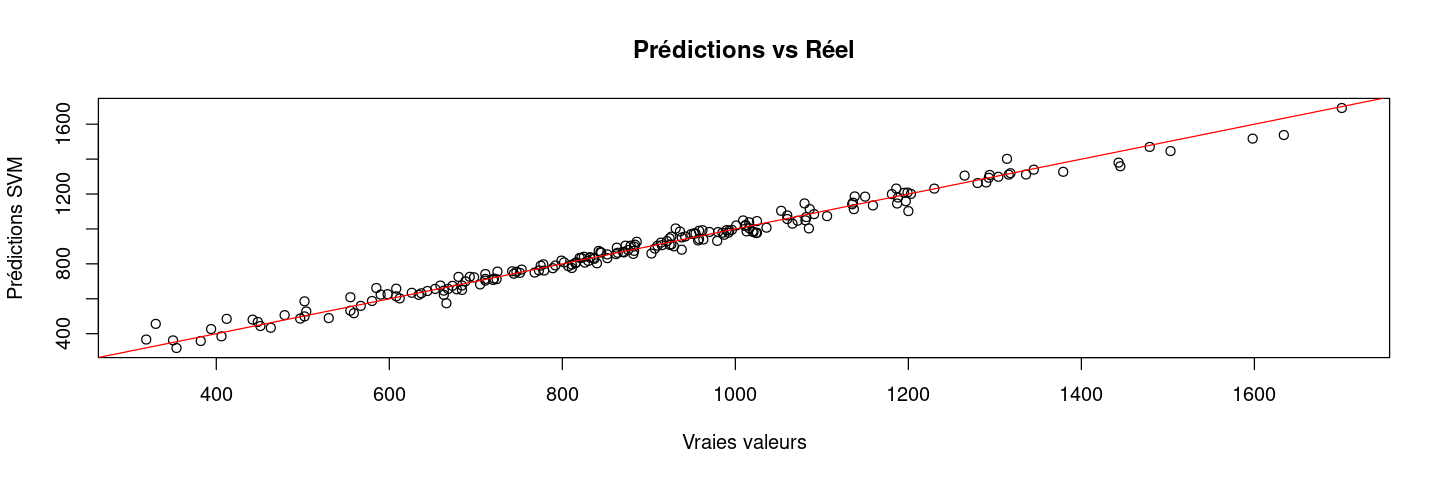

In [38]:
#install.packages("e1071")
library(e1071)
svm.reg0 = svm(Calories_Burned~., data = datappr)
summary(svm.reg0)

pred <- predict(svm.reg0, newdata = datestr)
plot(datestr$Calories_Burned, pred,
     xlab = "Vraies valeurs",
     ylab = "Prédictions SVM",
     main = "Prédictions vs Réel")
abline(0, 1, col = "red")  # ligne y=x
plot(svm.reg0, data = datappr)

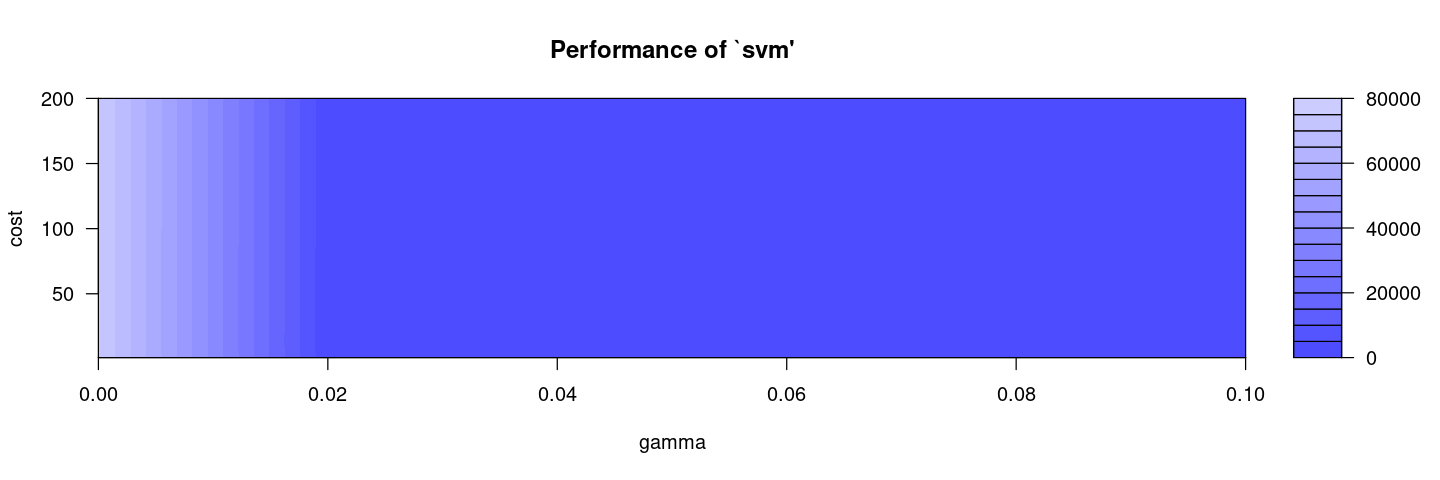

In [39]:
#set.seed(2021)
svm.reg.tune = tune.svm(Calories_Burned ~ ., data = datappr, type = "eps-regression", cost = c(1, 10, 50, 100, 150, 200), gamma = seq(0, 0.1, by = 0.02))
#traceback()
plot(svm.reg.tune)

Le plot que nous rend svm.reg.tune nous montre graphiquement pour quelles valeurs de cost et gamma on obtient les meilleurs résultats. On peut également directement récuperer ces valeurs grâce à l'option "$parameters" de svm.reg.tune, ce que nous allons faire dans la suite. 


Call:
svm(formula = Calories_Burned ~ ., data = datappr, cost = svm.reg.tune$best.parameters$cost, 
    gamma = svm.reg.tune$best.parameters$gamma)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  10 
      gamma:  0.02 
    epsilon:  0.1 


Number of Support Vectors:  270






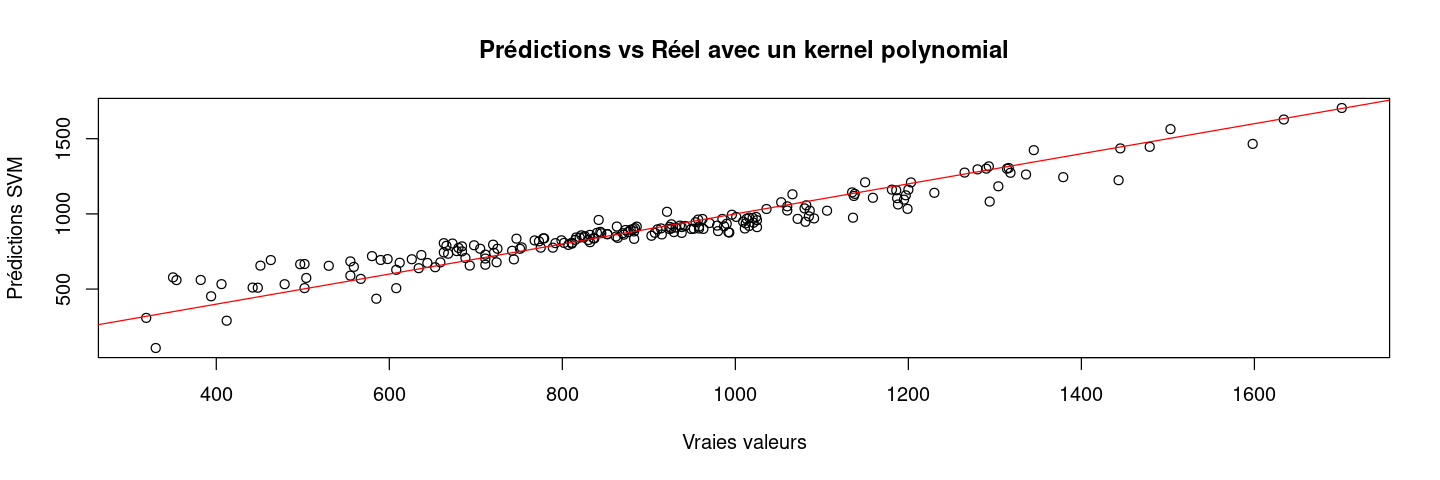

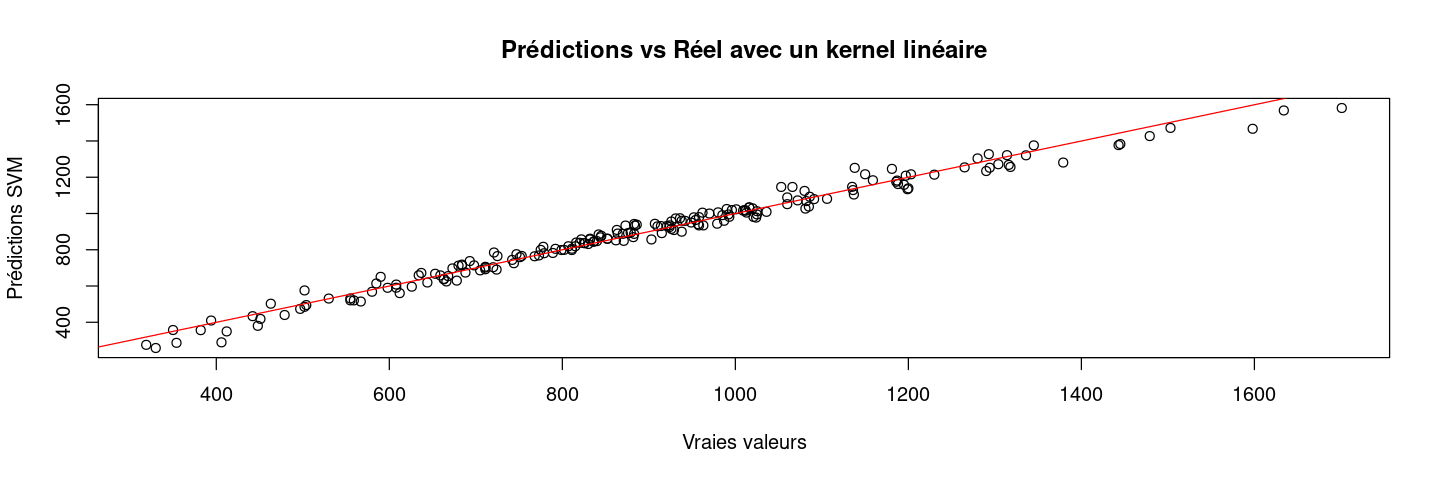

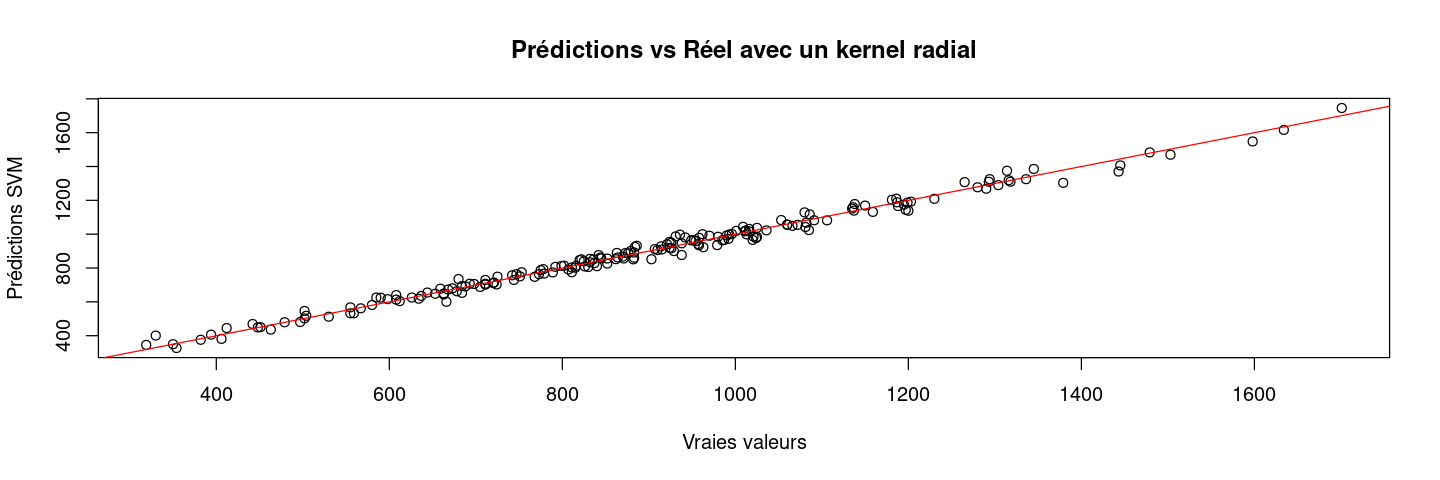

In [40]:
svm.reg = svm(Calories_Burned ~ ., data = datappr, cost = svm.reg.tune$best.parameters$cost, 
    gamma = svm.reg.tune$best.parameters$gamma)
summary(svm.reg)

# On récupère les meilleurs paramètres
best_cost <- svm.reg.tune$best.parameters$cost
best_gamma <- svm.reg.tune$best.parameters$gamma
# Entraînement du modèle final avec ces paramètres
final_model <- svm(
  Calories_Burned ~ ., 
  data = datappr,
  type = "eps-regression",
  kernel = "polynomial",     
  cost = best_cost,
  gamma = best_gamma
)

final_model2 <- svm(
  Calories_Burned ~ ., 
  data = datappr,
  type = "eps-regression",
  kernel = "linear",     
  cost = best_cost,
  gamma = best_gamma
)

final_model3 <- svm(
  Calories_Burned ~ ., 
  data = datappr,
  type = "eps-regression",
  kernel = "radial",     
  cost = best_cost,
  gamma = best_gamma
)

#svm.reg.tune = tune.svm(Calories_Burned~., data = datappr, kernel = c("linear","polynomial", "radial"), cost=svm.reg.tune$best.parameters$cost, gamma = svm.reg.tune$best.parameters$gamma)
#best_ker <- svm.reg.tune$best.parameters$kernel
# Prédiction sur le jeu de test
y_pred <- predict(final_model, newdata = datestr)
y_pred2 <- predict(final_model2, newdata = datestr)
y_pred3 <- predict(final_model3, newdata = datestr)
plot(datestr$Calories_Burned, y_pred,
     xlab = "Vraies valeurs",
     ylab = "Prédictions SVM",
     main = "Prédictions vs Réel avec un kernel polynomial")
abline(0, 1, col = "red")
plot(datestr$Calories_Burned, y_pred2,
     xlab = "Vraies valeurs",
     ylab = "Prédictions SVM",
     main = "Prédictions vs Réel avec un kernel linéaire")
abline(0, 1, col = "red")
plot(datestr$Calories_Burned, y_pred3,
     xlab = "Vraies valeurs",
     ylab = "Prédictions SVM",
     main = "Prédictions vs Réel avec un kernel radial")
abline(0, 1, col = "red")

#rmse_val <- rmse(datestr$Calories_Burned, y_pred)
#cat("RMSE sur test final :", rmse_val, "\n")

On remarque ici que les meilleurs résultats obtenus sont pour un kernel radial. On sélectionne ainsi le modèle avec les paramètres optimisés : n 
 SVM-Kernel:  radial 
       cost:  3.5 
      gamma:  0.02 
    epsilon:  0.1 


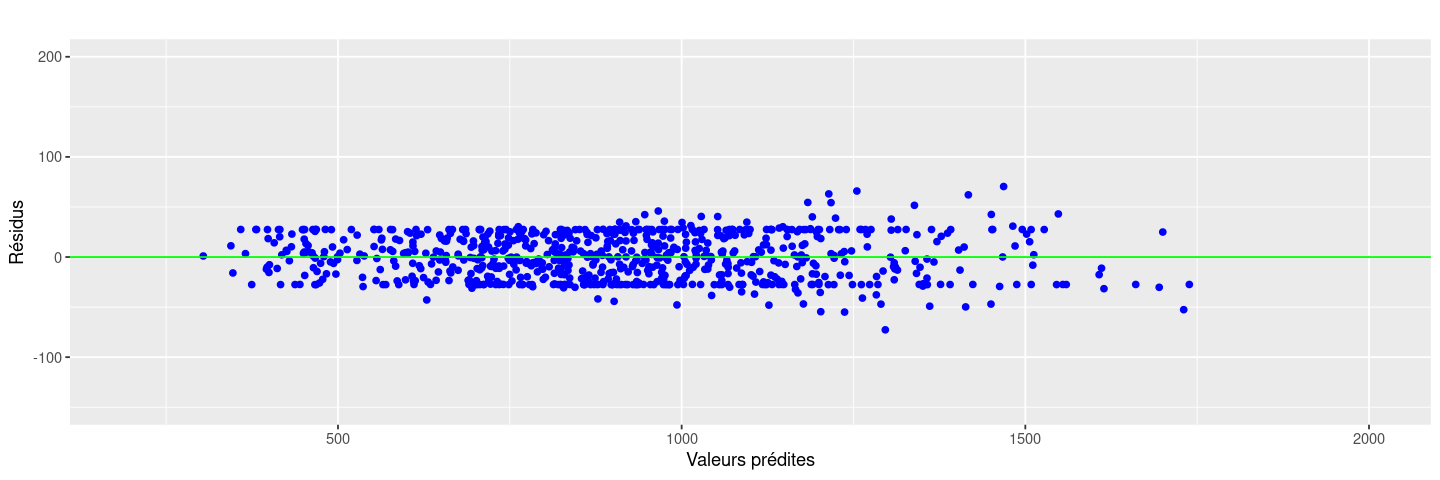

In [41]:
#calcul puis graphe des résidus
fit.svmr=fit.svmr=svm.reg$fitted
res.svmr=fit.svmr-datappr[,"Calories_Burned"]
gplot.res(fit.svmr,res.svmr,titre="")

On observe bien ici un "effet couloir" sur les résidus de notre modèle SVM, ce qui signifie que les valeurs restent plus ou moins bien (à quelques valeurs près sur les bords) dans le couloir imposé par $\epsilon$.

In [42]:
cv_radial <- svm(Calories_Burned ~ ., data = datappr,
                 type = "eps-regression", kernel = "radial",
                 cost = best_cost, gamma = best_gamma, cross = 10)

cv_linear <- svm(Calories_Burned ~ ., data = datappr,
                 type = "eps-regression", kernel = "linear",
                 cost = best_cost, gamma = best_gamma, cross = 10)

cv_poly <- svm(Calories_Burned ~ ., data = datappr,
               type = "eps-regression", kernel = "polynomial",
               cost = best_cost, gamma = best_gamma, cross = 10)

# Voir les performances
summary(cv_radial)
summary(cv_linear)
summary(cv_poly)

Warning message in cret$cresults * scale.factor:
“Le recyclage d’un tableau (array) de longueur 1 dans un calcul arithmétique vecteur-tableau est obsolète.
  Utilisez c() ou as.vector() à la place.”
Warning message in cret$cresults * scale.factor:
“Le recyclage d’un tableau (array) de longueur 1 dans un calcul arithmétique vecteur-tableau est obsolète.
  Utilisez c() ou as.vector() à la place.”
Warning message in cret$cresults * scale.factor:
“Le recyclage d’un tableau (array) de longueur 1 dans un calcul arithmétique vecteur-tableau est obsolète.
  Utilisez c() ou as.vector() à la place.”



Call:
svm(formula = Calories_Burned ~ ., data = datappr, type = "eps-regression", 
    kernel = "radial", cost = best_cost, gamma = best_gamma, cross = 10)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  10 
      gamma:  0.02 
    epsilon:  0.1 


Number of Support Vectors:  270



10-fold cross-validation on training data:

Total Mean Squared Error: 929.1525 
Squared Correlation Coefficient: 0.9877129 
Mean Squared Errors:
 944.5171 791.311 628.1257 1145.368 929.8956 955.5594 929.0771 979.1218 999.8039 989.2811 





Call:
svm(formula = Calories_Burned ~ ., data = datappr, type = "eps-regression", 
    kernel = "linear", cost = best_cost, gamma = best_gamma, cross = 10)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  linear 
       cost:  10 
      gamma:  0.02 
    epsilon:  0.1 


Number of Support Vectors:  362



10-fold cross-validation on training data:

Total Mean Squared Error: 1680.304 
Squared Correlation Coefficient: 0.9777668 
Mean Squared Errors:
 1283.023 1705.686 1520.646 1799.505 1393.476 2047.977 1992.428 1998.937 1356.297 1704.692 





Call:
svm(formula = Calories_Burned ~ ., data = datappr, type = "eps-regression", 
    kernel = "polynomial", cost = best_cost, gamma = best_gamma, 
    cross = 10)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  polynomial 
       cost:  10 
     degree:  3 
      gamma:  0.02 
     coef.0:  0 
    epsilon:  0.1 


Number of Support Vectors:  524



10-fold cross-validation on training data:

Total Mean Squared Error: 6698.671 
Squared Correlation Coefficient: 0.916809 
Mean Squared Errors:
 6586.752 6950.445 5060.454 7412.418 6086.738 7109.458 6246.146 7122.211 8210.233 6205.683 




On valide notre modèle par validation croisée, avec k=10. On obtient que le kernel radial a une bien meilleure performance avec une erreur quadratique moyenne totale de 914,51 (soit un équivalent calorique d'environ 6 cacahuètes, ce qui est une erreur raisonnable). En revanche, le kernel polynomial a une erreur quadratique moyenne totale de 12 844 (soit 113 cacahuètes!). Cela vient confirmer le fait que notre meilleur modèle découle d'un kernel radial. 

## Arbre optimal

### Arbre de régression

In [43]:
tree.reg=rpart(Calories_Burned~.,data=datappr,control=rpart.control(cp=0.001))

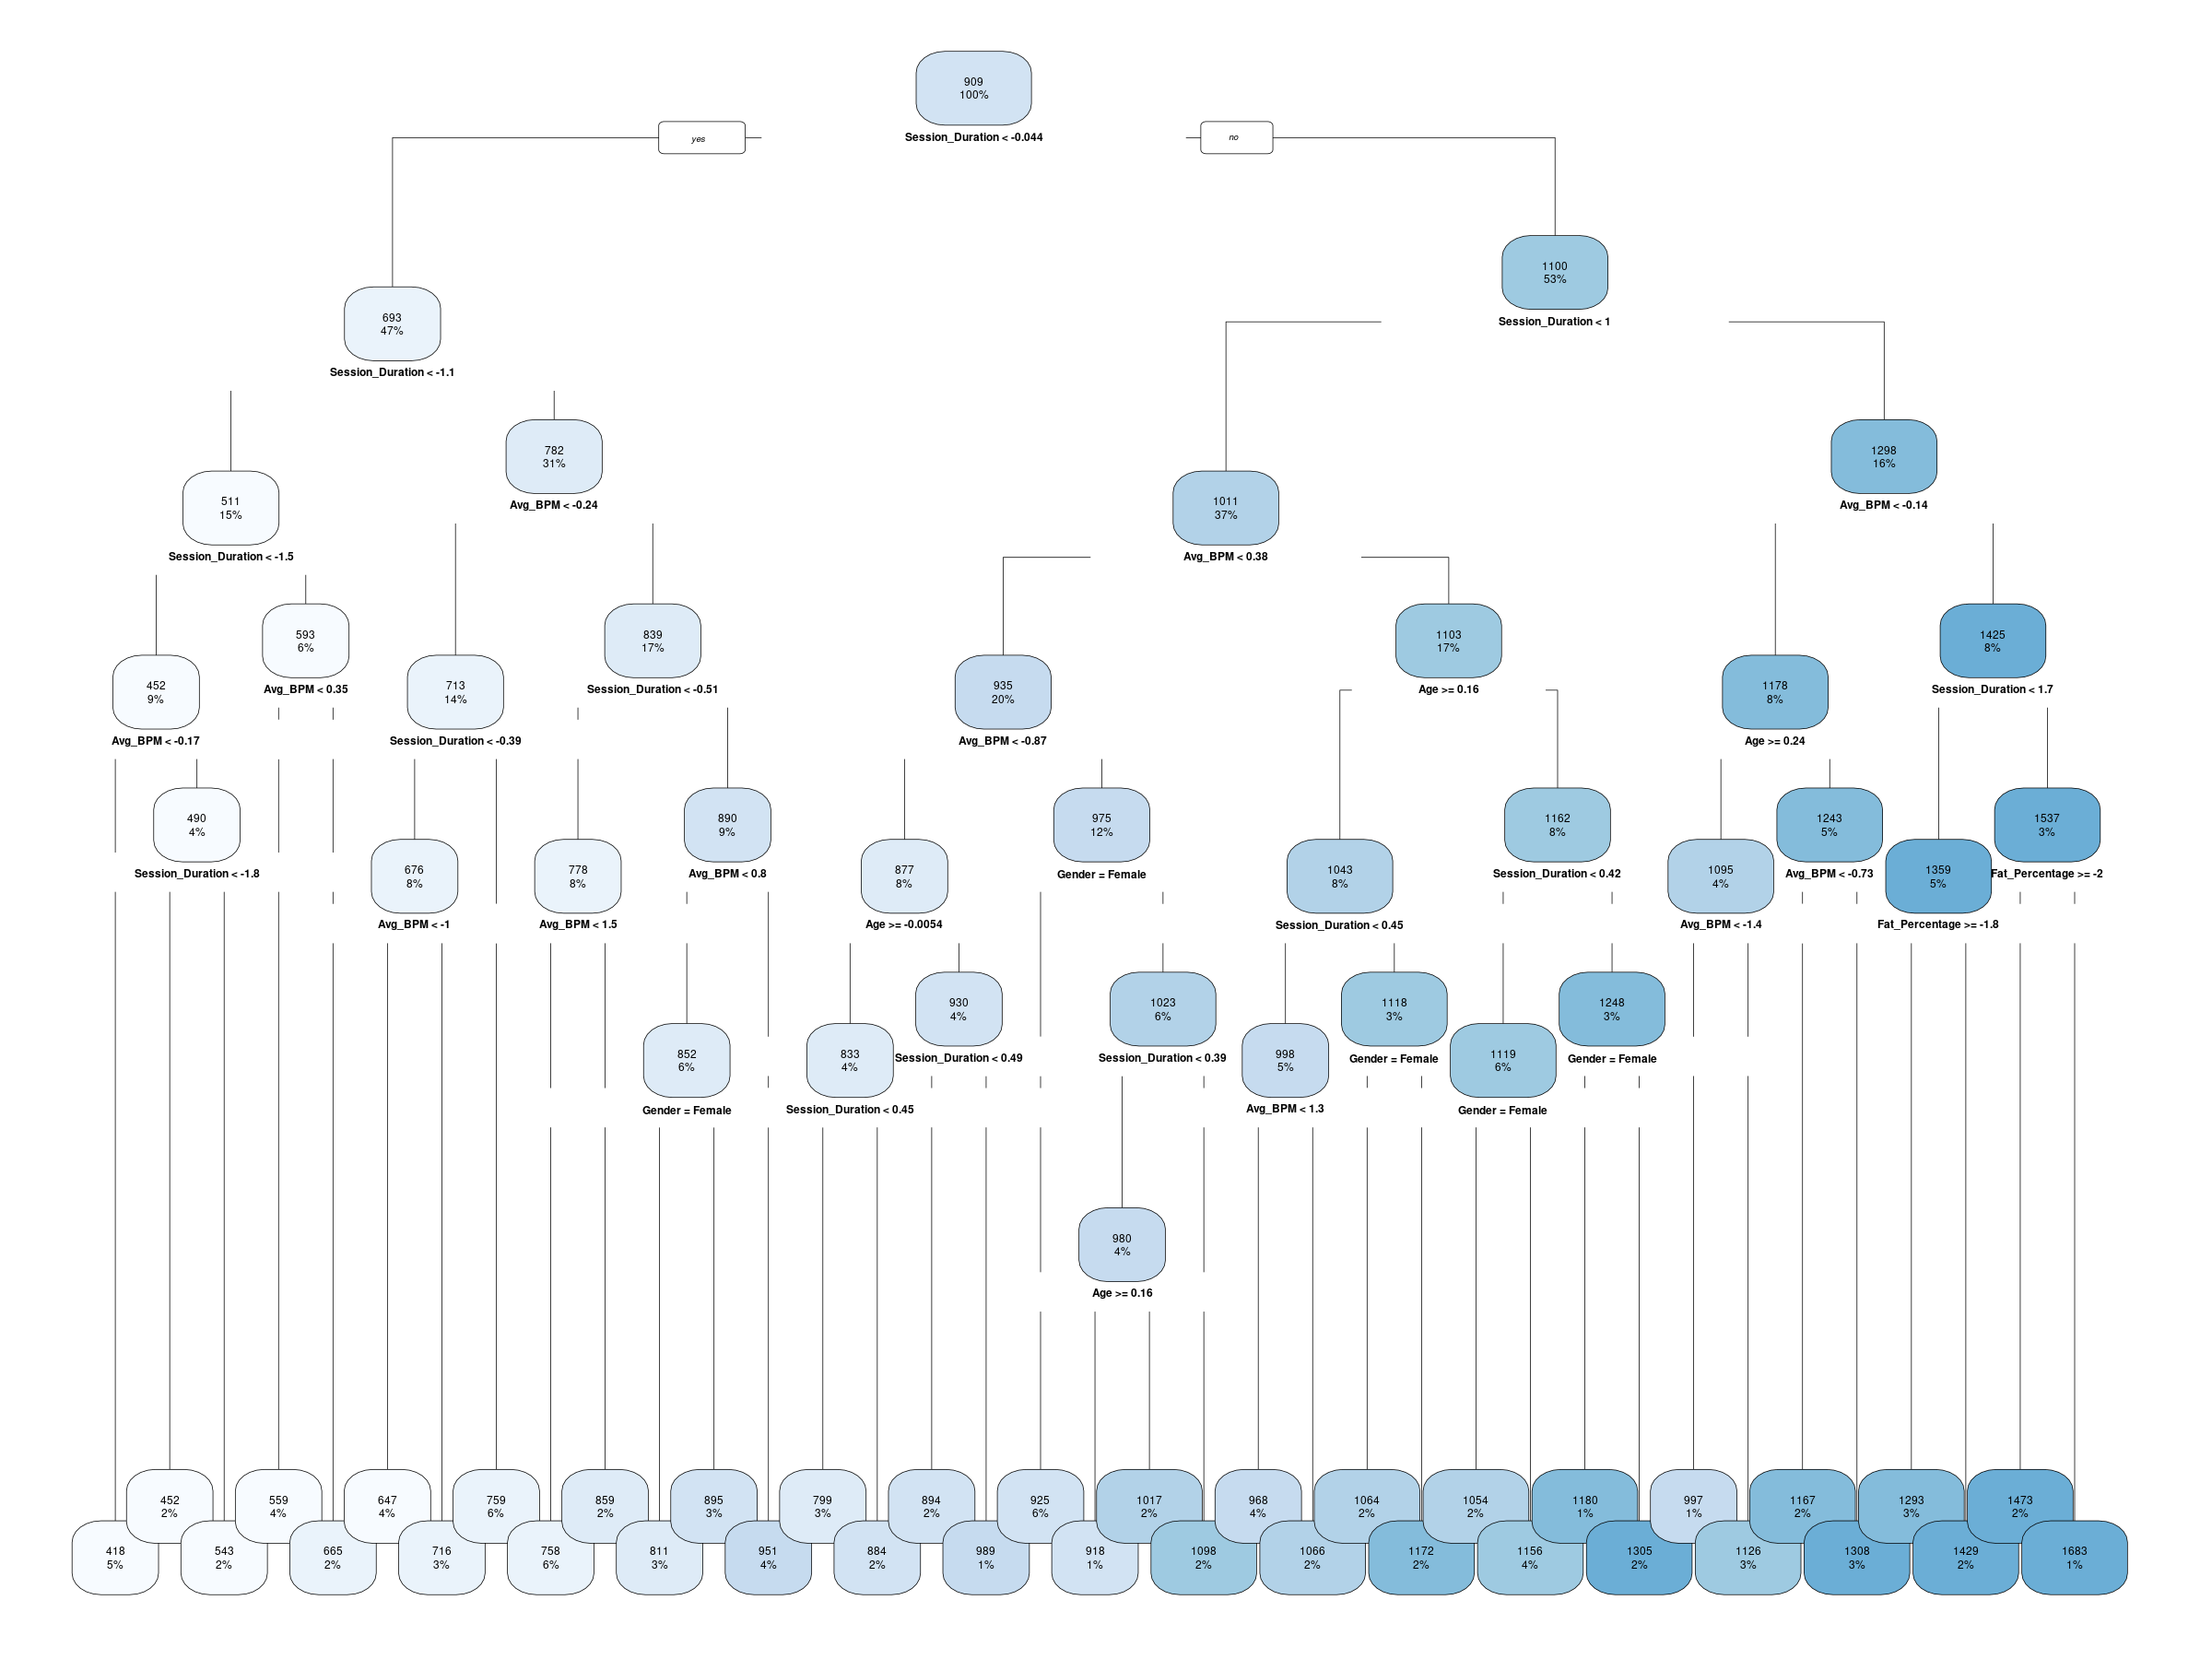

In [44]:
options(repr.plot.width = 20, repr.plot.height = 15)
rpart.plot(tree.reg, cex = 0.6)

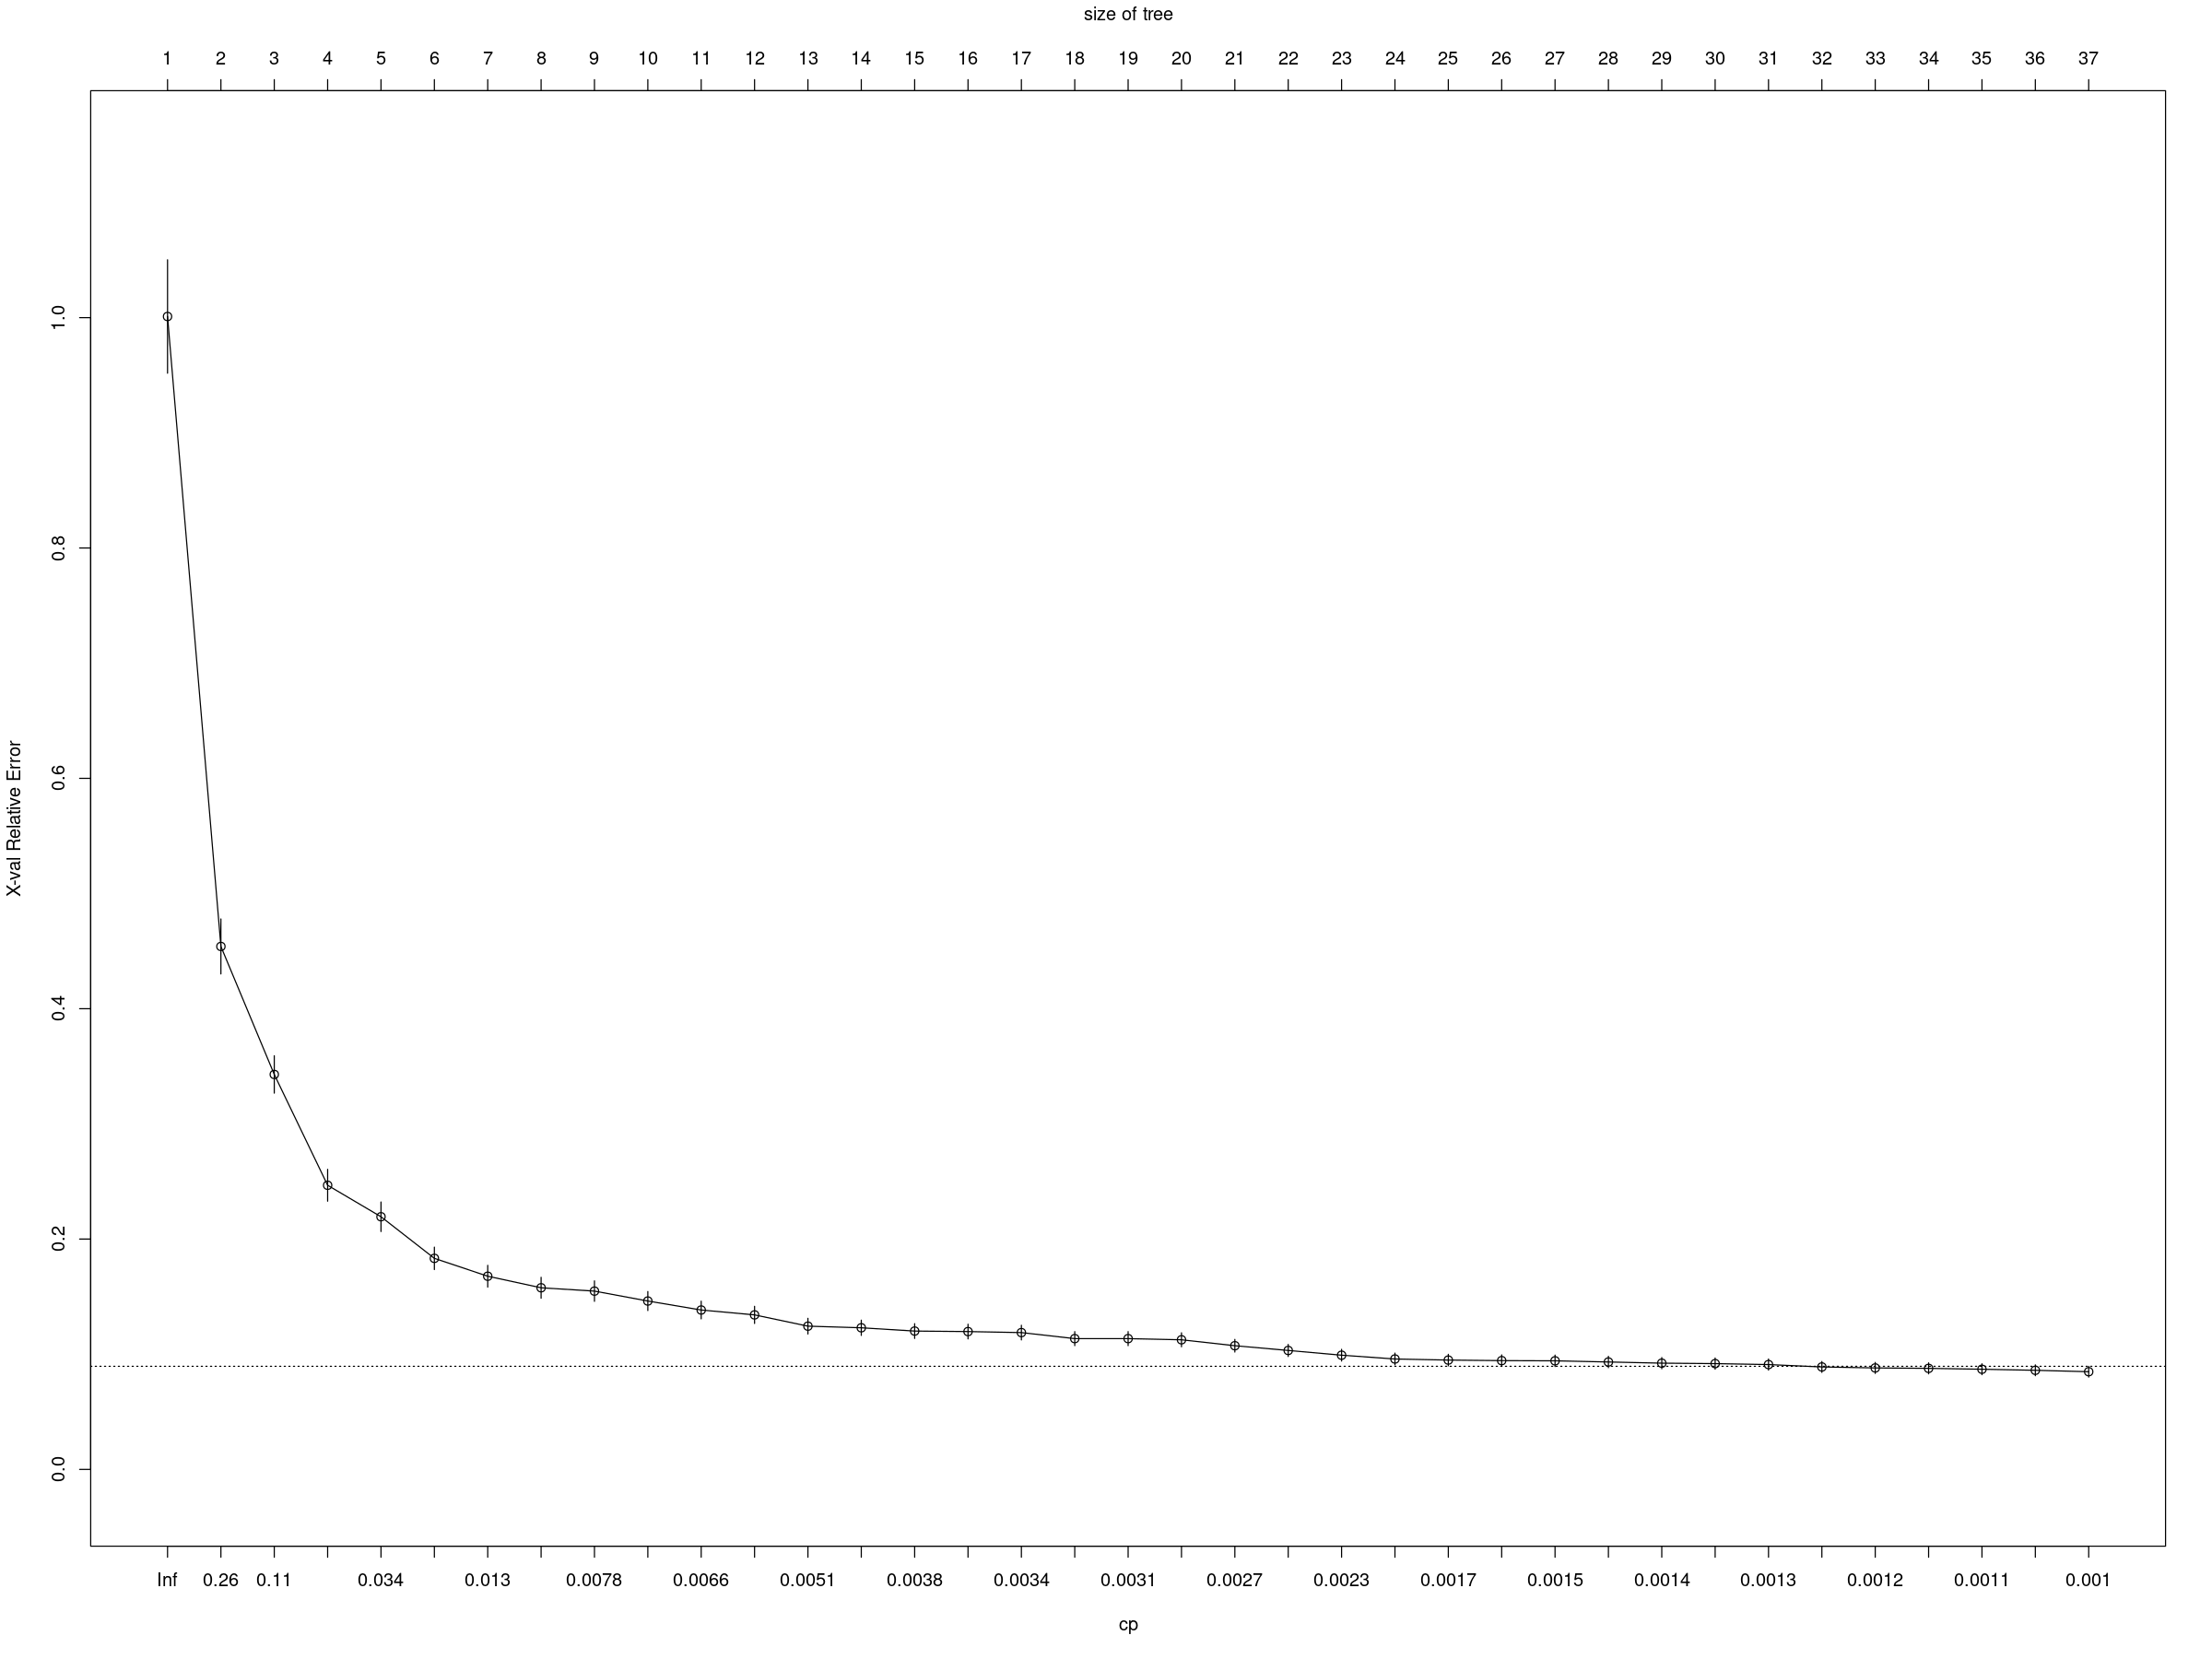

In [45]:
xmat<-xpred.rpart(tree.reg,xval=5)

CVerr<-apply((xmat-datappr[,"Calories_Burned"])^2,2,sum)

plotcp(tree.reg)

En fait on sait pas à quel point on doit simplifier, si on ne simplifie pas la MSE est la meilleure mais on doit quand même élaguer donc j'ai essayé de combiner les deux mais en gros je sais pas trop dans quel sens on est sensé optimiser.

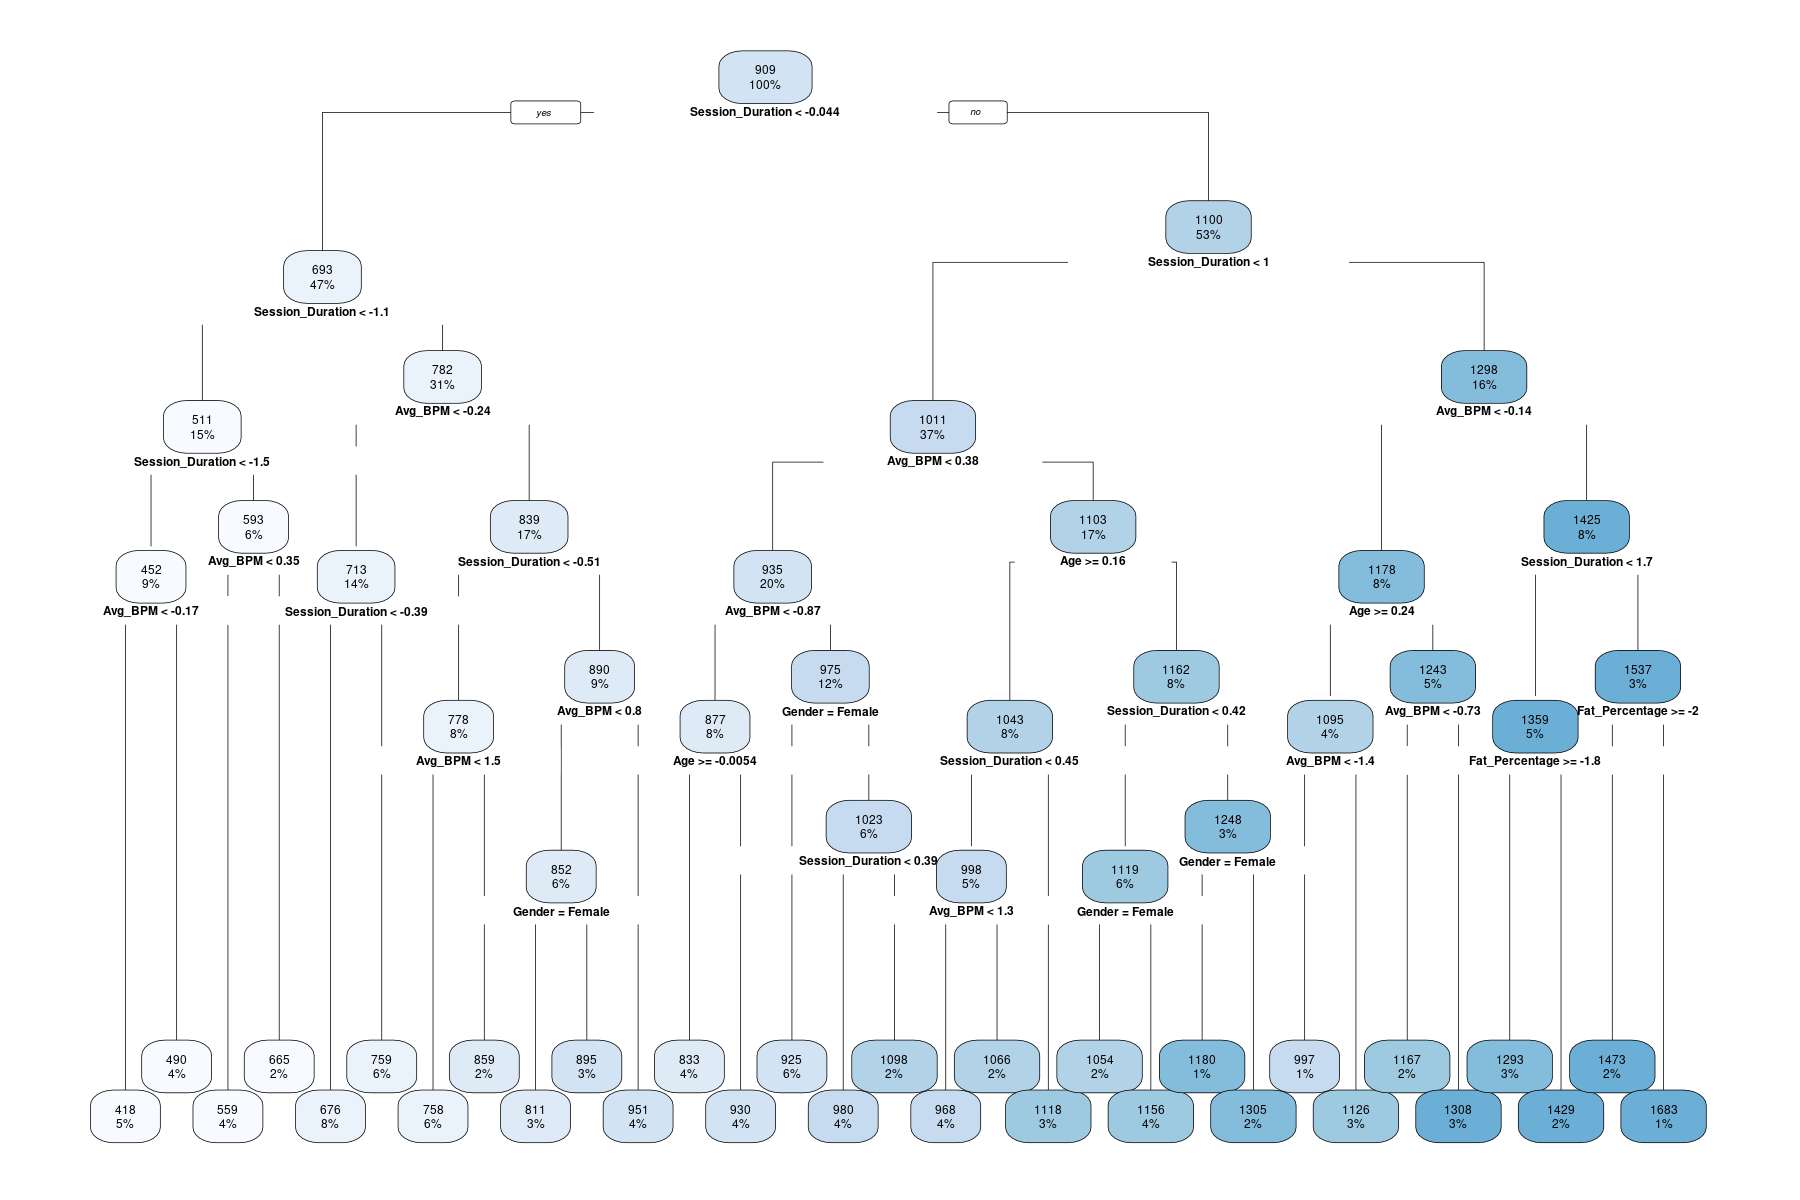

In [129]:
tree.reg=rpart(Calories_Burned~.,data=datappr,control=rpart.control(cp=0.0013))
rpart.plot(tree.reg, cex=0.6)

### Prévision de l'échantillon test

In [47]:
library(yardstick)
library(dplyr)
library(tibble)


Attachement du package : ‘yardstick’


Les objets suivants sont masqués depuis ‘package:Metrics’:

    accuracy, mae, mape, mase, precision, recall, rmse, smape


L'objet suivant est masqué depuis ‘package:readr’:

    spec




In [130]:
pred.treer=predict(tree.reg,newdata=datestr)

results <- tibble(
  truth = datestr[["Calories_Burned"]],
  prediction = pred.treer
)

mse <- results %>%
  summarise(mse = mean((prediction - truth)^2)) %>%
  pull(mse)

conf_matrix <- results %>%
  mutate(
    truth_class = factor(truth > 890, levels = c(FALSE, TRUE)),
    pred_class  = factor(prediction > 890, levels = c(FALSE, TRUE))
  ) %>%
  conf_mat(truth = truth_class, estimate = pred_class)

print(mse)
print(conf_matrix)

[1] 5929.259
          Truth
Prediction FALSE TRUE
     FALSE    83    4
     TRUE     19   89


Warning message:
“Removed 9 rows containing missing values (`geom_point()`).”


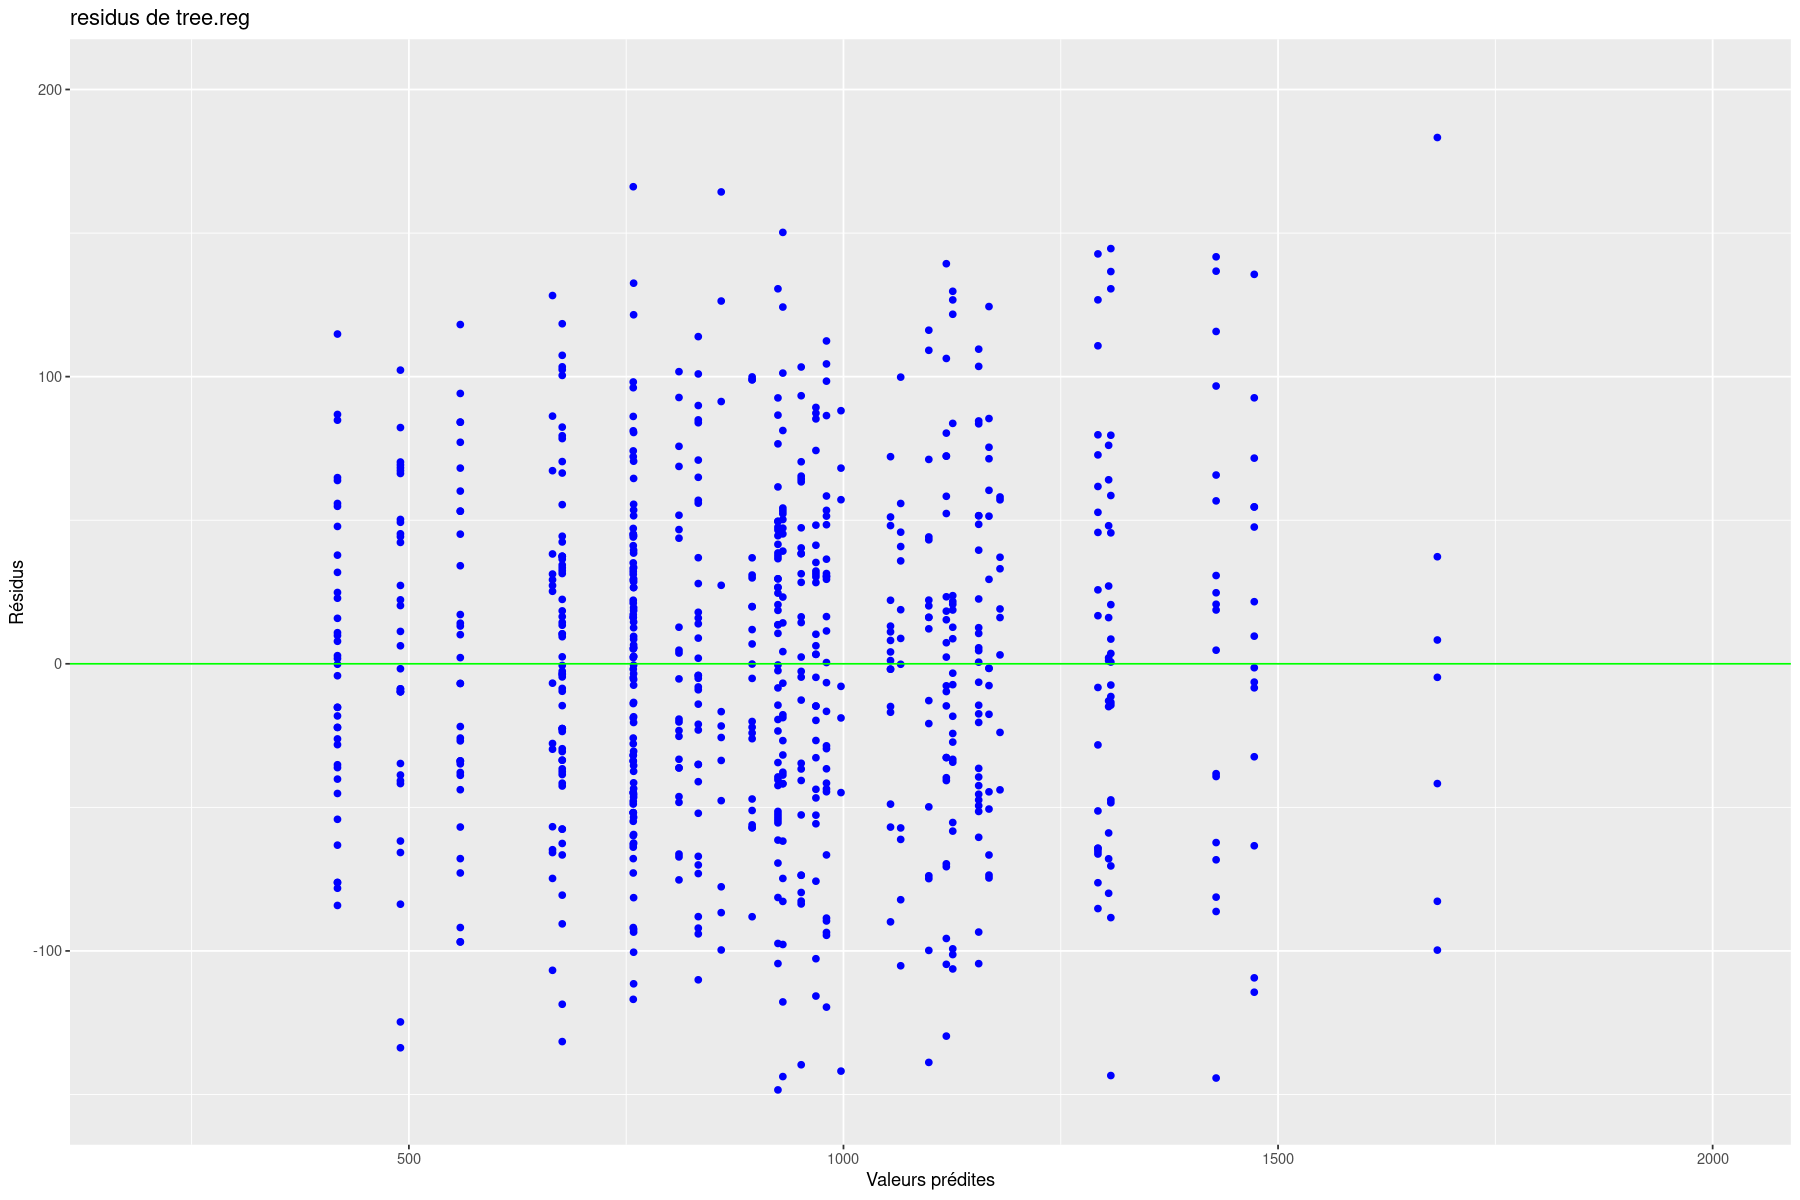

In [131]:
fit.tree=predict(tree.reg)
res.tree=fit.tree-datappr[,"Calories_Burned"]
gplot.res(fit.tree,res.tree,"residus de tree.reg")

## Forêt aléatoire

### Régression

In [50]:
library(randomForest)
library(e1071)

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attachement du package : ‘randomForest’


L'objet suivant est masqué depuis ‘package:gridExtra’:

    combine


L'objet suivant est masqué depuis ‘package:dplyr’:

    combine


L'objet suivant est masqué depuis ‘package:ggplot2’:

    margin




In [137]:
rf.reg=randomForest(Calories_Burned~., data=datappr,xtest=datestr[,-8],ytest=datestr[,"Calories_Burned"],
   ntree=500,do.trace=50,importance=TRUE)

     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 |     4638     6.16 |     3167     4.53 |
 100 |     4262     5.66 |     3192     4.57 |
 150 |     4122     5.48 |     3160     4.52 |
 200 |     4116     5.47 |     3145     4.50 |
 250 |     4091     5.43 |     3155     4.52 |
 300 |     4022     5.34 |     3106     4.45 |
 350 |     4041     5.37 |     3129     4.48 |
 400 |     4030     5.35 |     3150     4.51 |
 450 |     4028     5.35 |     3134     4.49 |
 500 |     4009     5.33 |     3121     4.47 |



Parameter tuning of ‘randomForest’:

- sampling method: 10-fold cross validation 

- best parameters:
 mtry
   12

- best performance: 1988.462 



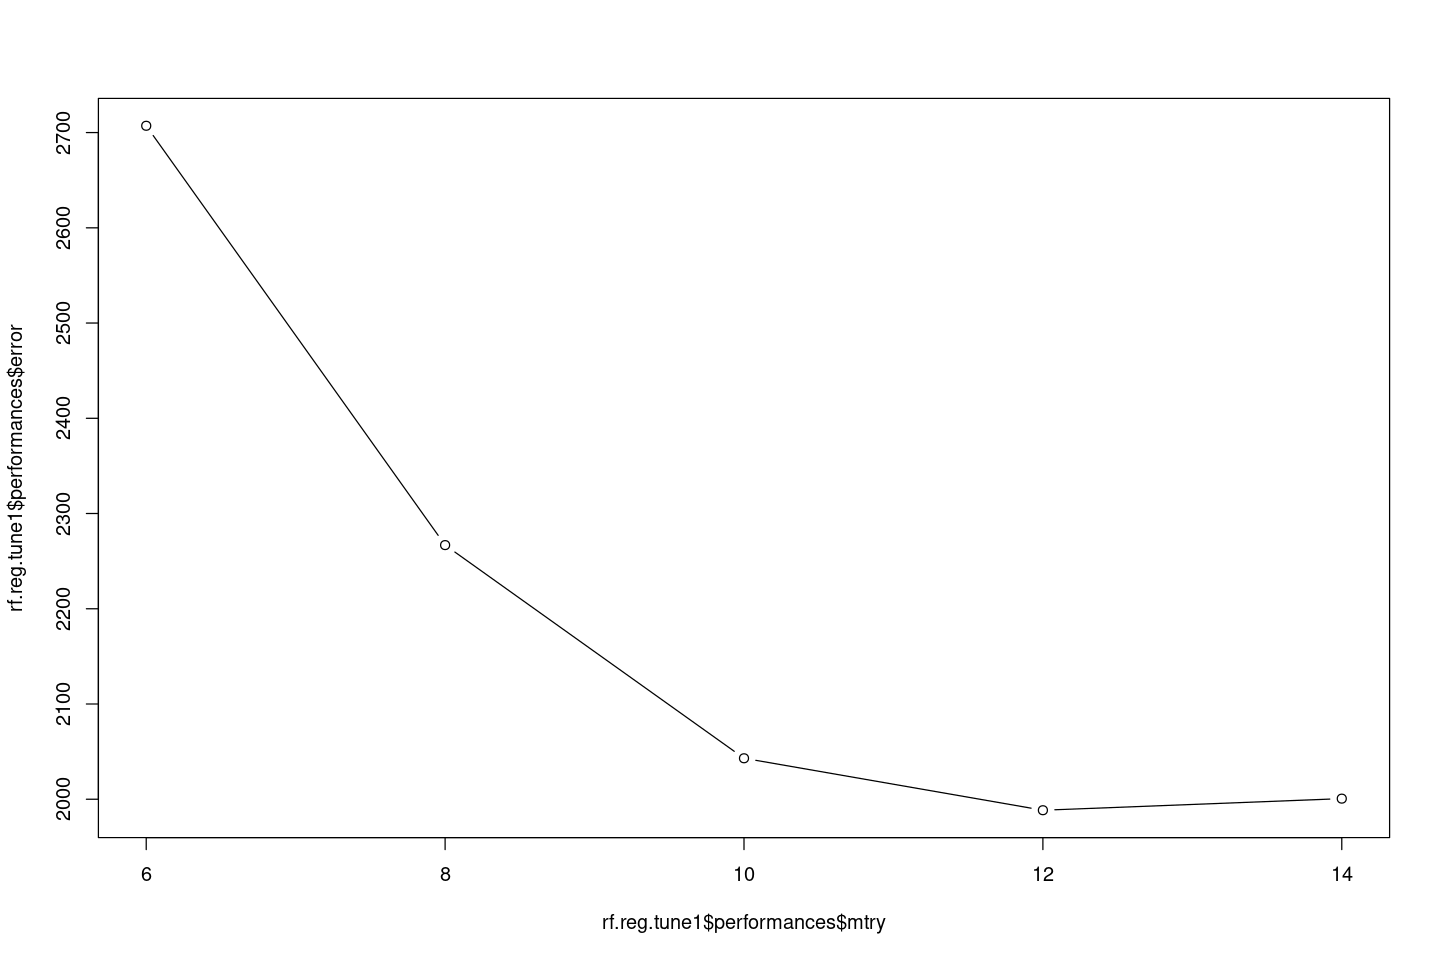

In [138]:
options(repr.plot.width = 12, repr.plot.height = 8)
rf.reg.tune1=tune.randomForest(Calories_Burned~., 
                              data = datappr,ntrees = 200, mtry = c(6,8,10,12,14),
                              maxit =200, linout = TRUE) 
print(rf.reg.tune1) 
plot(rf.reg.tune1$performances$mtry, rf.reg.tune1$performances$error, type = 'b')


Parameter tuning of ‘randomForest’:

- sampling method: 10-fold cross validation 

- best parameters:
 mtry
   12

- best performance: 1968.019 



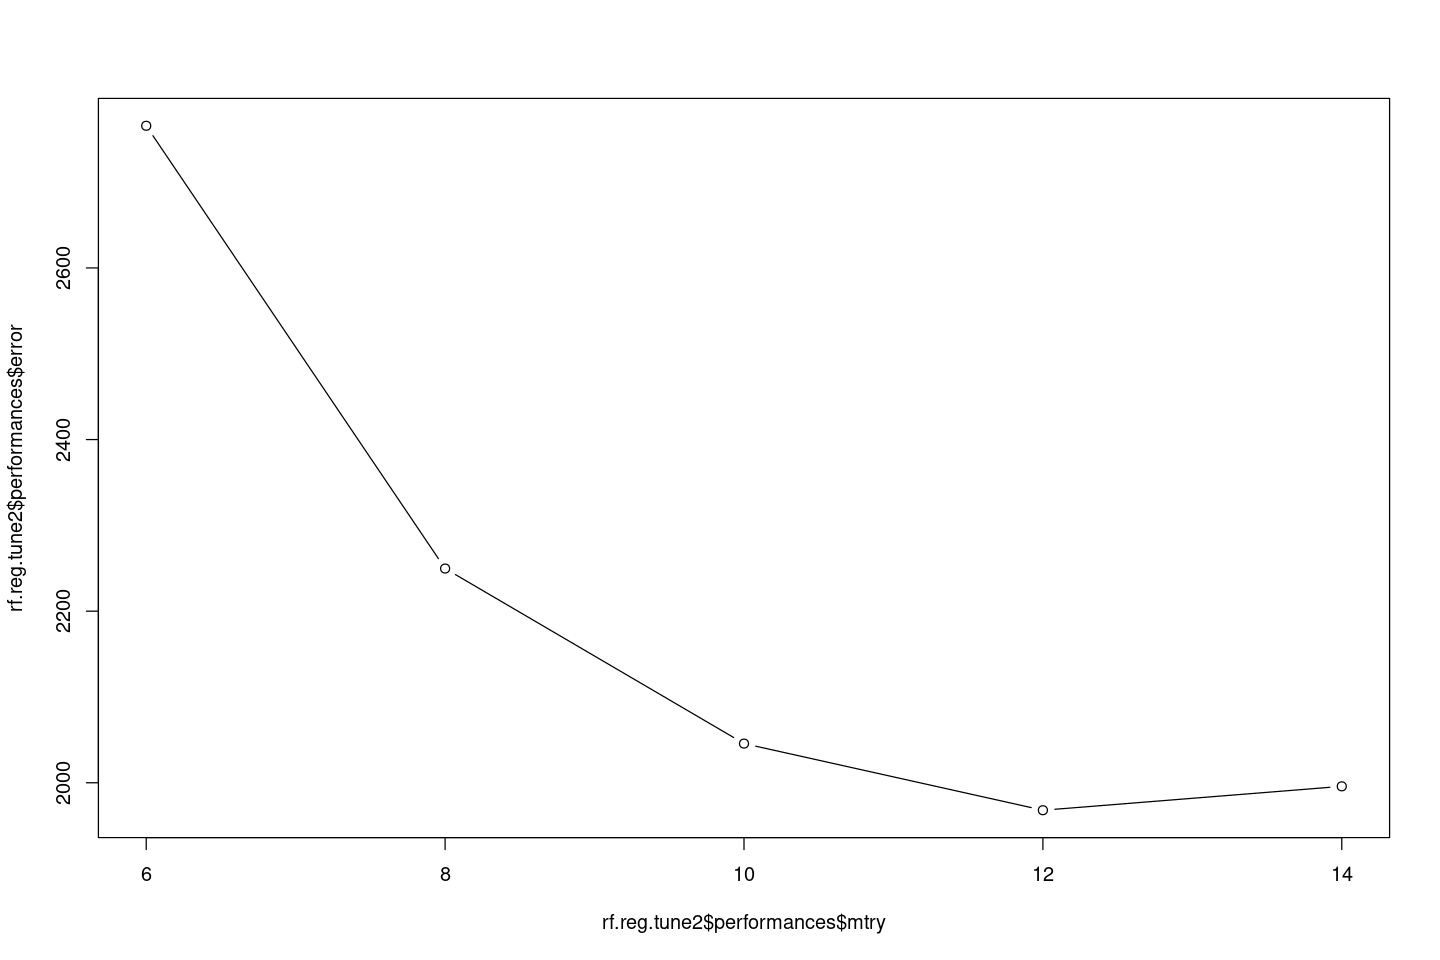

In [139]:
rf.reg.tune2=tune.randomForest(Calories_Burned~., 
                              data = datappr,ntrees = 300, mtry = c(6,8,10,12,14),
                              maxit =200, linout = TRUE) 
print(rf.reg.tune2) 
plot(rf.reg.tune2$performances$mtry, rf.reg.tune2$performances$error, type = 'b')



Parameter tuning of ‘randomForest’:

- sampling method: 10-fold cross validation 

- best parameters:
 mtry
   12

- best performance: 2048.315 



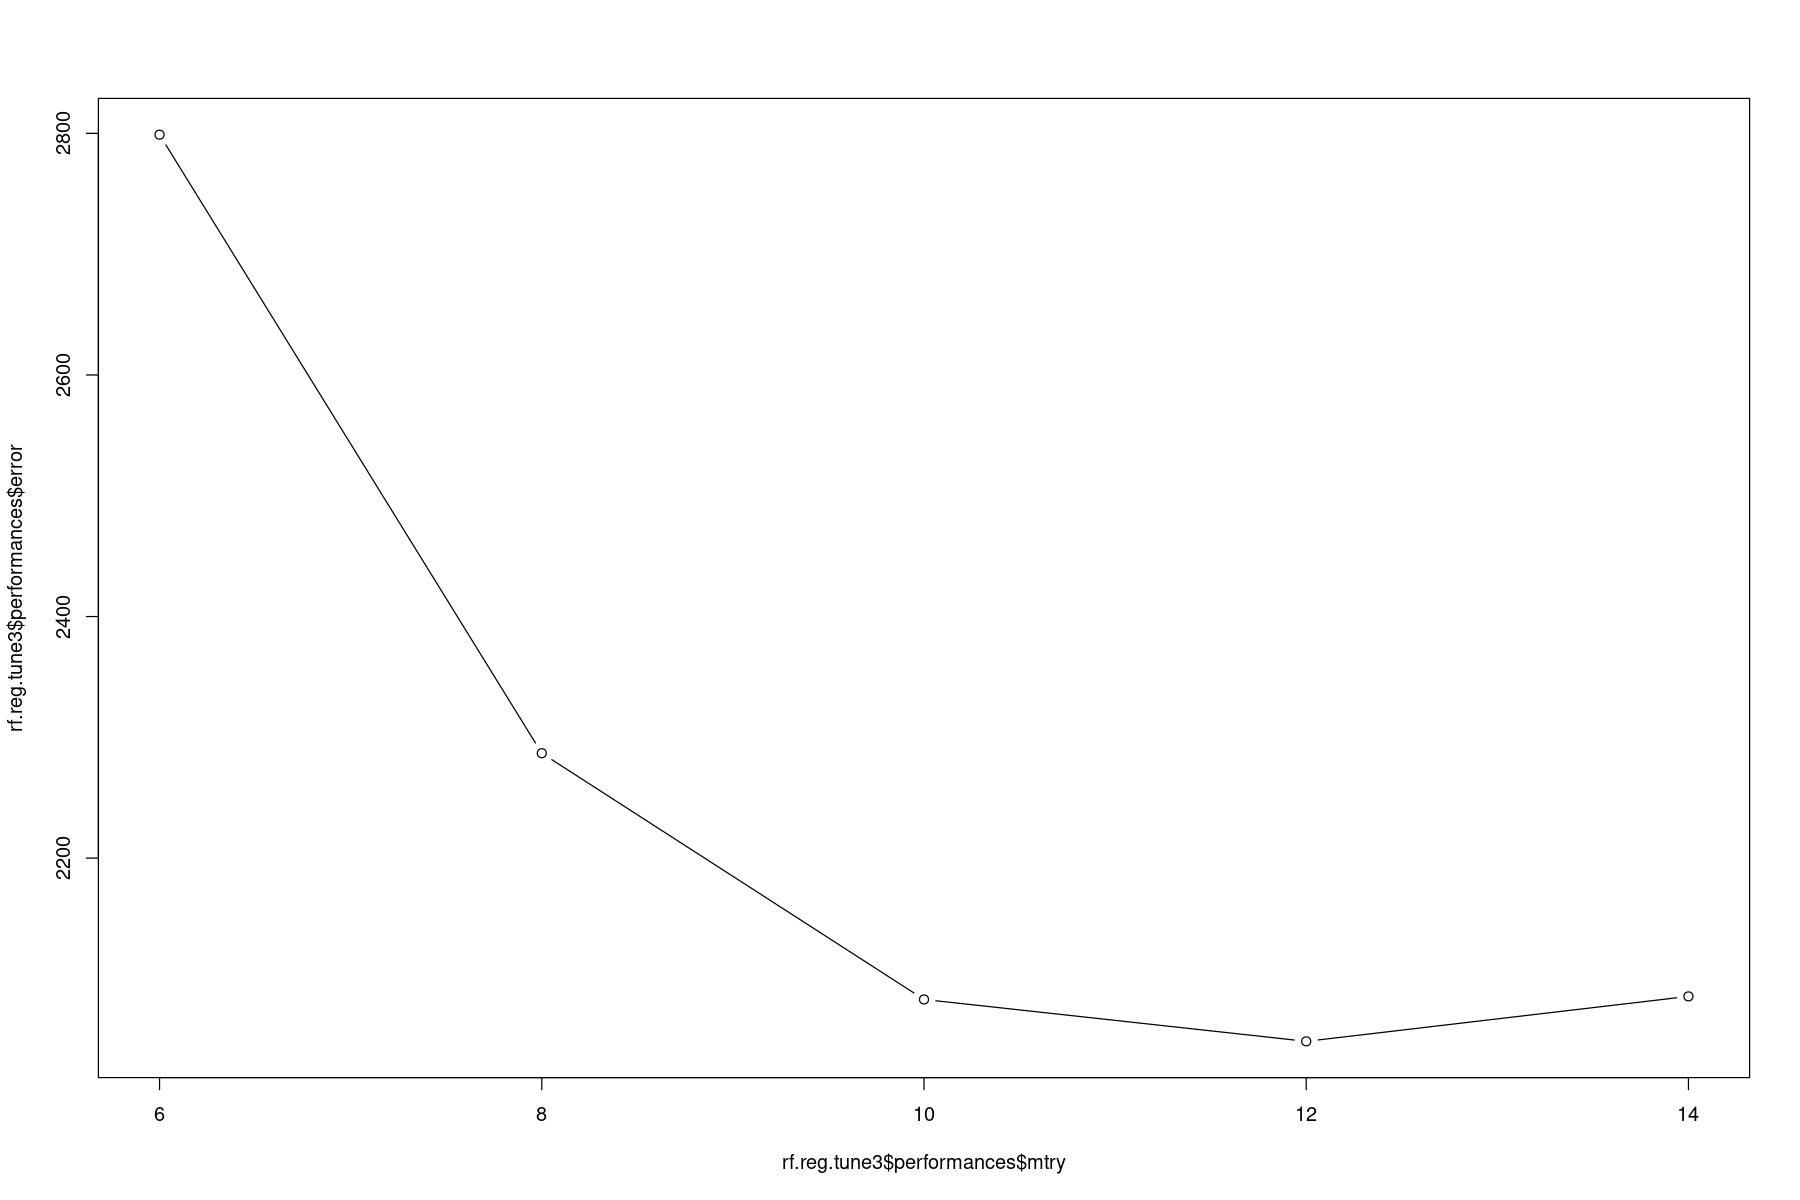

In [144]:
rf.reg.tune3=tune.randomForest(Calories_Burned~., 
                              data = datappr,ntrees = 400, mtry = c(6,8,10,12,14),
                              maxit =200, linout = TRUE) 
print(rf.reg.tune3) 
plot(rf.reg.tune3$performances$mtry, rf.reg.tune3$performances$error, type = 'b')


In [145]:
rf.reg=randomForest(Calories_Burned~., data=datappr,xtest=datestr[,-8],ytest=datestr[,"Calories_Burned"],
   ntree=300,do.trace=50,importance=TRUE, mtry=12)

     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 |     2070     2.75 |     1854     2.65 |
 100 |     1971     2.62 |     1802     2.58 |
 150 |     1913     2.54 |     1797     2.57 |
 200 |     1891     2.51 |     1776     2.54 |
 250 |     1869     2.48 |     1773     2.54 |
 300 |     1882     2.50 |     1796     2.57 |


Warning message:
“Removed 4 rows containing missing values (`geom_point()`).”


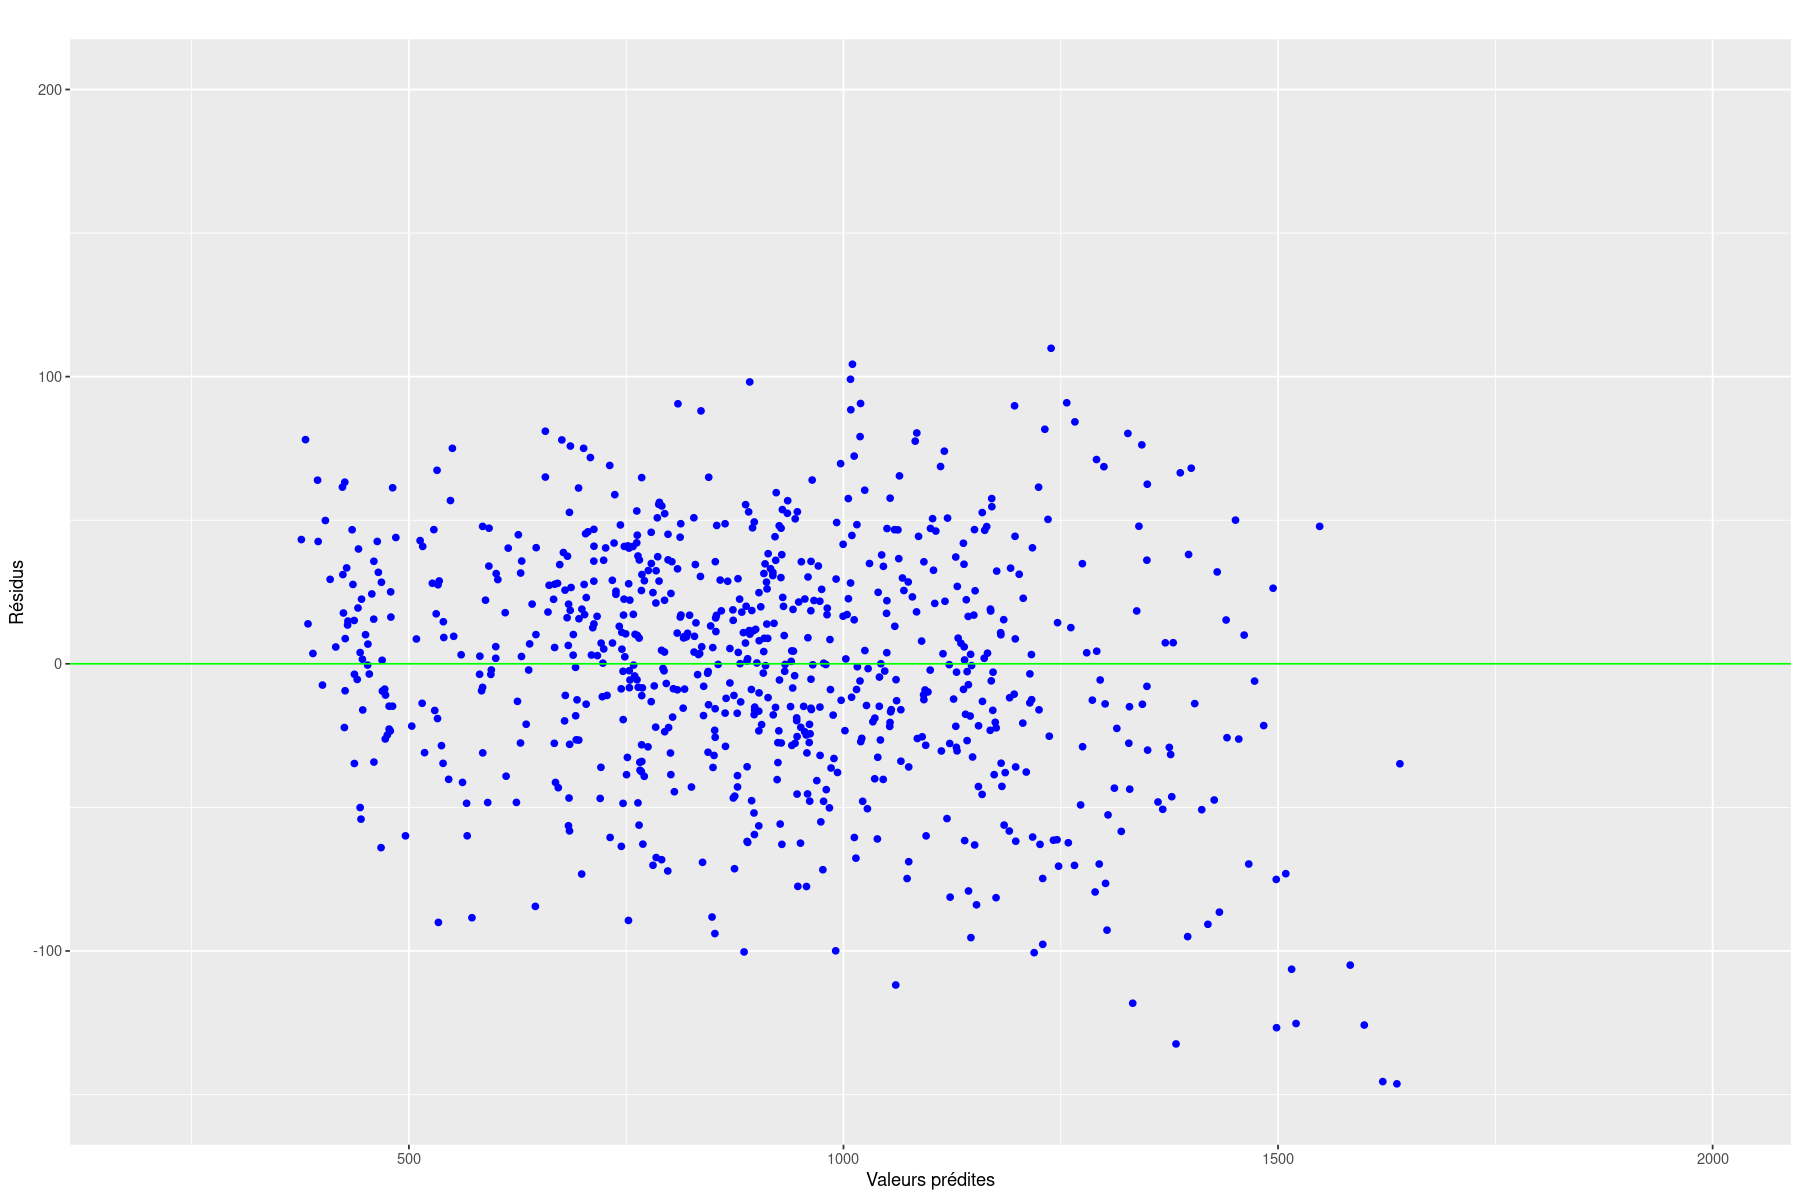

In [146]:
options(repr.plot.width = 15, repr.plot.height = 10)
fit.rfr=rf.reg$predicted
res.rfr=fit.rfr-datappr[,"Calories_Burned"]
gplot.res(fit.rfr,res.rfr,titre="")

In [147]:
sort(round(importance(rf.reg), 2)[,1], decreasing=TRUE)

Avg_BPM  Session_Duration               Age            Gender 
           127.79             83.06             52.25             30.57 
      Weight..kg.      Water_Intake    Fat_Percentage        Height..m. 
            13.96             12.98              8.17              6.81 
 Experience_Level               BMI Workout_Frequency      Workout_Type 
             6.45              6.17              4.71              0.43 
      Resting_BPM           Max_BPM 
            -0.11             -1.95

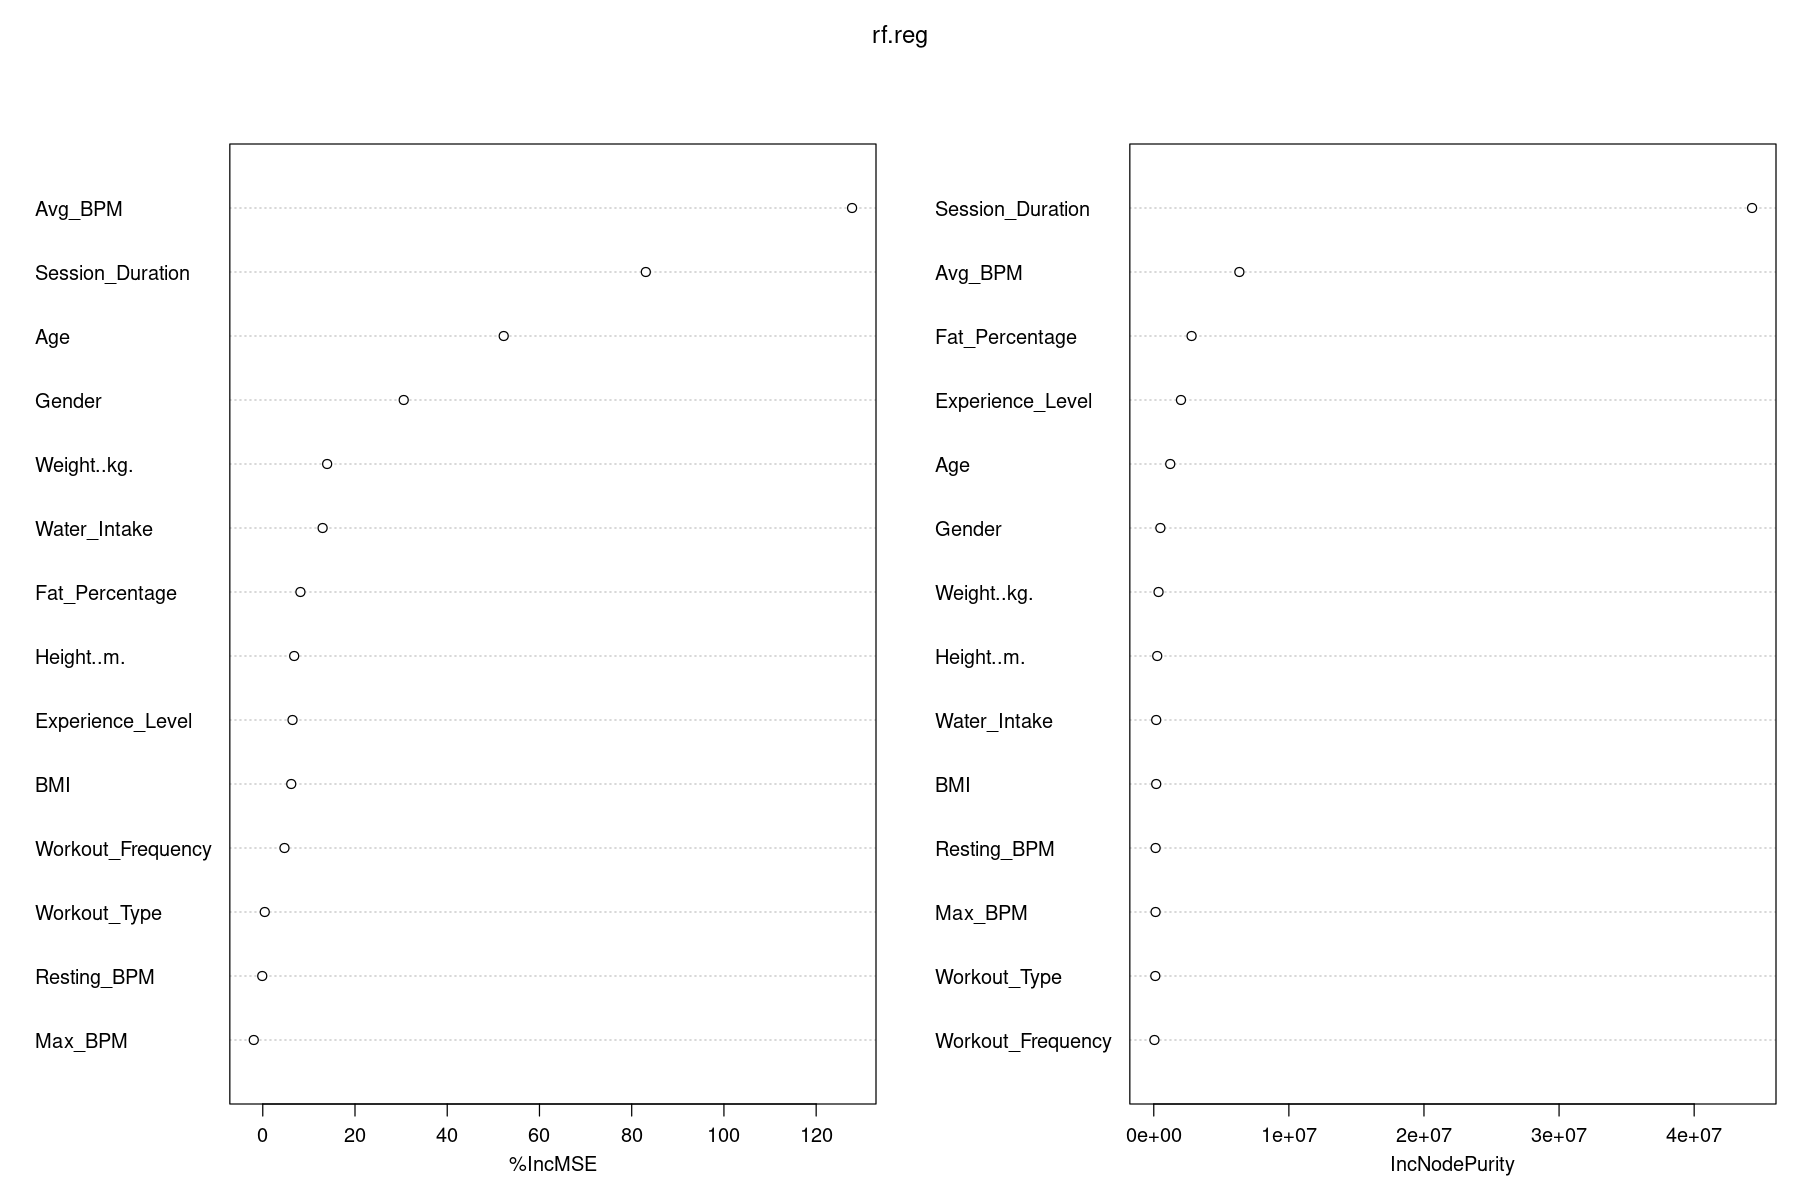

In [148]:
varImpPlot(rf.reg)

### Echantillon Test

In [149]:
# Forêts aléatoires
pred.rfr=rf.reg$test$predicted
# Erreur quadratique moyenne de prévision
sum((pred.rfr-datestr[,"Calories_Burned"])^2)/nrow(datestr)

table(pred.rfr>890,datestr[,"Calories_Burned"]>890)

[1] 1796.04

       
        FALSE TRUE
  FALSE    93    5
  TRUE      9   88

## Boosting

In [65]:

library(gbm)
boost.reg = gbm(Calories_Burned ~ ., data = datappr, distribution = "gaussian", n.trees = 1000, 
    cv.folds = 10, n.minobsinnode = 5, shrinkage = 0.03, verbose = FALSE)

Loaded gbm 2.2.2

This version of gbm is no longer under development. Consider transitioning to gbm3, https://github.com/gbm-developers/gbm3



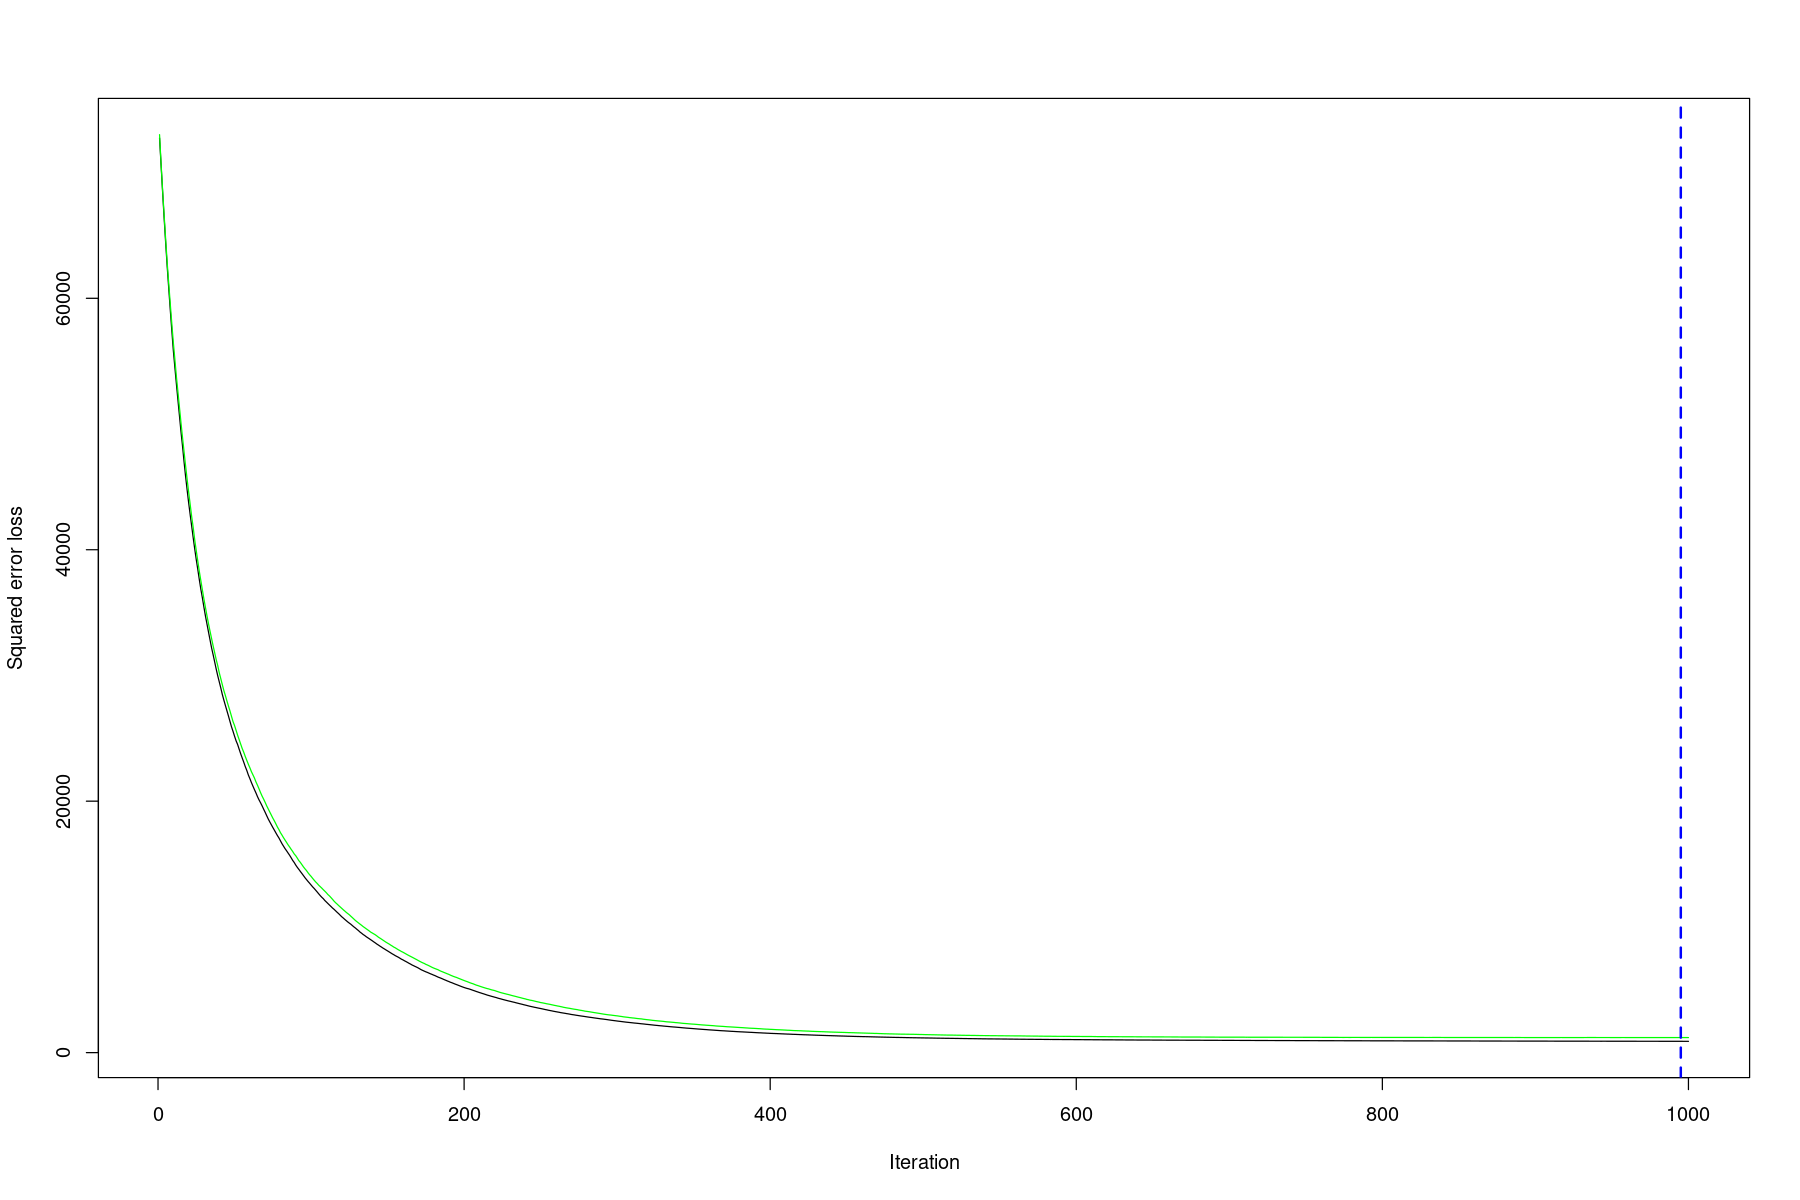

In [66]:
best.iter=gbm.perf(boost.reg,method="cv")

In [68]:

fit.boostr=boost.reg$fit
res.boostr=fit.boostr-datappr[,"Calories_Burned"]
mse.boostr <- mean(res.boostr^2)
print(mse.boostr)

[1] 898.9937


### Echantillon Test

In [108]:
pred.test <- predict(boost.reg, newdata = datestr, n.trees = best.iter)
res.test <- pred.test - datestr$Calories_Burned
mse.test <- mean(res.test^2)
print(mse.test)

[1] 1086.928


## Réseau de neurones

In [70]:
library(MASS)
library(nnet)

In [71]:
nnet.reg=nnet(Calories_Burned~.,data=datappr,size=5,decay=1,linout=TRUE,maxit=2000) 

# weights:  106
initial  value 701770082.150223 
iter  10 value 22766379.367647
iter  20 value 21509157.832406
iter  30 value 21226740.186102
iter  40 value 18835993.695840
iter  50 value 17573181.174681
iter  60 value 17078940.438639
iter  70 value 16931905.700189
iter  80 value 16757012.323599
iter  90 value 15152816.406745
iter 100 value 13773764.122559
iter 110 value 13048600.493041
iter 120 value 12619353.268806
iter 130 value 12236455.035168
iter 140 value 11950031.716563
iter 150 value 10274901.364223
iter 160 value 9012634.161770
iter 170 value 7303859.586073
iter 180 value 6524698.173676
iter 190 value 6308138.183527
iter 200 value 6250286.213579
iter 210 value 6218901.333647
iter 220 value 6183779.035297
iter 230 value 6146655.222384
iter 240 value 6070492.864366
iter 250 value 5899664.380783
iter 260 value 5685243.974547
iter 270 value 5617474.954074
iter 280 value 5586849.873903
iter 290 value 5545647.901342
iter 300 value 5506547.029742
iter 310 value 5342064.729534
iter 3


Parameter tuning of ‘nnet’:

- sampling method: 10-fold cross validation 

- best parameters:
 size decay
    9     1

- best performance: 900476.5 



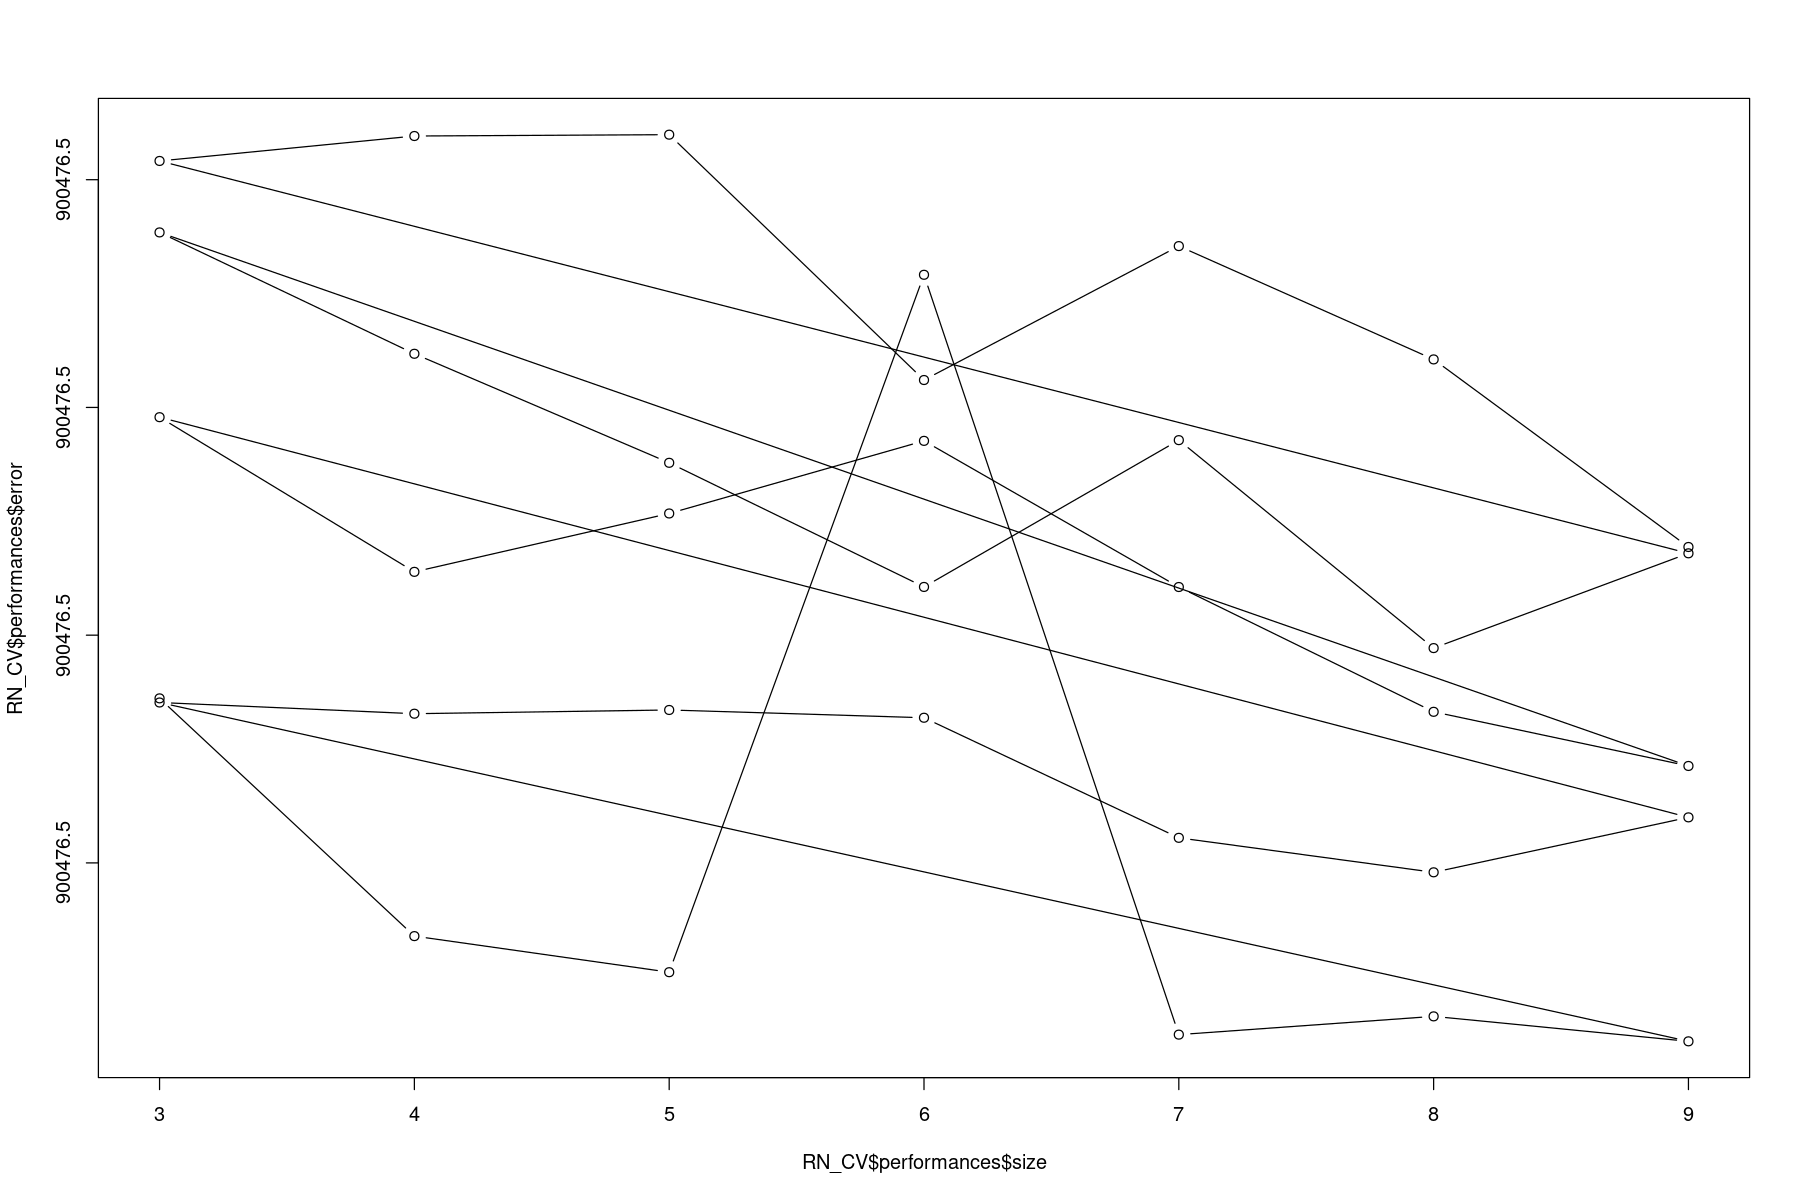

In [100]:
RN_CV <- tune.nnet(Calories_Burned~.,data=datappr,size=3:9,decay=1:5)

print(RN_CV) 
plot(RN_CV$performances$size, RN_CV$performances$error, type = 'b')

In [101]:
nnet.reg=nnet(Calories_Burned~.,data=datappr,size=7,decay=1,linout=TRUE,maxit=1000) 

# weights:  148
initial  value 701544941.694089 
iter  10 value 24175370.500113
iter  20 value 19789835.585561
iter  30 value 19393886.248318
iter  40 value 19030008.119227
iter  50 value 18746917.643785
iter  60 value 18099331.616616
iter  70 value 16676006.191520
iter  80 value 15838118.297461
iter  90 value 15304357.119585
iter 100 value 12594315.701262
iter 110 value 11726868.942909
iter 120 value 11076022.164629
iter 130 value 9934022.519771
iter 140 value 9819420.089929
iter 150 value 9653292.578710
iter 160 value 9512363.588755
iter 170 value 9398495.027226
iter 180 value 9320317.040646
iter 190 value 9299692.133186
iter 200 value 9277080.415102
iter 210 value 9205752.271058
iter 220 value 8943347.445947
iter 230 value 8401019.578512
iter 240 value 7867473.911584
iter 250 value 7284791.090314
iter 260 value 7101237.623161
iter 270 value 6882780.664033
iter 280 value 6850821.254342
iter 290 value 6726433.434389
iter 300 value 6696049.868552
iter 310 value 6645207.791344
iter 320 

[1] 587.1986


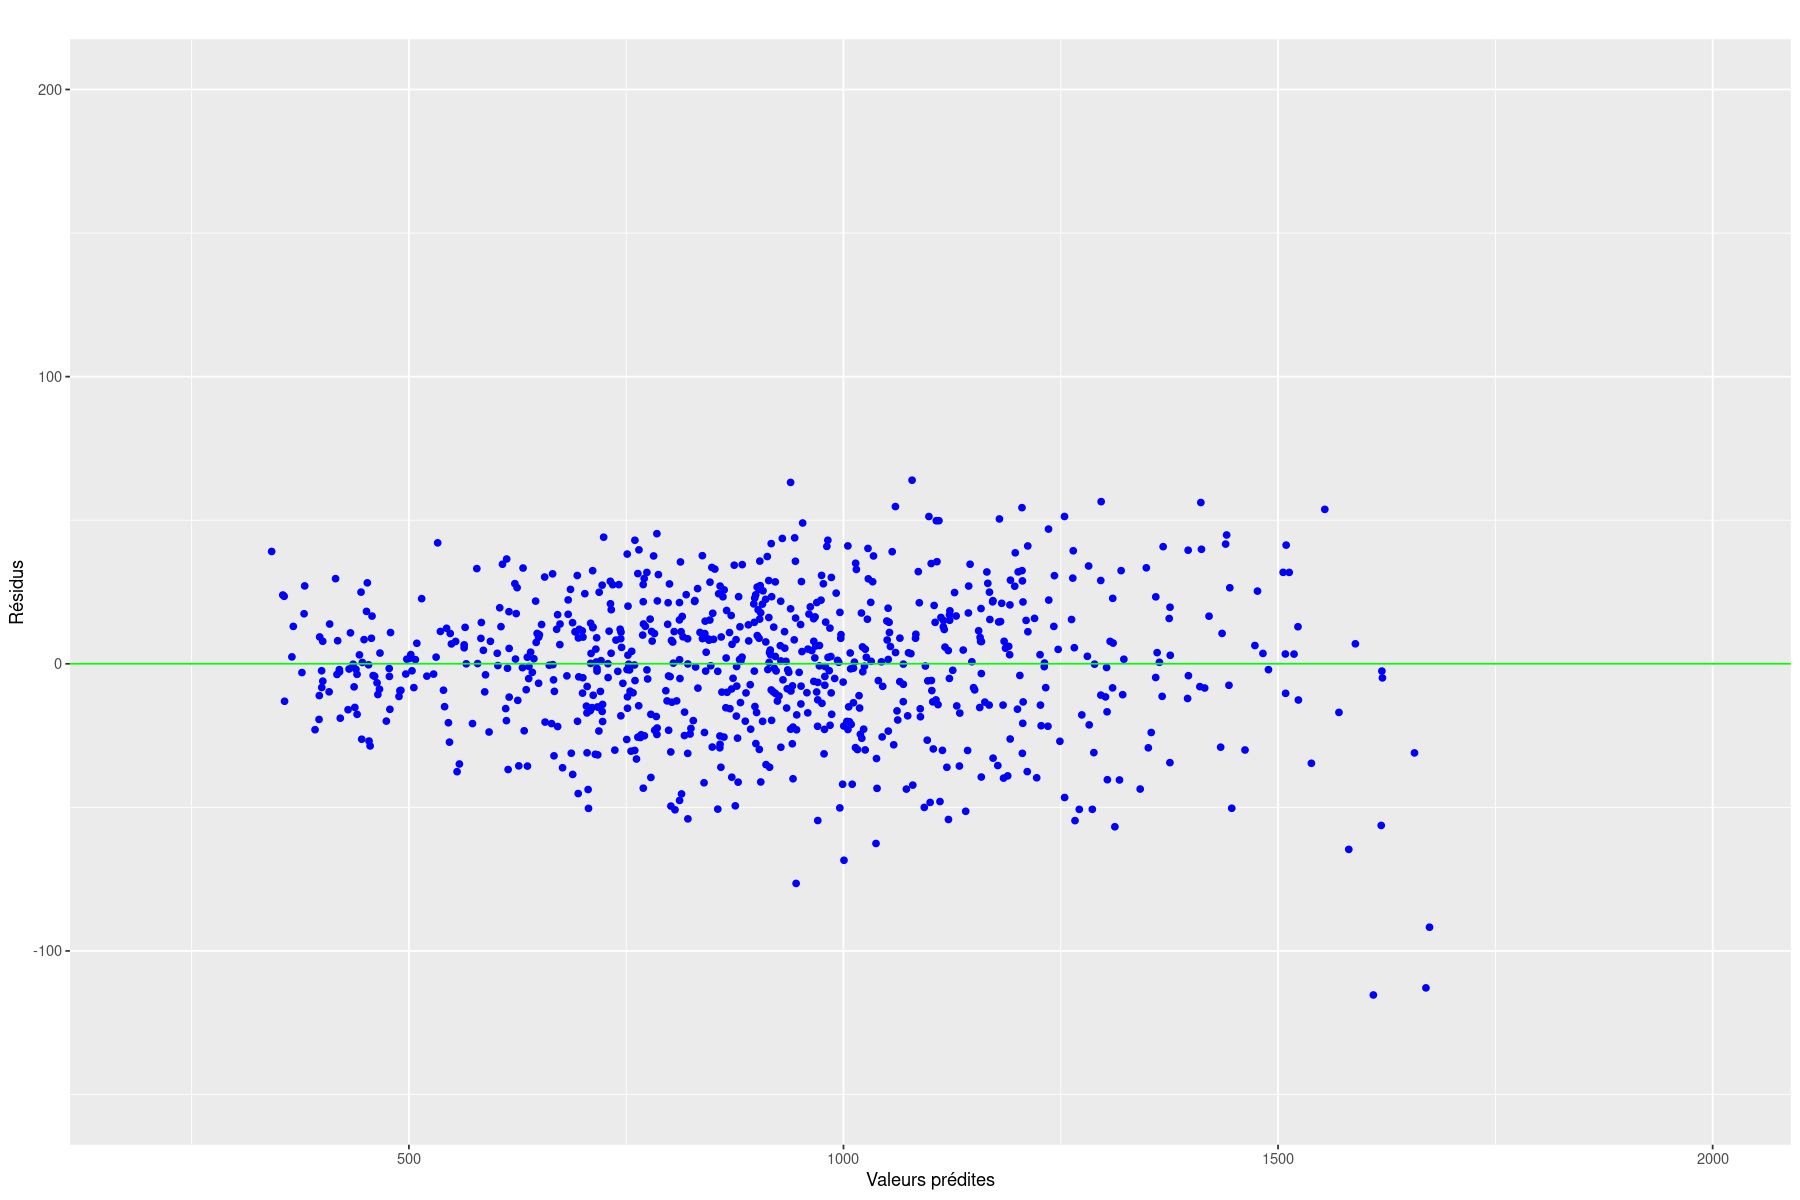

In [117]:
fit.nnetr=predict(nnet.reg,data=datappr)
res.nnetr=fit.nnetr-datappr[,"Calories_Burned"]
mse.nnetr <- mean(res.nnetr^2)
print(mse.nnetr)
gplot.res(fit.nnetr,res.nnetr,titre="")

[1] 782.7462


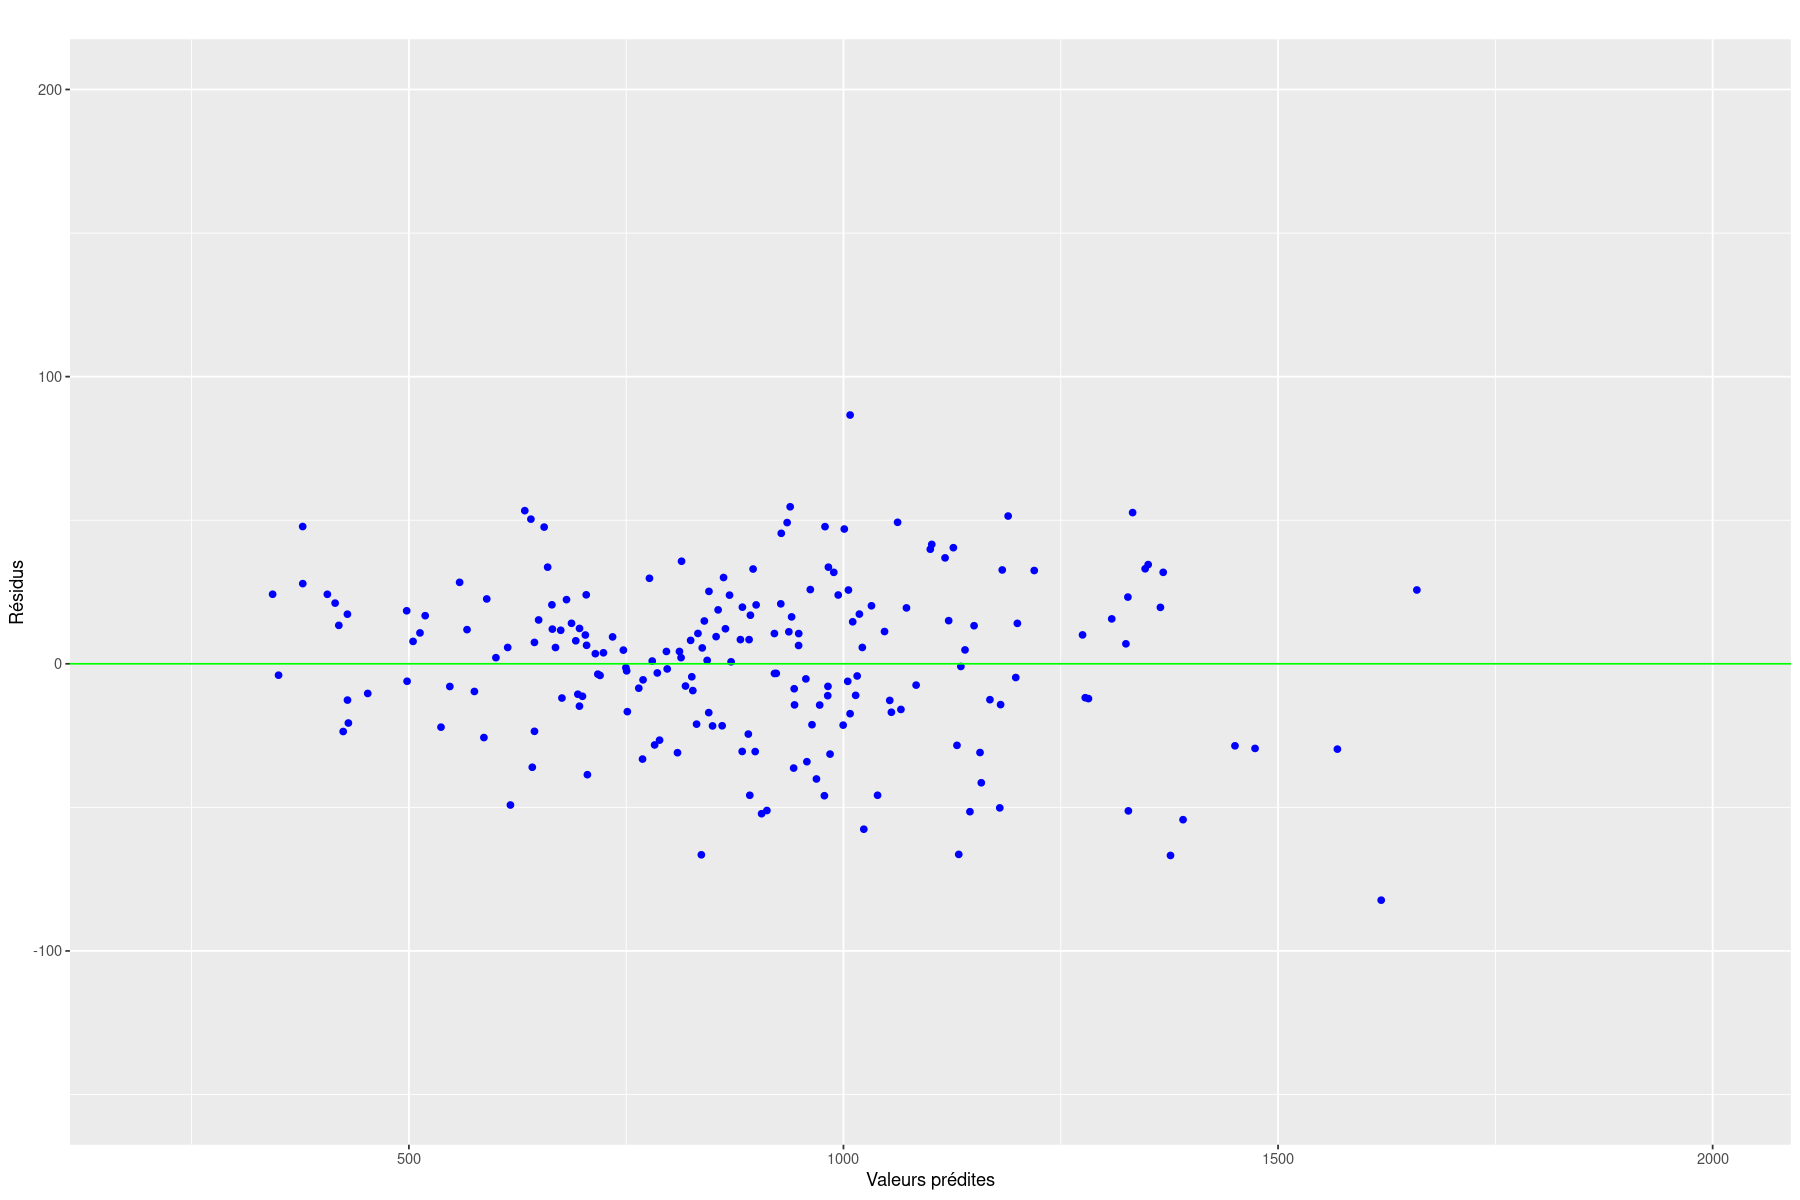

In [118]:
fit.nnetr=predict(nnet.reg,newdata=datestr)
res.nnetr=fit.nnetr-datestr[,"Calories_Burned"]
mse.nnetr <- mean(res.nnetr^2)
print(mse.nnetr)
gplot.res(fit.nnetr,res.nnetr,titre="")

## Comparaison des méthodes de régression

In [158]:
# Matrice des variables explicatives pour le test
x_test <- model.matrix(Calories_Burned ~ . - 1, data = datestr)

# Prédiction sur l'échantillon de test
pred_lm_t <- predict(reg.lm, newdata = datestr)
pred_aic_t <- predict(reg.glm.aic, newdata = datestr)
pred_bic_t <- predict(reg.glm.bic, newdata = datestr)
pred_lasso_t <- predict(reg.lasso.cv, newx = x_test, s = "lambda.1se")
pred_ridge_t <- predict(regRidgeCV, newx = x_test, s = lambda_opt)
pred_svm_t <- predict(cv_radial, newdata= datestr)
pred_tree_t <- predict(tree.reg, newdata= datestr)
pred_rf_t <- rf.reg$test$predicted
pred_boost_t <- predict(boost.reg, newdata=datestr)
pred_rn_t <- predict(nnet.reg,newdata=datestr)

# Variable cible
y_test <- datestr$Calories_Burned
denom <- sum(y_test^2)  # La  moyenne de y_test est zéro

# Q2 sur test
Q2_lm <- 1 - sum((y_test - pred_lm_t)^2) / denom
Q2_aic <- 1 - sum((y_test - pred_aic_t)^2) / denom
Q2_bic <- 1 - sum((y_test - pred_bic_t)^2) / denom
Q2_lasso <- 1 - sum((y_test - pred_lasso_t)^2) / denom
Q2_ridge <- 1 - sum((y_test - pred_ridge_t)^2) / denom
Q2_svm <- 1 - sum((y_test - pred_svm_t)^2) / denom
Q2_tree <- 1 - sum((y_test - pred_tree_t)^2) / denom
Q2_rf <- 1 -  sum((y_test - pred_rf_t)^2) / denom
Q2_boost <- 1 - sum((y_test - pred_boost_t)^2) / denom
Q2_rn <- 1 - sum((y_test - pred_rn_t)^2) / denom

n <- length(y_test)

# MSE des modèles
mse.lm <- mean((pred_lm_t - y_test)^2)
mse.aic <- mean((pred_aic_t - y_test)^2)
mse.bic <- mean((pred_bic_t - y_test)^2)
mse.lasso <- mean((pred_lasso_t - y_test)^2)
mse.ridge <- mean((pred_ridge_t - y_test)^2)
mse.SVM <- mean((pred_svm_t - y_test)^2)
mse.tree <- mean((pred_tree_t - y_test)^2)
mse.rf <- mean((pred_rf_t - y_test)^2)
mse.boost <- mean((pred_boost_t - y_test)^2)
mse.rn <- mean((pred_rn_t - y_test)^2)

Using 995 trees...




In [159]:
results <- data.frame(
  Modèle = c("Régression LM", "AIC", "BIC", "Lasso", "Ridge", "SVM", "CART", "RF", "Boost", "RN"),
  Q2=  c(Q2_lm, Q2_aic, Q2_bic, Q2_lasso, Q2_ridge, Q2_svm, Q2_tree, Q2_rf, Q2_boost, Q2_rn),
  MSE = c(mse.lm, mse.aic, mse.bic, mse.lasso, mse.ridge, mse.SVM, mse.tree, mse.rf, mse.boost, mse.rn)
)

# Appliquer round uniquement aux colonnes numériques
results_rounded <- results
results_rounded[, 2:3] <- round(results[, 2:3], 5)

print(results_rounded)

          Modèle      Q2       MSE
1  Régression LM 0.99840 1380.0672
2            AIC 0.99843 1356.2023
3            BIC 0.99841 1367.1366
4          Lasso 0.99833 1441.7769
5          Ridge 0.99840 1382.3946
6            SVM 0.99918  702.8731
7           CART 0.99312 5929.2590
8             RF 0.99791 1796.0399
9          Boost 0.99874 1086.9278
10            RN 0.99909  782.7462


# Prédiction du niveau d'expérience

## Séparation de la base en train/test

In [77]:
library(fastDummies)
library(dplyr)

In [78]:
Gym <- dummy_cols(Gym, select_columns = "Experience_Level", 
                  remove_first_dummy = FALSE, remove_selected_columns = TRUE)

In [79]:
set.seed(140) # initialisation du générateur
# Extraction des échantillons
test.ratio <- .2   # part de l'échantillon test
npop <- nrow(Gym) # nombre de lignes dans les données
nvar <- ncol(Gym) # nombre de colonnes
# taille de l'échantillon test
ntest <- ceiling(npop * test.ratio) 
# indices de l'échantillon test
testi <- sample(1:npop, ntest)
# indices de l'échantillon d'apprentissage
appri <- setdiff(1:npop, testi) 

In [160]:
# construction de l'échantillon d'apprentissage

datapprq <- Gym[appri,] 


datappr1 <- Gym[appri, !(names(Gym) %in% c("Experience_Level_2", "Experience_Level_3"))]
datappr2 <- Gym[appri, !(names(Gym) %in% c("Experience_Level_1", "Experience_Level_3"))]
datappr3 <- Gym[appri, !(names(Gym) %in% c("Experience_Level_1", "Experience_Level_2"))]
# construction de l'échantillon test

datestrq <- Gym[testi,]
datestr1 <- Gym[testi,!(names(Gym) %in% c("Experience_Level_2", "Experience_Level_3"))]
datestr2 <- Gym[testi,!(names(Gym) %in% c("Experience_Level_1", "Experience_Level_3"))]
datestr3 <- Gym[testi,!(names(Gym) %in% c("Experience_Level_1", "Experience_Level_2"))]

summary(datappr2)

# on normalise l'échantillon d'apprentissage

datappr1[,-c(2,9,12,15)]=scale(datappr1[,-c(2,9,12,15)])

# on normalise l'échantillon test 
# à l'aide des caractéristiques de l'échantillon d'apprentissage
datestr1[,-c(2,9,12,15)]=scale(datestr1[,-c(2,9,12,15)],
                            center=sapply(datappr1[,-c(2,9,12,15)],mean), # on centre avec les moyennes de l'échantillon d'apprentissage
                            scale=sapply(datappr1[,-c(2,9,12,15)],sd))

datappr2[,-c(2,9,12,15)]=scale(datappr2[,-c(2,9,12,15)])

# on normalise l'échantillon test 

datestr2[,-c(2,9,12,15)]=scale(datestr2[,-c(2,9,12,15)],
                            center=sapply(datappr2[,-c(2,9,12,15)],mean), # on centre avec les moyennes de l'échantillon d'apprentissage
                            scale=sapply(datappr2[,-c(2,9,12,15)],sd))

datappr3[,-c(2,9,12,15)]=scale(datappr3[,-c(2,9,12,15)])

# on normalise l'échantillon test 
# à l'aide des caractéristiques de l'échantillon d'apprentissage
datestr3[,-c(2,9,12,15)]=scale(datestr3[,-c(2,9,12,15)],
                            center=sapply(datappr3[,-c(2,9,12,15)],mean), # on centre avec les moyennes de l'échantillon d'apprentissage
                            scale=sapply(datappr3[,-c(2,9,12,15)],sd))

datapprq[,-c(2,9,12,15,16,17)]=scale(datapprq[,-c(2,9,12,15,16,17)])

# on normalise l'échantillon test 
# à l'aide des caractéristiques de l'échantillon d'apprentissage
datestrq[,-c(2,9,12,15,16,17)]=scale(datestrq[,-c(2,9,12,15,16,17)],
                            center=sapply(datapprq[,-c(2,9,12,15,16,17)],mean), # on centre avec les moyennes de l'échantillon d'apprentissage
                            scale=sapply(datapprq[,-c(2,9,12,15,16,17)],sd))

summary(datappr2)

      Age           Gender     Weight..kg.       Height..m.       Max_BPM     
 Min.   :18.00   Female:376   Min.   : 40.00   Min.   :1.500   Min.   :160.0  
 1st Qu.:28.00   Male  :402   1st Qu.: 58.20   1st Qu.:1.620   1st Qu.:170.0  
 Median :40.00                Median : 69.70   Median :1.710   Median :180.0  
 Mean   :38.88                Mean   : 73.91   Mean   :1.721   Mean   :179.9  
 3rd Qu.:50.00                3rd Qu.: 85.97   3rd Qu.:1.800   3rd Qu.:190.0  
 Max.   :59.00                Max.   :129.90   Max.   :2.000   Max.   :199.0  
    Avg_BPM       Resting_BPM    Calories_Burned    Workout_Type
 Min.   :120.0   Min.   :50.00   Min.   : 303.0   Cardio  :215  
 1st Qu.:131.0   1st Qu.:56.00   1st Qu.: 720.0   HIIT    :182  
 Median :143.0   Median :62.00   Median : 886.0   Strength:193  
 Mean   :143.7   Mean   :62.28   Mean   : 900.3   Yoga    :188  
 3rd Qu.:156.0   3rd Qu.:68.00   3rd Qu.:1077.5                 
 Max.   :169.0   Max.   :74.00   Max.   :1783.0          

      Age              Gender     Weight..kg.        Height..m.      
 Min.   :-1.70064   Female:376   Min.   :-1.5948   Min.   :-1.73389  
 1st Qu.:-0.88633   Male  :402   1st Qu.:-0.7389   1st Qu.:-0.79297  
 Median : 0.09085                Median :-0.1981   Median :-0.08728  
 Mean   : 0.00000                Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.: 0.90517                3rd Qu.: 0.5673   3rd Qu.: 0.61841  
 Max.   : 1.63805                Max.   : 2.6330   Max.   : 2.18661  
    Max_BPM             Avg_BPM          Resting_BPM       Calories_Burned   
 Min.   :-1.712871   Min.   :-1.65010   Min.   :-1.69519   Min.   :-2.18172  
 1st Qu.:-0.853342   1st Qu.:-0.88441   1st Qu.:-0.86659   1st Qu.:-0.65868  
 Median : 0.006187   Median :-0.04912   Median :-0.03799   Median :-0.05239  
 Mean   : 0.000000   Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.00000  
 3rd Qu.: 0.865716   3rd Qu.: 0.85578   3rd Qu.: 0.79061   3rd Qu.: 0.64704  
 Max.   : 1.639292   Max.   : 1.76068   Ma

## Modèle linéaire

### Regression logistique

#### Niveau 1 d'Expérience Level

In [81]:
# estimation du modèle complet
log.lm1 <- glm(Experience_Level_1 ~. , data = datappr1, family = binomial)
summary(log.lm1)$coefficients

# significativité des paramètres
anova(log.lm1, test = "Chisq")

Estimate     Std. Error   z value     Pr(>|z|) 
(Intercept)           20.61484513 1249.6312893  0.01649674 0.9868381
Age                    0.06760750    0.2233932  0.30263897 0.7621650
GenderMale            -0.91202471    0.7055576 -1.29262969 0.1961392
Weight..kg.            0.43142325    1.1224552  0.38435675 0.7007141
Height..m.            -0.06566150    0.6097510 -0.10768577 0.9142450
Max_BPM               -0.09208004    0.1345949 -0.68412731 0.4938948
Avg_BPM                0.10831716    0.4243496  0.25525454 0.7985265
Resting_BPM           -0.07505664    0.1407516 -0.53325617 0.5938563
Calories_Burned       -0.56119928    1.3203068 -0.42505219 0.6707986
Workout_TypeHIIT       0.07105741    0.3775723  0.18819550 0.8507234
Workout_TypeStrength   0.26622721    0.3758311  0.70836920 0.4787160
Workout_TypeYoga      -0.18985289    0.3878735 -0.48947116 0.6245082
Fat_Percentage        -0.09800563    0.2928808 -0.33462629 0.7379070
BMI                   -0.39736990    1.0674900 -0.37224696 0.7097090
Workout_Frequency3   -20.61702705 1249.6311955 -0.01649849 0.9868367
Workout_Frequency4   -40.61098003 1652.0857773 -0.02458164 0.9803887
Workout_Frequency5   -39.05121002 2282.4339669 -0.01710946 0.9863493
Session_Duration      -1.03649006    1.2052348 -0.85999018 0.3897945
Water_Intake           0.27446535    0.1980057  1.38614869 0.1657015

Df Deviance     Resid. Df Resid. Dev Pr(>Chi)    
NULL              NA           NA 777       1044.5563            NA
Age                1   0.13556746 776       1044.4207  7.127279e-01
Gender             1   0.01318252 775       1044.4075  9.085916e-01
Weight..kg.        1   0.29602895 774       1044.1115  5.863827e-01
Height..m.         1   0.36407991 773       1043.7474  5.462490e-01
Max_BPM            1   0.32794789 772       1043.4195  5.668699e-01
Avg_BPM            1   0.01142338 771       1043.4080  9.148840e-01
Resting_BPM        1   0.01045511 770       1043.3976  9.185581e-01
Calories_Burned    1 295.74490781 769        747.6527  2.785059e-66
Workout_Type       3   1.73561385 766        745.9171  6.290453e-01
Fat_Percentage     1   8.35083488 765        737.5662  3.855102e-03
BMI                1   3.71013428 764        733.8561  5.408304e-02
Workout_Frequency  3 396.65250615 761        337.2036  1.175543e-85
Session_Duration   1   0.54572551 760        336.6579  4.600695e-01
Water_Intake       1   1.93898035 759        334.7189  1.637793e-01

In [82]:
log.lm.step1 <- step(log.lm1, direction = "backward")

Start:  AIC=372.72
Experience_Level_1 ~ Age + Gender + Weight..kg. + Height..m. + 
    Max_BPM + Avg_BPM + Resting_BPM + Calories_Burned + Workout_Type + 
    Fat_Percentage + BMI + Workout_Frequency + Session_Duration + 
    Water_Intake

                    Df Deviance    AIC
- Workout_Type       3   336.18 368.18
- Height..m.         1   334.73 370.73
- Avg_BPM            1   334.78 370.78
- Age                1   334.81 370.81
- Fat_Percentage     1   334.83 370.83
- BMI                1   334.86 370.86
- Weight..kg.        1   334.87 370.87
- Calories_Burned    1   334.90 370.90
- Resting_BPM        1   335.00 371.00
- Max_BPM            1   335.19 371.19
- Session_Duration   1   335.46 371.46
- Gender             1   336.40 372.40
- Water_Intake       1   336.66 372.66
<none>                   334.72 372.72
- Workout_Frequency  3   728.24 760.24

Step:  AIC=368.18
Experience_Level_1 ~ Age + Gender + Weight..kg. + Height..m. + 
    Max_BPM + Avg_BPM + Resting_BPM + Calories_Burned

In [83]:
anova(log.lm.step1, test = "Chisq")

Df Deviance     Resid. Df Resid. Dev Pr(>Chi)     
NULL              NA           NA 777       1044.5563             NA
Gender             1   0.01567738 776       1044.5406   9.003578e-01
Workout_Frequency  3 634.41329789 773        410.1273  3.489088e-137
Session_Duration   1  68.54427564 772        341.5830   1.240607e-16
Water_Intake       1   2.16327147 771        339.4197   1.413435e-01

In [162]:
preds1 <- log.lm.step1$fitted.values
conf_matrixr1 <- table(Prediction = preds1 > 0.5,
                     Réalité = datappr1$Experience_Level_1)
cat("Matrice de confusion - Échantillon train (seuil 0.5)\n")
accuracy_train <- sum(diag(conf_matrixr1)) / sum(conf_matrixr1)
print(conf_matrixr1)
cat(sprintf("Accuracy train = %.2f%%\n", accuracy_train * 100))


preds_test1 <- predict(log.lm.step1, newdata = datestr1, type = "response")

conf_matrix1 <- table(Prediction = preds_test1 > 0.5,
                     Réalité = datestr1$Experience_Level_1)
accuracy_test <- sum(diag(conf_matrix1)) / sum(conf_matrix1)
cat("Matrice de confusion - Échantillon test (seuil 0.5)\n")
print(conf_matrix1)
cat(sprintf("Accuracy test= %.2f%%\n", accuracy_test * 100))

Matrice de confusion - Échantillon train (seuil 0.5)
          Réalité
Prediction   0   1
     FALSE 436  56
     TRUE   34 252
Accuracy train = 88.43%
Matrice de confusion - Échantillon test (seuil 0.5)
          Réalité
Prediction   0   1
     FALSE 127  36
     TRUE    0  32
Accuracy test= 81.54%


DEMANDER SUR QUOI FAIRE LA MATRICE DE VALIDATION

s1           
(Intercept)            4.821179947
Age                    0.070267907
GenderMale            -0.614289795
Weight..kg.            0.000000000
Height..m.             0.091151642
Max_BPM               -0.070009079
Avg_BPM                0.040059544
Resting_BPM           -0.055650117
Calories_Burned       -0.350548185
Workout_TypeHIIT       0.030446586
Workout_TypeStrength   0.185841984
Workout_TypeYoga      -0.156394251
Fat_Percentage         0.000000000
BMI                   -0.009160262
Workout_Frequency3    -4.975220521
Workout_Frequency4   -10.633409038
Workout_Frequency5    -8.202203475
Session_Duration      -1.157182363
Water_Intake           0.194777864

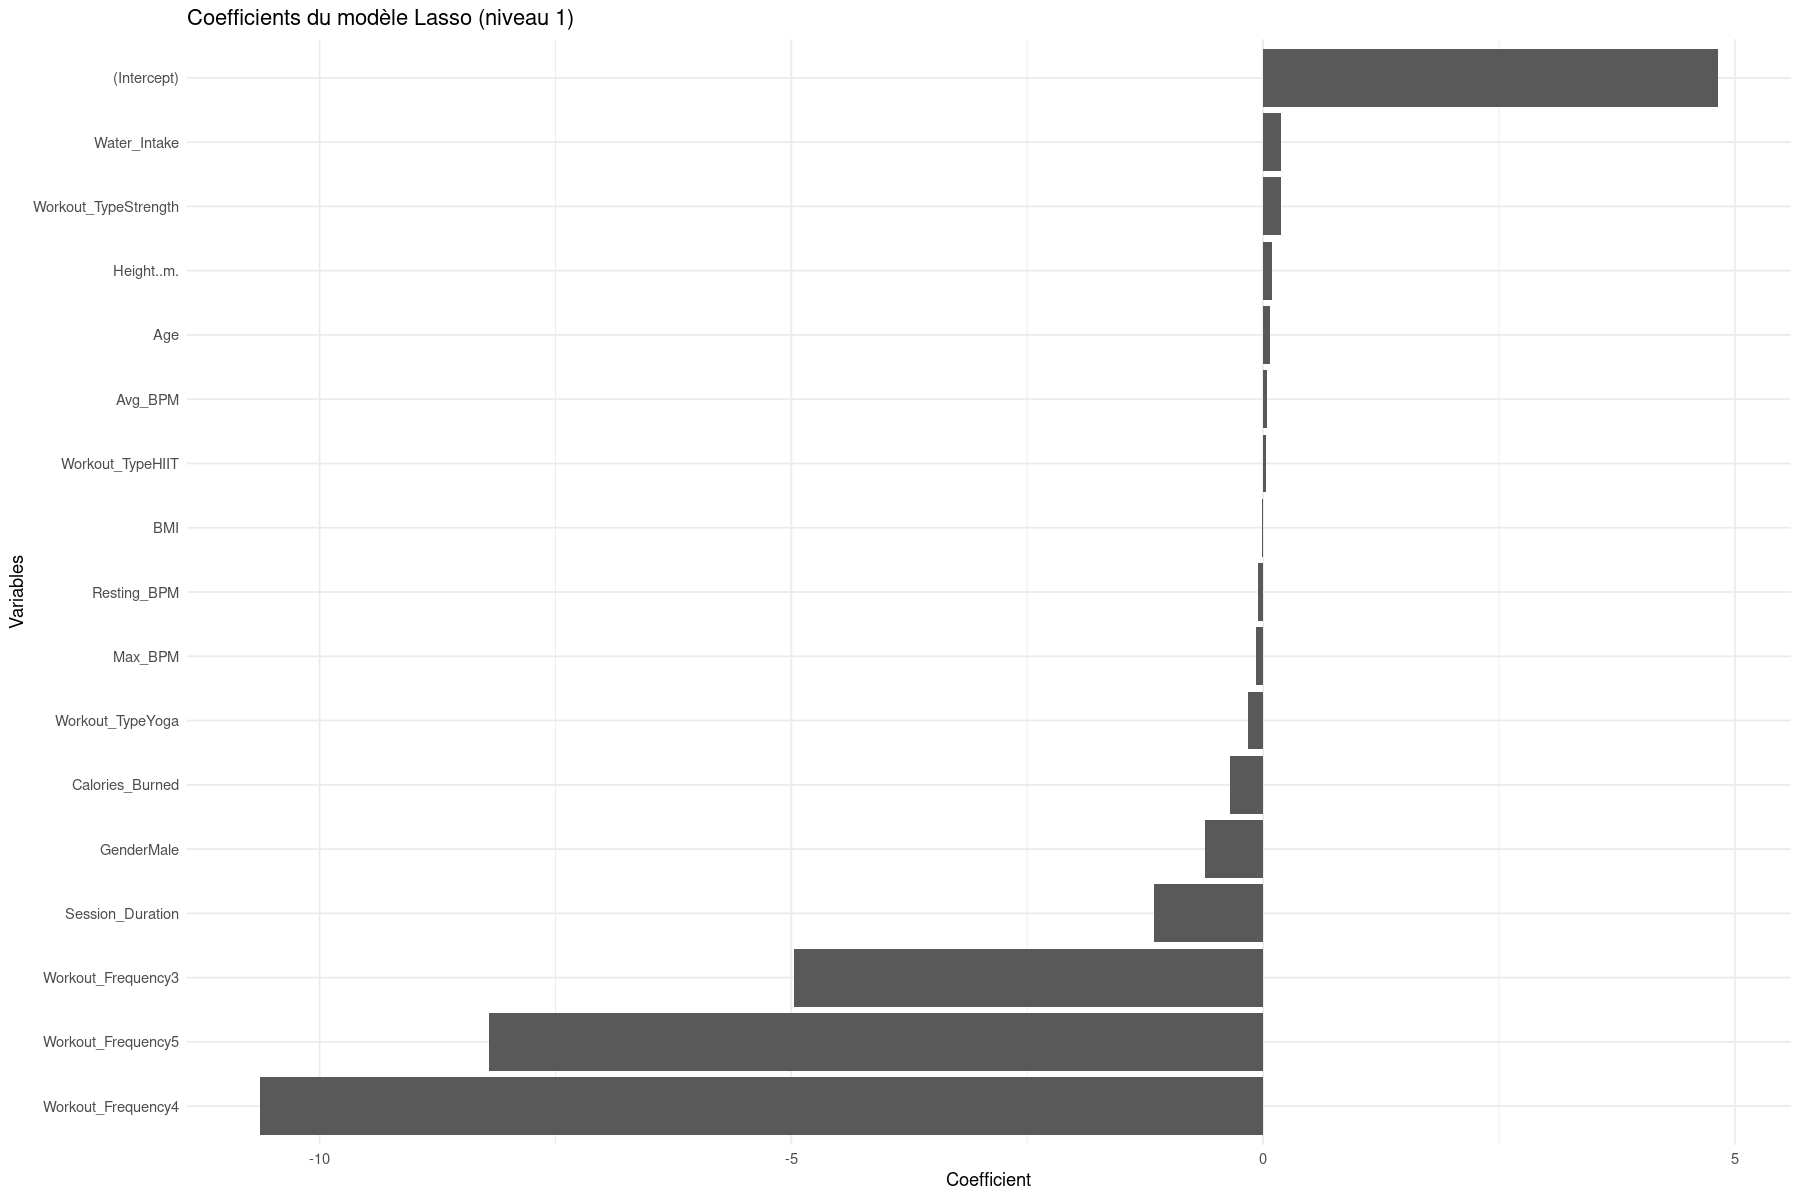

In [163]:
Xb1_train_mat <- model.matrix(Experience_Level_1 ~ . , data = datappr1)[, -1]  # enlever l’intercept
Y1_train_vec <- datappr1$Experience_Level_1
cv_lasso <- cv.glmnet(Xb1_train_mat, Y1_train_vec, family = "binomial", alpha = 1)
coef_lasso <- coef(cv_lasso, s = "lambda.min")

as.matrix(coef_lasso)

# Convertir en data frame
df_coef <- as.data.frame(as.matrix(coef_lasso))
df_coef$Variable <- rownames(df_coef)
colnames(df_coef)[1] <- "Coefficient"

# Supprimer les coefficients nuls
df_coef <- subset(df_coef, Coefficient != 0)
ggplot(df_coef, aes(x = reorder(Variable, Coefficient), y = Coefficient)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(title = "Coefficients du modèle Lasso (niveau 1)",
       x = "Variables",
       y = "Coefficient") +
  theme_minimal()


#### Niveau 2 d'Expérience Level

In [164]:
# estimation du modèle complet
log.lm2 <- glm(Experience_Level_2 ~. , data = datappr2, family = binomial)
summary(log.lm2)$coefficients

# significativité des paramètres
anova(log.lm2, test = "Chisq")

Estimate      Std. Error   z value      Pr(>|z|)    
(Intercept)          -22.344986845  742.0837127 -0.030111140 9.759784e-01
Age                   -0.084850051    0.1693649 -0.500989688 6.163784e-01
GenderMale             3.498248941    0.5431261  6.440952139 1.187263e-10
Weight..kg.            0.826746873    1.0021980  0.824933644 4.094093e-01
Height..m.            -0.582719353    0.5438283 -1.071513563 2.839386e-01
Max_BPM                0.016666748    0.1119830  0.148832843 8.816855e-01
Avg_BPM                0.205877373    0.3014396  0.682980521 4.946192e-01
Resting_BPM           -0.034129169    0.1149781 -0.296831795 7.665949e-01
Calories_Burned       -0.218444743    0.8403050 -0.259958890 7.948955e-01
Workout_TypeHIIT       0.006234467    0.3154998  0.019760605 9.842343e-01
Workout_TypeStrength  -0.465556642    0.3208466 -1.451025457 1.467728e-01
Workout_TypeYoga       0.012532532    0.3178747  0.039426008 9.685507e-01
Fat_Percentage         2.082822130    0.2193981  9.493345682 2.237356e-21
BMI                   -0.744442264    0.9476131 -0.785597251 4.321035e-01
Workout_Frequency3    19.961306675  742.0835904  0.026899000 9.785403e-01
Workout_Frequency4    22.464238593  742.0836665  0.030271841 9.758503e-01
Workout_Frequency5     4.021735625 1375.9716578  0.002922833 9.976679e-01
Session_Duration       0.944878395    0.7777323  1.214914675 2.243986e-01
Water_Intake          -0.901264413    0.1755749 -5.133218791 2.848285e-07

Df Deviance     Resid. Df Resid. Dev Pr(>Chi)    
NULL              NA           NA 777       1053.9289            NA
Age                1   0.09175345 776       1053.8371  7.619597e-01
Gender             1   0.04206083 775       1053.7950  8.375039e-01
Weight..kg.        1   1.13589800 774       1052.6591  2.865208e-01
Height..m.         1   0.48095870 773       1052.1782  4.879884e-01
Max_BPM            1   0.51445079 772       1051.6637  4.732185e-01
Avg_BPM            1   0.45983578 771       1051.2039  4.977007e-01
Resting_BPM        1   0.40769352 770       1050.7962  5.231425e-01
Calories_Burned    1   0.05208635 769       1050.7441  8.194718e-01
Workout_Type       3   0.05646244 766       1050.6877  9.964916e-01
Fat_Percentage     1 157.42968464 765        893.2580  4.123433e-36
BMI                1   0.05290381 764        893.2051  8.180853e-01
Workout_Frequency  3 364.10709329 761        529.0980  1.314897e-78
Session_Duration   1   0.70242688 760        528.3956  4.019694e-01
Water_Intake       1  28.83182622 759        499.5637  7.894317e-08

In [165]:
log.lm.step2 <- step(log.lm2, direction = "backward")

Start:  AIC=537.56
Experience_Level_2 ~ Age + Gender + Weight..kg. + Height..m. + 
    Max_BPM + Avg_BPM + Resting_BPM + Calories_Burned + Workout_Type + 
    Fat_Percentage + BMI + Workout_Frequency + Session_Duration + 
    Water_Intake

                    Df Deviance    AIC
- Workout_Type       3   502.80 534.80
- Max_BPM            1   499.59 535.59
- Calories_Burned    1   499.63 535.63
- Resting_BPM        1   499.65 535.65
- Age                1   499.82 535.82
- Avg_BPM            1   500.03 536.03
- BMI                1   500.19 536.19
- Weight..kg.        1   500.25 536.25
- Height..m.         1   500.72 536.72
- Session_Duration   1   501.05 537.05
<none>                   499.56 537.56
- Water_Intake       1   528.40 564.40
- Gender             1   549.16 585.16
- Fat_Percentage     1   630.03 666.03
- Workout_Frequency  3   863.97 895.97

Step:  AIC=534.8
Experience_Level_2 ~ Age + Gender + Weight..kg. + Height..m. + 
    Max_BPM + Avg_BPM + Resting_BPM + Calories_Burned 

In [166]:
anova(log.lm.step2, test = "Chisq")

Df Deviance     Resid. Df Resid. Dev Pr(>Chi)    
NULL              NA           NA 777       1053.9289            NA
Gender             1   0.03857024 776       1053.8903  8.443025e-01
Fat_Percentage     1 100.80875105 775        953.0815  1.013077e-23
Workout_Frequency  3 402.21789196 772        550.8636  7.323876e-87
Session_Duration   1  16.20856312 771        534.6551  5.673707e-05
Water_Intake       1  28.20318630 770        506.4519  1.092246e-07

In [169]:
preds2 <- log.lm.step2 $fitted.values
conf_matrixr2 <- table(Prediction = preds2 > 0.5,
                     Réalité = datappr2$Experience_Level_2)
cat("Matrice de confusion - Échantillon train (seuil 0.5)\n")
accuracy_train <- sum(diag(conf_matrixr2)) / sum(conf_matrixr2)
print(conf_matrixr2)
cat(sprintf("Accuracy train = %.2f%%\n", accuracy_train * 100))


preds_test2 <- predict(log.lm.step2 , newdata = datestr2, type = "response")

conf_matrix2 <- table(Prediction = preds_test2 > 0.5,
                     Réalité = datestr2$Experience_Level_2)
accuracy_test <- sum(diag(conf_matrix2)) / sum(conf_matrix2)
cat("Matrice de confusion - Échantillon test (seuil 0.5)\n")
print(conf_matrix2)
cat(sprintf("Accuracy test= %.2f%%\n", accuracy_test * 100))

Matrice de confusion - Échantillon train (seuil 0.5)
          Réalité
Prediction   0   1
     FALSE 395  56
     TRUE   63 264
Accuracy train = 84.70%
Matrice de confusion - Échantillon test (seuil 0.5)
          Réalité
Prediction   0   1
      TRUE 109  86
Accuracy test= 55.90%


s1          
(Intercept)          -6.884665936
Age                   0.000000000
GenderMale            2.773735530
Weight..kg.           0.000000000
Height..m.           -0.080967155
Max_BPM               0.000000000
Avg_BPM               0.006636883
Resting_BPM          -0.005178547
Calories_Burned       0.277444679
Workout_TypeHIIT      0.000000000
Workout_TypeStrength -0.345682520
Workout_TypeYoga      0.005261979
Fat_Percentage        1.858769385
BMI                   0.035802722
Workout_Frequency3    4.909355024
Workout_Frequency4    7.172438980
Workout_Frequency5    0.000000000
Session_Duration      0.358331902
Water_Intake         -0.764223604

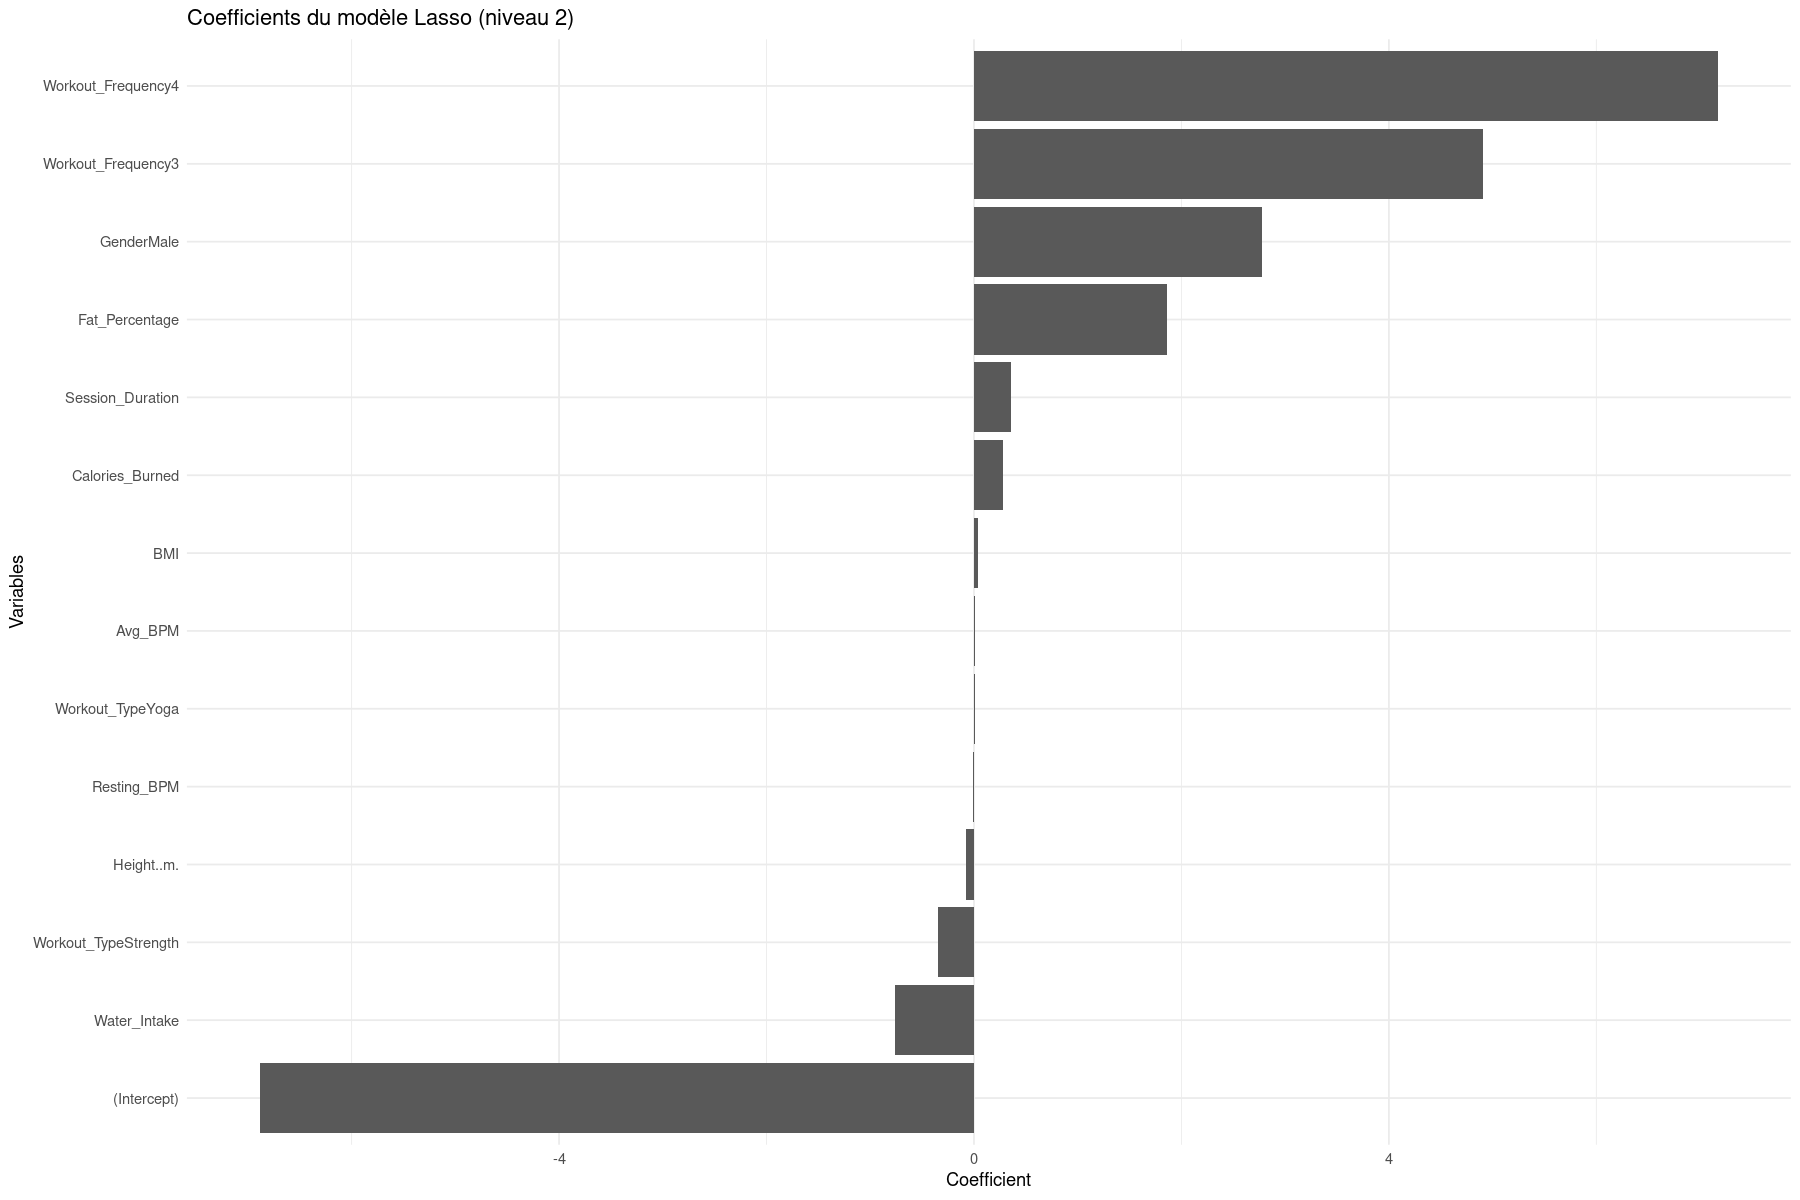

In [90]:
Xb2_train_mat <- model.matrix(Experience_Level_2 ~ . , data = datappr2)[, -1]  # enlever l’intercept
Y2_train_vec <- datappr2$Experience_Level_2
cv_lasso2 <- cv.glmnet(Xb2_train_mat, Y2_train_vec, family = "binomial", alpha = 1)
coef_lasso2 <- coef(cv_lasso2, s = "lambda.min")

as.matrix(coef_lasso2)

# Convertir en data frame
df_coef2 <- as.data.frame(as.matrix(coef_lasso2))
df_coef2$Variable <- rownames(df_coef2)
colnames(df_coef2)[1] <- "Coefficient"

# Supprimer les coefficients nuls
df_coef2 <- subset(df_coef2, Coefficient != 0)
ggplot(df_coef2, aes(x = reorder(Variable, Coefficient), y = Coefficient)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(title = "Coefficients du modèle Lasso (niveau 2)",
       x = "Variables",
       y = "Coefficient") +
  theme_minimal()

#### Niveau 3 d'Experience Level

In [91]:

install.packages("brglm")
library(brglm)
# Ajustement avec la méthode de biais réduits pour gérer la séparation
log.lm3_br <- brglm(Experience_Level_3 ~ ., data = datappr3, family = binomial)
summary(log.lm3_br)

log.lm3 <- glm(Experience_Level_3 ~ ., data = datappr3, family = binomial)
log.lm3 <- glm(Experience_Level_3 ~ ., data = datappr3, family = binomial)
log.lm.step3 <- step(log.lm3, direction = "backward")

Installation du package dans ‘/home/ebrunel/R/libs’
(car ‘lib’ n'est pas spécifié)

installation de la dépendance ‘profileModel’


Le chargement a nécessité le package : profileModel

'brglm' will gradually be superseded by the 'brglm2' R package (https://cran.r-project.org/package=brglm2), which provides utilities for mean and median bias reduction for all GLMs.
 Methods for the detection of separation and infinite estimates in binomial-response models are provided by the 'detectseparation' R package (https://cran.r-project.org/package=detectseparation).




Call:
brglm(formula = Experience_Level_3 ~ ., family = binomial, data = datappr3)


Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -1.757329   1.210917  -1.451  0.14671    
Age                  -0.011803   0.497239  -0.024  0.98106    
GenderMale           -4.692057   1.622482  -2.892  0.00383 ** 
Weight..kg.           1.857637   3.225882   0.576  0.56471    
Height..m.           -0.997785   1.792523  -0.557  0.57778    
Max_BPM              -0.061580   0.358851  -0.172  0.86375    
Avg_BPM              -0.069986   0.842206  -0.083  0.93377    
Resting_BPM           0.221033   0.363664   0.608  0.54332    
Calories_Burned      -0.005525   2.272710  -0.002  0.99806    
Workout_TypeHIIT     -0.371200   1.016774  -0.365  0.71505    
Workout_TypeStrength  0.145094   1.000535   0.145  0.88470    
Workout_TypeYoga      0.238531   0.926394   0.257  0.79681    
Fat_Percentage       -5.193429   1.008301  -5.151  2.6e-07 ***
BMI                

Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”


Start:  AIC=38
Experience_Level_3 ~ Age + Gender + Weight..kg. + Height..m. + 
    Max_BPM + Avg_BPM + Resting_BPM + Calories_Burned + Workout_Type + 
    Fat_Percentage + BMI + Workout_Frequency + Session_Duration + 
    Water_Intake



Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 

                    Df   Deviance AIC
- Workout_Type       3 1.9318e-08  32
- Workout_Frequency  3 2.0850e-08  32
- Avg_BPM            1 1.9160e-08  36
- Max_BPM            1 1.9205e-08  36
- Calories_Burned    1 1.9223e-08  36
- Height..m.         1 1.9247e-08  36
- Weight..kg.        1 1.9265e-08  36
- Water_Intake       1 1.9280e-08  36
- BMI                1 1.9299e-08  36
- Resting_BPM        1 1.9304e-08  36
- Age                1 1.9372e-08  36
- Session_Duration   1 1.9476e-08  36
- Gender             1 3.0468e-08  36
- Fat_Percentage     1 2.0481e-07  36
<none>                 1.9161e-08  38


Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”



Step:  AIC=32
Experience_Level_3 ~ Age + Gender + Weight..kg. + Height..m. + 
    Max_BPM + Avg_BPM + Resting_BPM + Calories_Burned + Fat_Percentage + 
    BMI + Workout_Frequency + Session_Duration + Water_Intake



Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 

                    Df   Deviance AIC
- Workout_Frequency  3 2.1333e-08  26
- Water_Intake       1 1.9315e-08  30
- Calories_Burned    1 1.9321e-08  30
- Avg_BPM            1 1.9324e-08  30
- Age                1 1.9373e-08  30
- Height..m.         1 1.9410e-08  30
- Weight..kg.        1 1.9439e-08  30
- BMI                1 1.9454e-08  30
- Resting_BPM        1 1.9469e-08  30
- Session_Duration   1 1.9559e-08  30
- Max_BPM            1 1.9750e-08  30
- Gender             1 3.0985e-08  30
- Fat_Percentage     1 2.9072e-07  30
<none>                 1.9318e-08  32


Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”



Step:  AIC=26
Experience_Level_3 ~ Age + Gender + Weight..kg. + Height..m. + 
    Max_BPM + Avg_BPM + Resting_BPM + Calories_Burned + Fat_Percentage + 
    BMI + Session_Duration + Water_Intake



Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 

                   Df   Deviance AIC
- BMI               1 2.1330e-08  24
- Height..m.        1 2.1330e-08  24
- Weight..kg.       1 2.1330e-08  24
- Max_BPM           1 2.1380e-08  24
- Resting_BPM       1 2.1400e-08  24
- Session_Duration  1 2.1420e-08  24
- Age               1 2.1470e-08  24
- Water_Intake      1 2.1540e-08  24
- Avg_BPM           1 2.1600e-08  24
- Calories_Burned   1 2.1660e-08  24
- Gender            1 4.0000e-08  24
- Fat_Percentage    1 6.4015e-07  24
<none>                2.1330e-08  26


Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”



Step:  AIC=24
Experience_Level_3 ~ Age + Gender + Weight..kg. + Height..m. + 
    Max_BPM + Avg_BPM + Resting_BPM + Calories_Burned + Fat_Percentage + 
    Session_Duration + Water_Intake



Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 

                   Df  Deviance AIC
- Height..m.        1 2.133e-08  22
- Weight..kg.       1 2.137e-08  22
- Max_BPM           1 2.137e-08  22
- Resting_BPM       1 2.138e-08  22
- Session_Duration  1 2.142e-08  22
- Age               1 2.147e-08  22
- Water_Intake      1 2.155e-08  22
- Avg_BPM           1 2.157e-08  22
- Calories_Burned   1 2.164e-08  22
- Gender            1 4.337e-08  22
- Fat_Percentage    1 8.023e-07  22
<none>                2.133e-08  24


Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”



Step:  AIC=22
Experience_Level_3 ~ Age + Gender + Weight..kg. + Max_BPM + Avg_BPM + 
    Resting_BPM + Calories_Burned + Fat_Percentage + Session_Duration + 
    Water_Intake



Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 

                   Df   Deviance AIC
- Max_BPM           1 2.1360e-08  20
- Weight..kg.       1 2.1370e-08  20
- Resting_BPM       1 2.1410e-08  20
- Session_Duration  1 2.1540e-08  20
- Age               1 2.1580e-08  20
- Water_Intake      1 2.1600e-08  20
- Avg_BPM           1 2.1790e-08  20
- Calories_Burned   1 2.1910e-08  20
- Gender            1 4.4000e-08  20
- Fat_Percentage    1 8.8057e-07  20
<none>                2.1330e-08  22


Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”



Step:  AIC=20
Experience_Level_3 ~ Age + Gender + Weight..kg. + Avg_BPM + Resting_BPM + 
    Calories_Burned + Fat_Percentage + Session_Duration + Water_Intake



Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 

                   Df   Deviance AIC
- Weight..kg.       1 2.1400e-08  18
- Resting_BPM       1 2.1540e-08  18
- Session_Duration  1 2.1580e-08  18
- Age               1 2.1620e-08  18
- Water_Intake      1 2.1700e-08  18
- Avg_BPM           1 2.1830e-08  18
- Calories_Burned   1 2.1930e-08  18
- Gender            1 4.4270e-08  18
- Fat_Percentage    1 9.4166e-07  18
<none>                2.1360e-08  20


Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”



Step:  AIC=18
Experience_Level_3 ~ Age + Gender + Avg_BPM + Resting_BPM + Calories_Burned + 
    Fat_Percentage + Session_Duration + Water_Intake



Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 

                   Df   Deviance AIC
- Resting_BPM       1 2.1560e-08  16
- Session_Duration  1 2.1620e-08  16
- Age               1 2.1660e-08  16
- Water_Intake      1 2.1740e-08  16
- Avg_BPM           1 2.1880e-08  16
- Calories_Burned   1 2.1960e-08  16
- Gender            1 5.2430e-08  16
- Fat_Percentage    1 9.1696e-07  16
<none>                2.1400e-08  18


Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”



Step:  AIC=16
Experience_Level_3 ~ Age + Gender + Avg_BPM + Calories_Burned + 
    Fat_Percentage + Session_Duration + Water_Intake



Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 

                   Df   Deviance AIC
- Session_Duration  1 2.1820e-08  14
- Age               1 2.1860e-08  14
- Water_Intake      1 2.1890e-08  14
- Avg_BPM           1 2.1980e-08  14
- Calories_Burned   1 2.2030e-08  14
- Gender            1 5.2740e-08  14
- Fat_Percentage    1 9.1506e-07  14
<none>                2.1560e-08  16


Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”



Step:  AIC=14
Experience_Level_3 ~ Age + Gender + Avg_BPM + Calories_Burned + 
    Fat_Percentage + Water_Intake



Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”


                  Df Deviance    AIC
- Age              1    0.000 12.000
- Water_Intake     1    0.000 12.000
- Avg_BPM          1    0.000 12.000
- Calories_Burned  1    0.000 12.000
- Gender           1    0.000 12.000
<none>                  0.000 14.000
- Fat_Percentage   1   26.234 38.234


Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”



Step:  AIC=12
Experience_Level_3 ~ Gender + Avg_BPM + Calories_Burned + Fat_Percentage + 
    Water_Intake



Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”


                  Df Deviance    AIC
- Water_Intake     1    0.000 10.000
- Avg_BPM          1    0.000 10.000
- Calories_Burned  1    0.000 10.000
- Gender           1    0.000 10.000
<none>                  0.000 12.000
- Fat_Percentage   1   64.433 74.433


Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”



Step:  AIC=10
Experience_Level_3 ~ Gender + Avg_BPM + Calories_Burned + Fat_Percentage



Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”


                  Df Deviance    AIC
- Avg_BPM          1     0.00   8.00
- Calories_Burned  1     0.00   8.00
- Gender           1     0.00   8.00
<none>                   0.00  10.00
- Fat_Percentage   1   137.41 145.41


Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”



Step:  AIC=8
Experience_Level_3 ~ Gender + Calories_Burned + Fat_Percentage



Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”


                  Df Deviance    AIC
- Calories_Burned  1     0.00   6.00
- Gender           1     0.00   6.00
<none>                   0.00   8.00
- Fat_Percentage   1   314.88 320.88


Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”



Step:  AIC=6
Experience_Level_3 ~ Gender + Fat_Percentage



Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”


                 Df Deviance    AIC
- Gender          1     0.00   4.00
<none>                  0.00   6.00
- Fat_Percentage  1   762.84 766.84


Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”



Step:  AIC=4
Experience_Level_3 ~ Fat_Percentage

                 Df Deviance    AIC
<none>                  0.00   4.00
- Fat_Percentage  1   762.85 764.85


In [92]:
log.lm.step3 <- step(log.lm3, direction = "backward")

Start:  AIC=38
Experience_Level_3 ~ Age + Gender + Weight..kg. + Height..m. + 
    Max_BPM + Avg_BPM + Resting_BPM + Calories_Burned + Workout_Type + 
    Fat_Percentage + BMI + Workout_Frequency + Session_Duration + 
    Water_Intake



Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 

                    Df   Deviance AIC
- Workout_Type       3 1.9318e-08  32
- Workout_Frequency  3 2.0850e-08  32
- Avg_BPM            1 1.9160e-08  36
- Max_BPM            1 1.9205e-08  36
- Calories_Burned    1 1.9223e-08  36
- Height..m.         1 1.9247e-08  36
- Weight..kg.        1 1.9265e-08  36
- Water_Intake       1 1.9280e-08  36
- BMI                1 1.9299e-08  36
- Resting_BPM        1 1.9304e-08  36
- Age                1 1.9372e-08  36
- Session_Duration   1 1.9476e-08  36
- Gender             1 3.0468e-08  36
- Fat_Percentage     1 2.0481e-07  36
<none>                 1.9161e-08  38


Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”



Step:  AIC=32
Experience_Level_3 ~ Age + Gender + Weight..kg. + Height..m. + 
    Max_BPM + Avg_BPM + Resting_BPM + Calories_Burned + Fat_Percentage + 
    BMI + Workout_Frequency + Session_Duration + Water_Intake



Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 

                    Df   Deviance AIC
- Workout_Frequency  3 2.1333e-08  26
- Water_Intake       1 1.9315e-08  30
- Calories_Burned    1 1.9321e-08  30
- Avg_BPM            1 1.9324e-08  30
- Age                1 1.9373e-08  30
- Height..m.         1 1.9410e-08  30
- Weight..kg.        1 1.9439e-08  30
- BMI                1 1.9454e-08  30
- Resting_BPM        1 1.9469e-08  30
- Session_Duration   1 1.9559e-08  30
- Max_BPM            1 1.9750e-08  30
- Gender             1 3.0985e-08  30
- Fat_Percentage     1 2.9072e-07  30
<none>                 1.9318e-08  32


Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”



Step:  AIC=26
Experience_Level_3 ~ Age + Gender + Weight..kg. + Height..m. + 
    Max_BPM + Avg_BPM + Resting_BPM + Calories_Burned + Fat_Percentage + 
    BMI + Session_Duration + Water_Intake



Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 

                   Df   Deviance AIC
- BMI               1 2.1330e-08  24
- Height..m.        1 2.1330e-08  24
- Weight..kg.       1 2.1330e-08  24
- Max_BPM           1 2.1380e-08  24
- Resting_BPM       1 2.1400e-08  24
- Session_Duration  1 2.1420e-08  24
- Age               1 2.1470e-08  24
- Water_Intake      1 2.1540e-08  24
- Avg_BPM           1 2.1600e-08  24
- Calories_Burned   1 2.1660e-08  24
- Gender            1 4.0000e-08  24
- Fat_Percentage    1 6.4015e-07  24
<none>                2.1330e-08  26


Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”



Step:  AIC=24
Experience_Level_3 ~ Age + Gender + Weight..kg. + Height..m. + 
    Max_BPM + Avg_BPM + Resting_BPM + Calories_Burned + Fat_Percentage + 
    Session_Duration + Water_Intake



Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 

                   Df  Deviance AIC
- Height..m.        1 2.133e-08  22
- Weight..kg.       1 2.137e-08  22
- Max_BPM           1 2.137e-08  22
- Resting_BPM       1 2.138e-08  22
- Session_Duration  1 2.142e-08  22
- Age               1 2.147e-08  22
- Water_Intake      1 2.155e-08  22
- Avg_BPM           1 2.157e-08  22
- Calories_Burned   1 2.164e-08  22
- Gender            1 4.337e-08  22
- Fat_Percentage    1 8.023e-07  22
<none>                2.133e-08  24


Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”



Step:  AIC=22
Experience_Level_3 ~ Age + Gender + Weight..kg. + Max_BPM + Avg_BPM + 
    Resting_BPM + Calories_Burned + Fat_Percentage + Session_Duration + 
    Water_Intake



Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 

                   Df   Deviance AIC
- Max_BPM           1 2.1360e-08  20
- Weight..kg.       1 2.1370e-08  20
- Resting_BPM       1 2.1410e-08  20
- Session_Duration  1 2.1540e-08  20
- Age               1 2.1580e-08  20
- Water_Intake      1 2.1600e-08  20
- Avg_BPM           1 2.1790e-08  20
- Calories_Burned   1 2.1910e-08  20
- Gender            1 4.4000e-08  20
- Fat_Percentage    1 8.8057e-07  20
<none>                2.1330e-08  22


Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”



Step:  AIC=20
Experience_Level_3 ~ Age + Gender + Weight..kg. + Avg_BPM + Resting_BPM + 
    Calories_Burned + Fat_Percentage + Session_Duration + Water_Intake



Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 

                   Df   Deviance AIC
- Weight..kg.       1 2.1400e-08  18
- Resting_BPM       1 2.1540e-08  18
- Session_Duration  1 2.1580e-08  18
- Age               1 2.1620e-08  18
- Water_Intake      1 2.1700e-08  18
- Avg_BPM           1 2.1830e-08  18
- Calories_Burned   1 2.1930e-08  18
- Gender            1 4.4270e-08  18
- Fat_Percentage    1 9.4166e-07  18
<none>                2.1360e-08  20


Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”



Step:  AIC=18
Experience_Level_3 ~ Age + Gender + Avg_BPM + Resting_BPM + Calories_Burned + 
    Fat_Percentage + Session_Duration + Water_Intake



Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 

                   Df   Deviance AIC
- Resting_BPM       1 2.1560e-08  16
- Session_Duration  1 2.1620e-08  16
- Age               1 2.1660e-08  16
- Water_Intake      1 2.1740e-08  16
- Avg_BPM           1 2.1880e-08  16
- Calories_Burned   1 2.1960e-08  16
- Gender            1 5.2430e-08  16
- Fat_Percentage    1 9.1696e-07  16
<none>                2.1400e-08  18


Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”



Step:  AIC=16
Experience_Level_3 ~ Age + Gender + Avg_BPM + Calories_Burned + 
    Fat_Percentage + Session_Duration + Water_Intake



Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 

                   Df   Deviance AIC
- Session_Duration  1 2.1820e-08  14
- Age               1 2.1860e-08  14
- Water_Intake      1 2.1890e-08  14
- Avg_BPM           1 2.1980e-08  14
- Calories_Burned   1 2.2030e-08  14
- Gender            1 5.2740e-08  14
- Fat_Percentage    1 9.1506e-07  14
<none>                2.1560e-08  16


Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”



Step:  AIC=14
Experience_Level_3 ~ Age + Gender + Avg_BPM + Calories_Burned + 
    Fat_Percentage + Water_Intake



Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”


                  Df Deviance    AIC
- Age              1    0.000 12.000
- Water_Intake     1    0.000 12.000
- Avg_BPM          1    0.000 12.000
- Calories_Burned  1    0.000 12.000
- Gender           1    0.000 12.000
<none>                  0.000 14.000
- Fat_Percentage   1   26.234 38.234


Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”



Step:  AIC=12
Experience_Level_3 ~ Gender + Avg_BPM + Calories_Burned + Fat_Percentage + 
    Water_Intake



Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”


                  Df Deviance    AIC
- Water_Intake     1    0.000 10.000
- Avg_BPM          1    0.000 10.000
- Calories_Burned  1    0.000 10.000
- Gender           1    0.000 10.000
<none>                  0.000 12.000
- Fat_Percentage   1   64.433 74.433


Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”



Step:  AIC=10
Experience_Level_3 ~ Gender + Avg_BPM + Calories_Burned + Fat_Percentage



Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”


                  Df Deviance    AIC
- Avg_BPM          1     0.00   8.00
- Calories_Burned  1     0.00   8.00
- Gender           1     0.00   8.00
<none>                   0.00  10.00
- Fat_Percentage   1   137.41 145.41


Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”



Step:  AIC=8
Experience_Level_3 ~ Gender + Calories_Burned + Fat_Percentage



Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”


                  Df Deviance    AIC
- Calories_Burned  1     0.00   6.00
- Gender           1     0.00   6.00
<none>                   0.00   8.00
- Fat_Percentage   1   314.88 320.88


Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”



Step:  AIC=6
Experience_Level_3 ~ Gender + Fat_Percentage



Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”


                 Df Deviance    AIC
- Gender          1     0.00   4.00
<none>                  0.00   6.00
- Fat_Percentage  1   762.84 766.84


Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”



Step:  AIC=4
Experience_Level_3 ~ Fat_Percentage

                 Df Deviance    AIC
<none>                  0.00   4.00
- Fat_Percentage  1   762.85 764.85


In [93]:
preds3 <- log.lm3$fitted.values
conf_matrixr3 <- table(Prediction = preds3 > 0.5,
                     Réalité = datappr3$Experience_Level_3)
cat("Matrice de confusion - Échantillon train (seuil 0.5)\n")
accuracy_train <- sum(diag(conf_matrixr3)) / sum(conf_matrixr3)
print(conf_matrixr3)
cat(sprintf("Accuracy train = %.2f%%\n", accuracy_train * 100))


preds_test3 <- predict(log.lm3, newdata = datestr3, type = "response")

conf_matrix3 <- table(Prediction = preds_test3 > 0.5,
                     Réalité = datestr3$Experience_Level_3)
accuracy_test <- sum(diag(conf_matrix3)) / sum(conf_matrix3)
cat("Matrice de confusion - Échantillon test (seuil 0.5)\n")
print(conf_matrix3)
cat(sprintf("Accuracy test= %.2f%%\n", accuracy_test * 100))

Matrice de confusion - Échantillon train (seuil 0.5)
          Réalité
Prediction   0   1
     FALSE 628   0
     TRUE    0 150
Accuracy train = 100.00%
Matrice de confusion - Échantillon test (seuil 0.5)
          Réalité
Prediction   0   1
     FALSE 154  41
Accuracy test= 78.97%


s1        
(Intercept)          -6.0695314
Age                   0.0000000
GenderMale           -5.2824409
Weight..kg.           0.0000000
Height..m.            0.0000000
Max_BPM               0.0000000
Avg_BPM               0.0000000
Resting_BPM           0.0000000
Calories_Burned       0.0000000
Workout_TypeHIIT      0.0000000
Workout_TypeStrength  0.0000000
Workout_TypeYoga      0.0000000
Fat_Percentage       -7.5833404
BMI                   0.0000000
Workout_Frequency3   -0.9803876
Workout_Frequency4    0.0000000
Workout_Frequency5    0.8260775
Session_Duration      3.1049333
Water_Intake          0.0000000

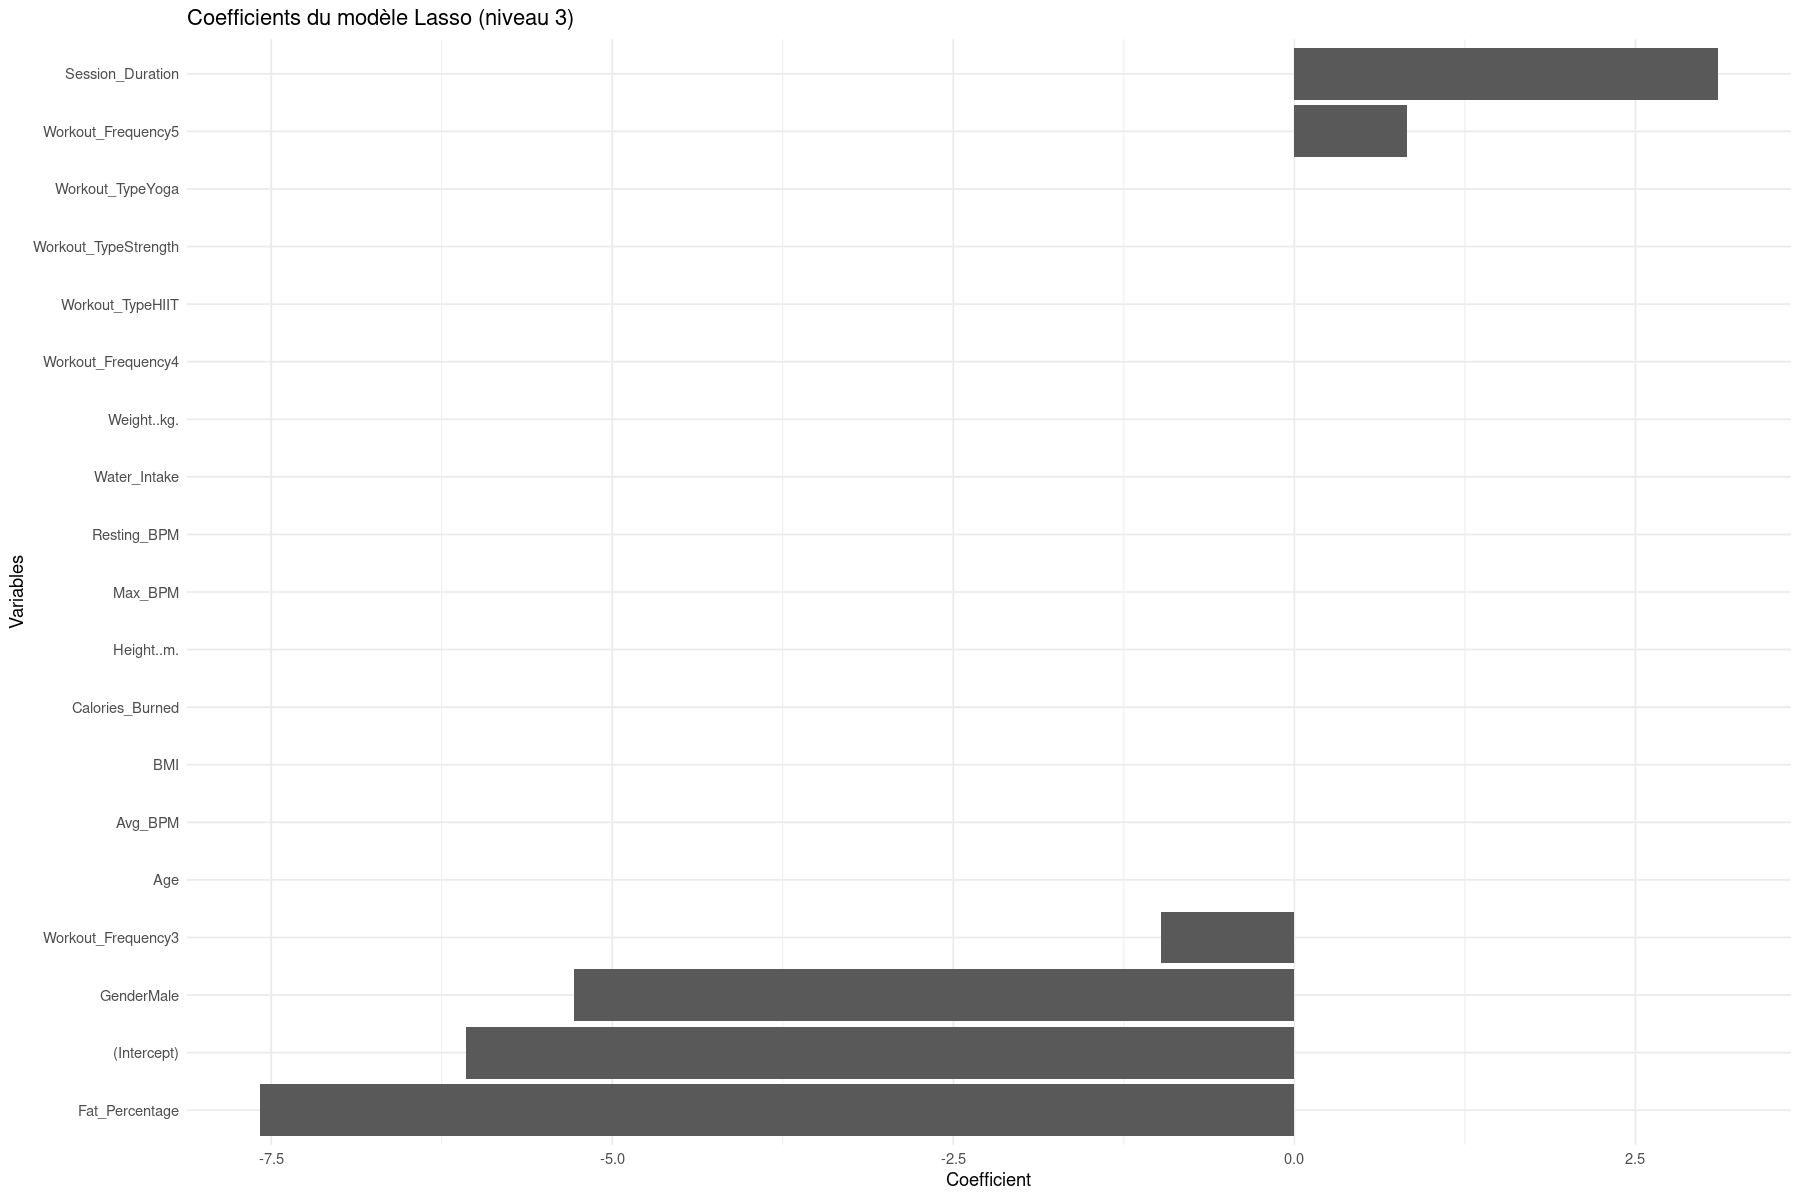

In [94]:
Xb3_train_mat <- model.matrix(Experience_Level_3 ~ . , data = datappr3)[, -1]  # enlever l’intercept
Y3_train_vec <- datappr3$Experience_Level_3
cv_lasso3 <- cv.glmnet(Xb3_train_mat, Y3_train_vec, family = "binomial", alpha = 1)
coef_lasso3 <- coef(cv_lasso3, s = "lambda.min")

as.matrix(coef_lasso3)

# Convertir en data frame
df_coef3 <- as.data.frame(as.matrix(coef_lasso3))
df_coef3$Variable <- rownames(df_coef3)
colnames(df_coef3)[1] <- "Coefficient"

# Supprimer les coefficients nuls
#df_coef3 <- subset(df_coef3, Coefficient != 0)
ggplot(df_coef3, aes(x = reorder(Variable, Coefficient), y = Coefficient)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(title = "Coefficients du modèle Lasso (niveau 3)",
       x = "Variables",
       y = "Coefficient") +
  theme_minimal()

#### Comparaison des trois niveaux d'expérience

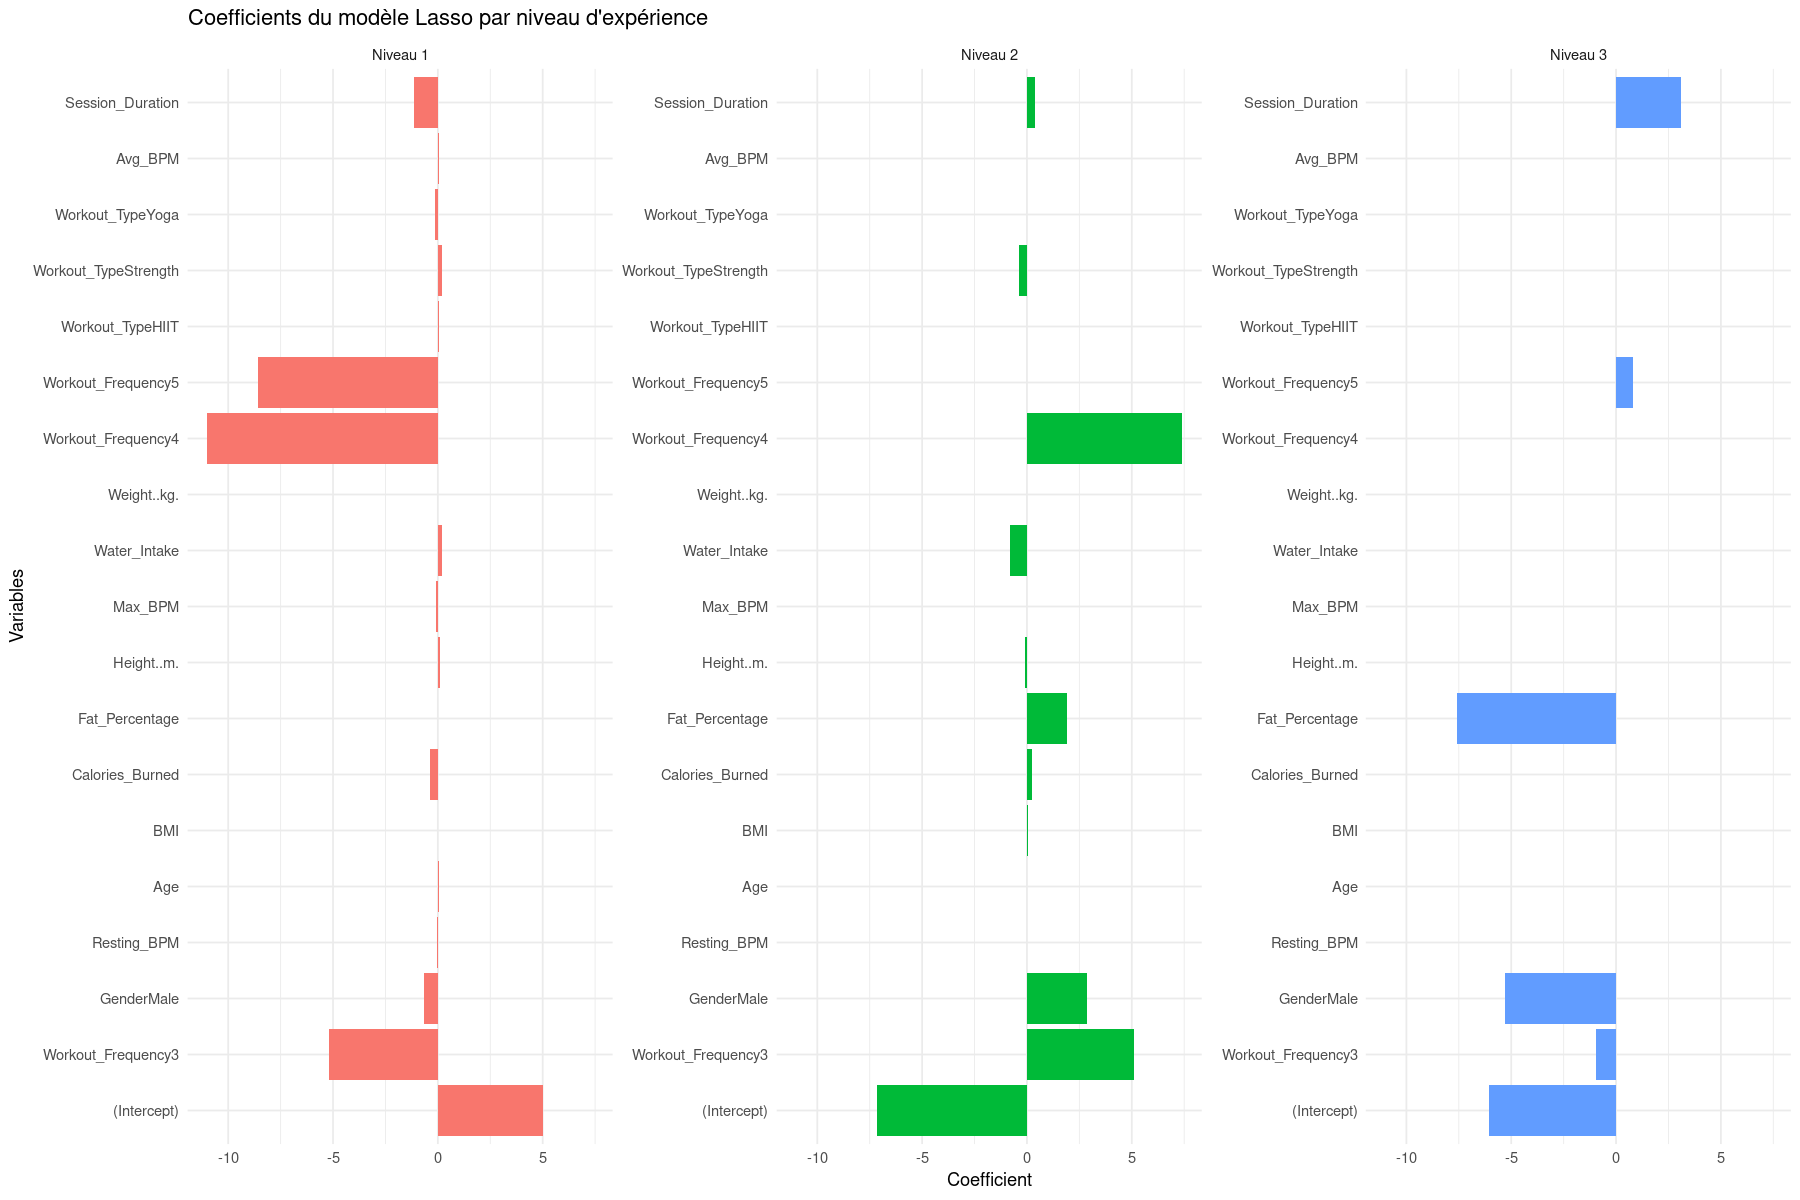

In [95]:
extract_coef_df <- function(data, response_var, level_label) {
  X_mat <- model.matrix(as.formula(paste(response_var, "~ .")), data = data)[, -1]
  Y_vec <- data[[response_var]]
  cv_lasso <- cv.glmnet(X_mat, Y_vec, family = "binomial", alpha = 1)
  coef_lasso <- coef(cv_lasso, s = "lambda.min")
  
  df <- as.data.frame(as.matrix(coef_lasso))
  df$Variable <- rownames(df)
  colnames(df)[1] <- "Coefficient"
  df$Level <- level_label
  return(df)
}


df_coef1 <- extract_coef_df(datappr1, "Experience_Level_1", "Niveau 1")
df_coef2 <- extract_coef_df(datappr2, "Experience_Level_2", "Niveau 2")
df_coef3 <- extract_coef_df(datappr3, "Experience_Level_3", "Niveau 3")

# Combiner en un seul data frame
df_all <- rbind(df_coef1, df_coef2, df_coef3)

# Pour éviter que la variable 'Variable' soit réordonnée différemment dans chaque facette, on fixe un ordre global :
library(dplyr)
var_order <- df_all %>%
  group_by(Variable) %>%
  summarize(med_coef = median(Coefficient)) %>%
  arrange(med_coef) %>%
  pull(Variable)

df_all$Variable <- factor(df_all$Variable, levels = var_order)

# Plot avec facettes côte à côte
ggplot(df_all, aes(x = Variable, y = Coefficient, fill = Level)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  facet_wrap(~ Level, scales = "free_y") +  # un graphique par niveau, échelles y indépendantes
  labs(title = "Coefficients du modèle Lasso par niveau d'expérience",
       x = "Variables",
       y = "Coefficient") +
  theme_minimal() +
  theme(legend.position = "none")


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



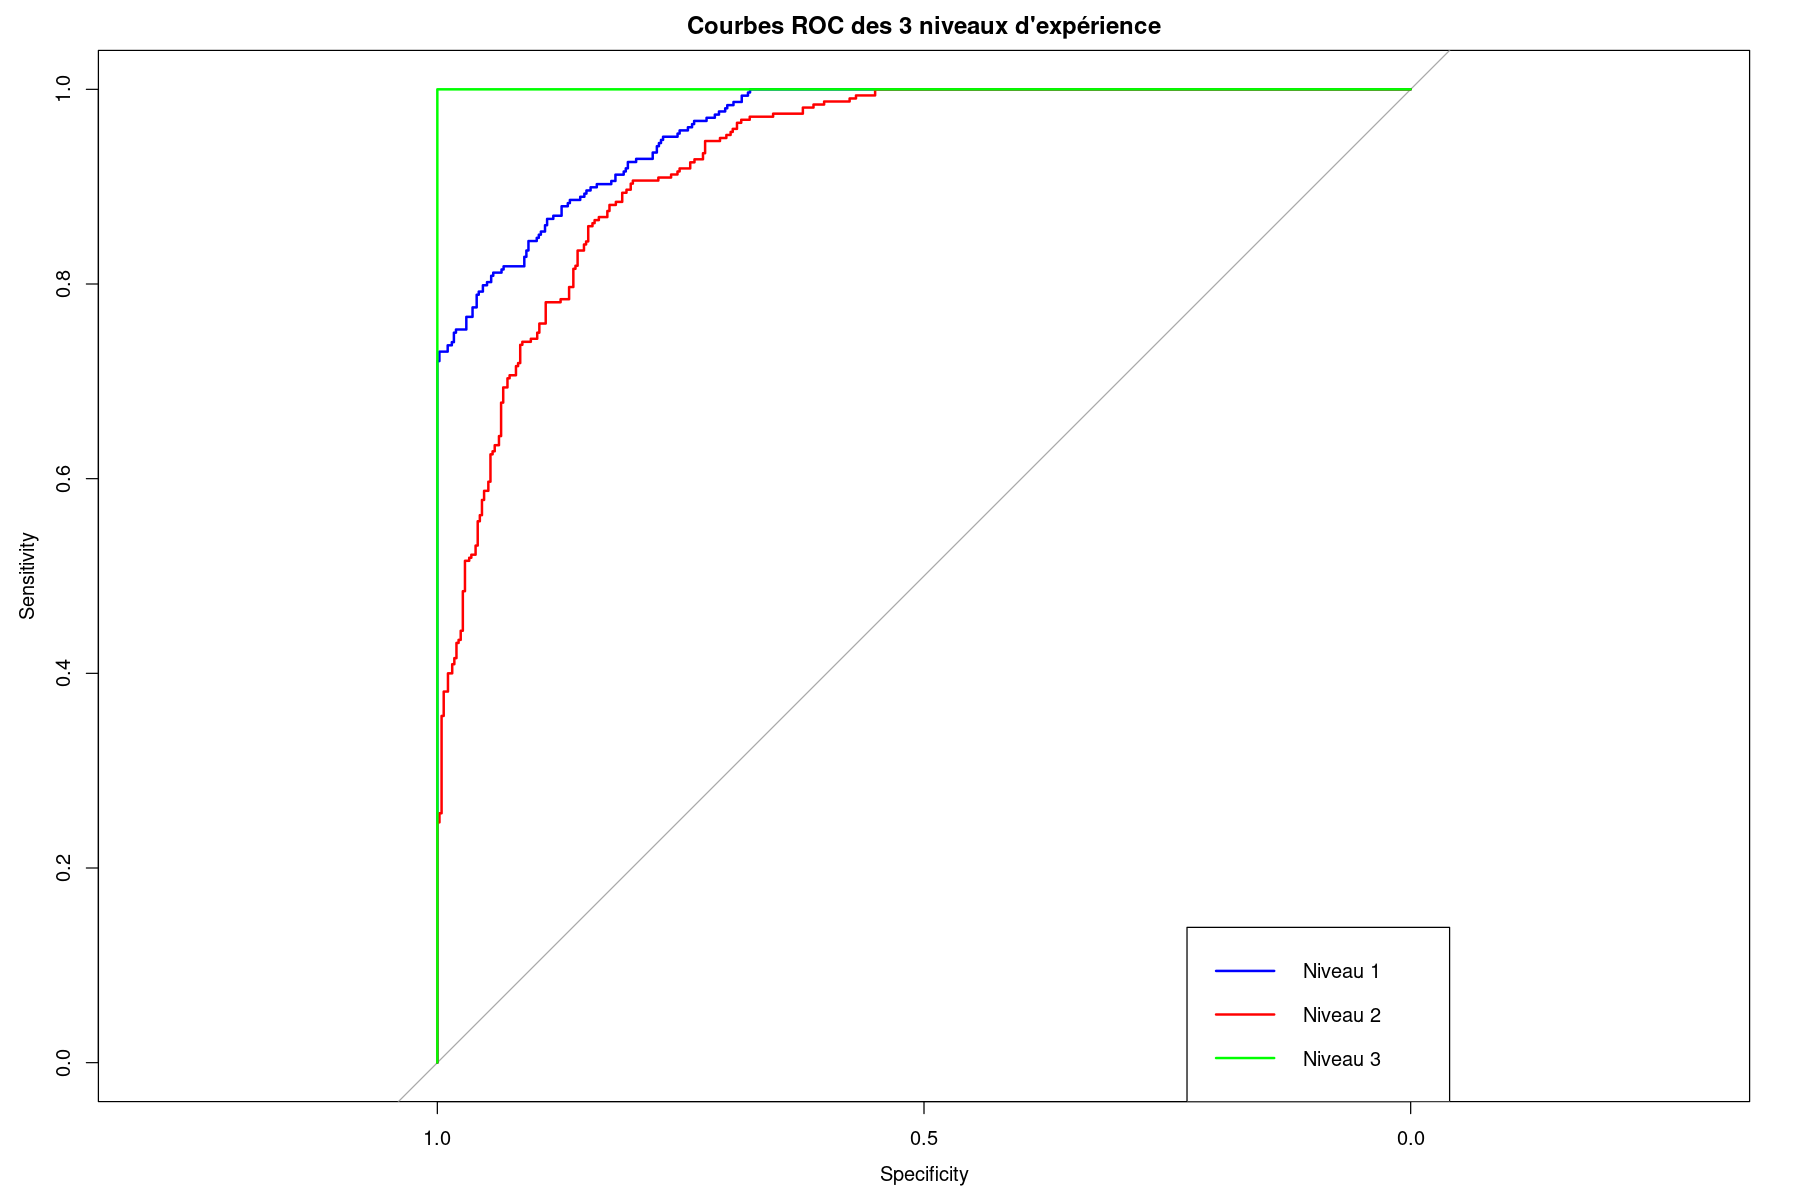

In [96]:
pred1 <- predict(log.lm1, type = "response")
pred2 <- predict(log.lm2, type = "response")
pred3 <- predict(log.lm3, type = "response")

# Les vraies classes
true1 <- datappr1$Experience_Level_1
true2 <- datappr2$Experience_Level_2
true3 <- datappr3$Experience_Level_3

# Calcul des objets ROC
roc1 <- roc(true1, pred1)
roc2 <- roc(true2, pred2)
roc3 <- roc(true3, pred3)

# Tracer les 3 courbes ROC sur un même graphique
plot(roc1, col = "blue", lwd = 2, main = "Courbes ROC des 3 niveaux d'expérience")
plot(roc2, col = "red", lwd = 2, add = TRUE)
plot(roc3, col = "green", lwd = 2, add = TRUE)

legend("bottomright",
       legend = c("Niveau 1", "Niveau 2", "Niveau 3"),
       col = c("blue", "red", "green"),
       lwd = 2)

### LSVM

## SVR/SVM

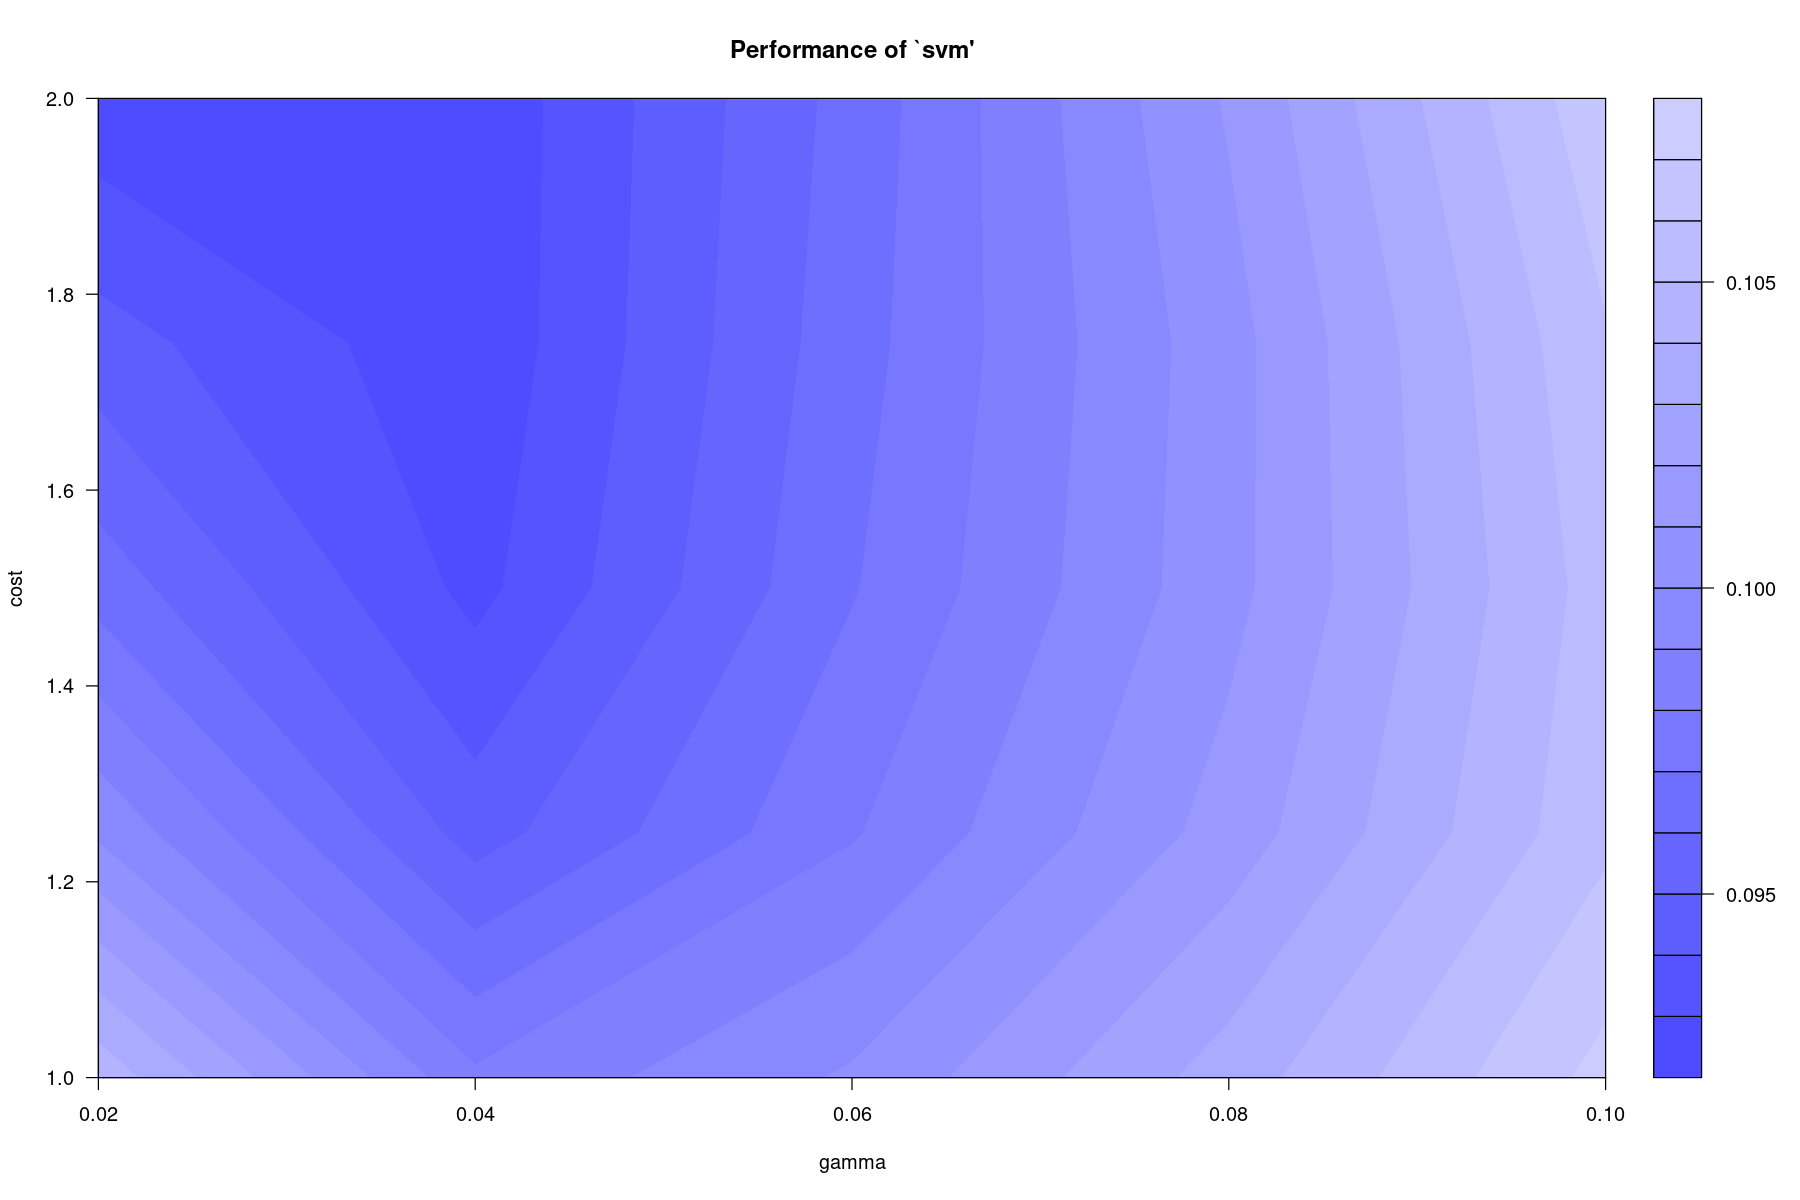

In [121]:
svm.dis.tune1 = tune.svm(Experience_Level_1 ~ ., data = datappr1, cost = c(1,1.25,1.5,1.75,2), 
    gamma = seq(0.02, 0.1, by = 0.02))
plot(svm.dis.tune1)

In [ ]:
# apprentissage
svm.dis.tune$best.parameters
svm.dis1=svm(Experience_Level_1~.,data=datappq,cost = svm.reg.tune$best.parameters$cost, 
    gamma = svm.reg.tune$best.parameters$gamma)

## Arbre optimal CART

## Forêt aléatoire

## Boosting

## Réseaux de neurones